In [3]:
import os 
from skimage.io import imread, imsave
from PIL import Image
import numpy as np
from skimage.filters import gaussian
from plotnine import *
import pandas as pd

In [23]:
# Which folders contain images per FOV?
base_dir = "/Users/teresaglauner/ark-analysis/data/COL102A_rosetta_1_cellpose_withASCT2_GLUT1_membrane/image_data"

fovs = [x+"/rescaled" for x in [dirs for root, dirs, files in os.walk(base_dir)][0] if x[0] != "."]
# You can also define paths explicitely
# fovs = ['./2023-03-09-ST0026_set1_D1_Tons', './2023-03-09-ST0026_set2_G8_LuCa']

In [24]:
fovs

['D4h/rescaled',
 'B1n/rescaled',
 'B2a/rescaled',
 'D8c/rescaled',
 'B1i/rescaled',
 'B7p/rescaled',
 'D8d/rescaled',
 'B2f/rescaled',
 'D8m/rescaled',
 'D7i/rescaled',
 'B2o/rescaled',
 'B4q/rescaled',
 'B2h/rescaled',
 'D4a/rescaled',
 'B1g/rescaled',
 'D1e/rescaled',
 'B4c/rescaled',
 'B8h/rescaled',
 'B4d/rescaled',
 'B7k/rescaled',
 'B8f/rescaled',
 'D2d/rescaled',
 'B7b/rescaled',
 'B4m/rescaled',
 'D1k/rescaled',
 'B7e/rescaled',
 'D2c/rescaled',
 'B8a/rescaled',
 'D1l/rescaled',
 'D8k/rescaled',
 'B4p/rescaled',
 'B2i/rescaled',
 'B1f/rescaled',
 'B2n/rescaled',
 'D8l/rescaled',
 'B1a/rescaled',
 'D4g/rescaled',
 'B1h/rescaled',
 'B7q/rescaled',
 'D7a/rescaled',
 'B2g/rescaled',
 'D8e/rescaled',
 'B8r/rescaled',
 'D4i/rescaled',
 'B1o/rescaled',
 'D8b/rescaled',
 'D7f/rescaled',
 'B7d/rescaled',
 'D2b/rescaled',
 'D1m/rescaled',
 'B2r/rescaled',
 'B4k/rescaled',
 'D2e/rescaled',
 'B7c/rescaled',
 'B8g/rescaled',
 'B4l/rescaled',
 'B4e/rescaled',
 'D1c/rescaled',
 'D2l/rescaled

In [25]:
# Which images to open for QC?
# Default: all images in first FOV
chans = {x for x in os.listdir(base_dir+"/"+fovs[0]) 
         if x[0] != '.' and x[-4:] == "tiff"}
# Remove some images if needed
chans_to_remove = ['Fe.tiff', 
                   'chan_39.tiff', 'chan_48.tiff',
                   'chan_69.tiff', 'chan_71.tiff']
[chans.remove(c) for c in chans_to_remove]
print(f"Processing {len(chans)} channels.")

Processing 45 channels.


In [26]:
chans

{'ARG1.tiff',
 'ASCT2.tiff',
 'ATP5A.tiff',
 'Au.tiff',
 'CA9.tiff',
 'CD14.tiff',
 'CD163.tiff',
 'CD20.tiff',
 'CD31.tiff',
 'CD3e.tiff',
 'CD4.tiff',
 'CD45.tiff',
 'CD68.tiff',
 'CD7.tiff',
 'CD8.tiff',
 'CD98.tiff',
 'CPT1A.tiff',
 'CS.tiff',
 'CytC.tiff',
 'DCN.tiff',
 'FoxP3.tiff',
 'FoxP3_nuc_include.tiff',
 'GLS.tiff',
 'GLUT1.tiff',
 'GS.tiff',
 'HLADRa.tiff',
 'Ki67.tiff',
 'Ki67_nuc_include.tiff',
 'LDH.tiff',
 'MCT1.tiff',
 'MPO.tiff',
 'MSH2.tiff',
 'MSH2_nuc_include.tiff',
 'MSH6.tiff',
 'MSH6_nuc_include.tiff',
 'Noodle.tiff',
 'PD1.tiff',
 'PDL1.tiff',
 'PKM2.tiff',
 'PanCK.tiff',
 'SMA.tiff',
 'STING1.tiff',
 'Vimentin.tiff',
 'membrane.tiff',
 'nuclei.tiff'}

In [27]:
# Gaussian sigma (higher = more blurred)
sigma = 50
# Display blurred images?
disp_blurred = False
# Save output?
save_results = False

In [28]:
# Make sure output folder exists
outdir = "./intensity_distribution"
if save_results and not os.path.exists(outdir):
    os.makedirs(outdir)

In [29]:
os.listdir()

['Ahmed.ipynb',
 'Stella.ipynb',
 'import_mibi_dfs_into_anndata.ipynb',
 'Pyflowsome_clustering_TG.ipynb',
 '4a_compensate_image_data.ipynb',
 '.DS_Store',
 'cell_table_export_CellPose_TG.ipynb',
 'Untitled-1.ipynb',
 'cell_segmentation_Cellpose.ipynb',
 'IntensityPerCell.ipynb',
 'MIBI_preprocess_MC.ipynb',
 'DiagonalIntensityDistribution.ipynb',
 'cell_table_export_CellPose.ipynb',
 'cell_segmentation_TG.ipynb',
 'teresa.ipynb',
 'MIBI_scyan_analysis_TG.ipynb',
 'turn_into_anndata.ipynb',
 'ST0036_analysis_TG.ipynb',
 'HandE-main',
 'MIBI_preprocessing_analysis_TG Kopie.ipynb',
 'MIBI_preprocessing_analysis_TG.ipynb',
 '23_04_06_analysis_script_ST.ipynb',
 '.ipynb_checkpoints',
 'Ohne Titel.rtf',
 'Scyan.ipynb']

membrane.tiff


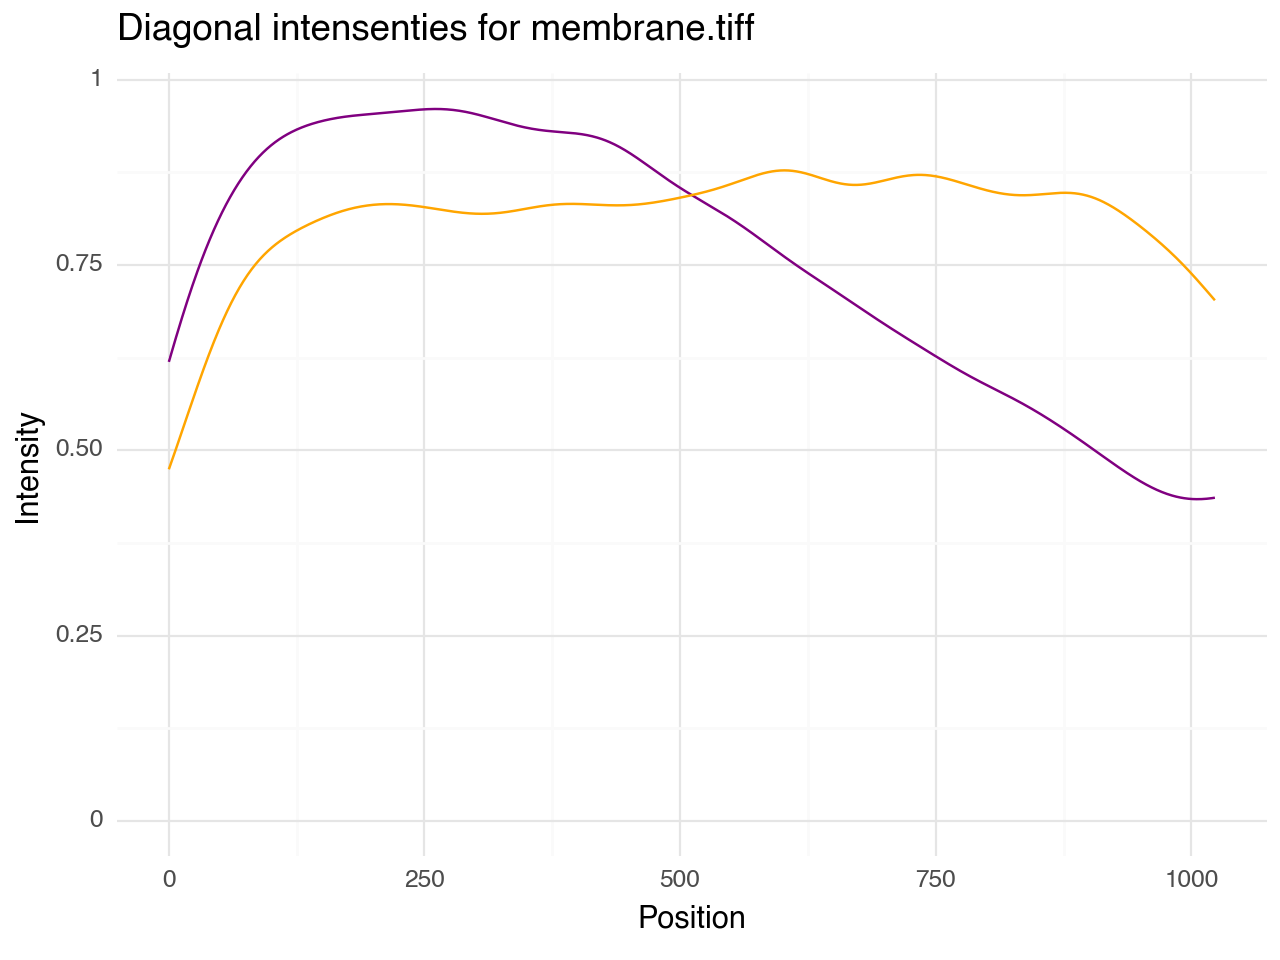


HLADRa.tiff


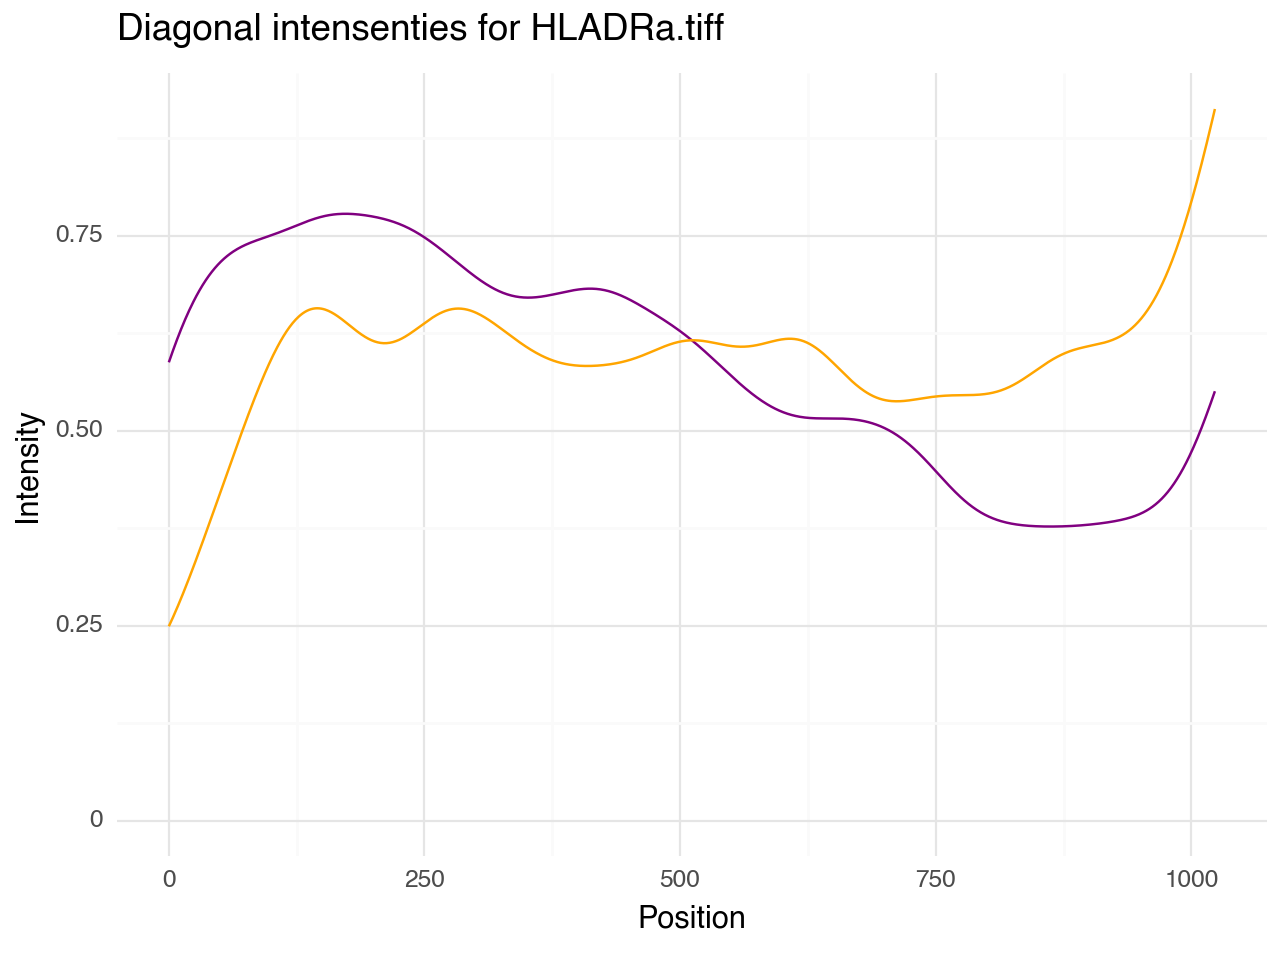


CD31.tiff


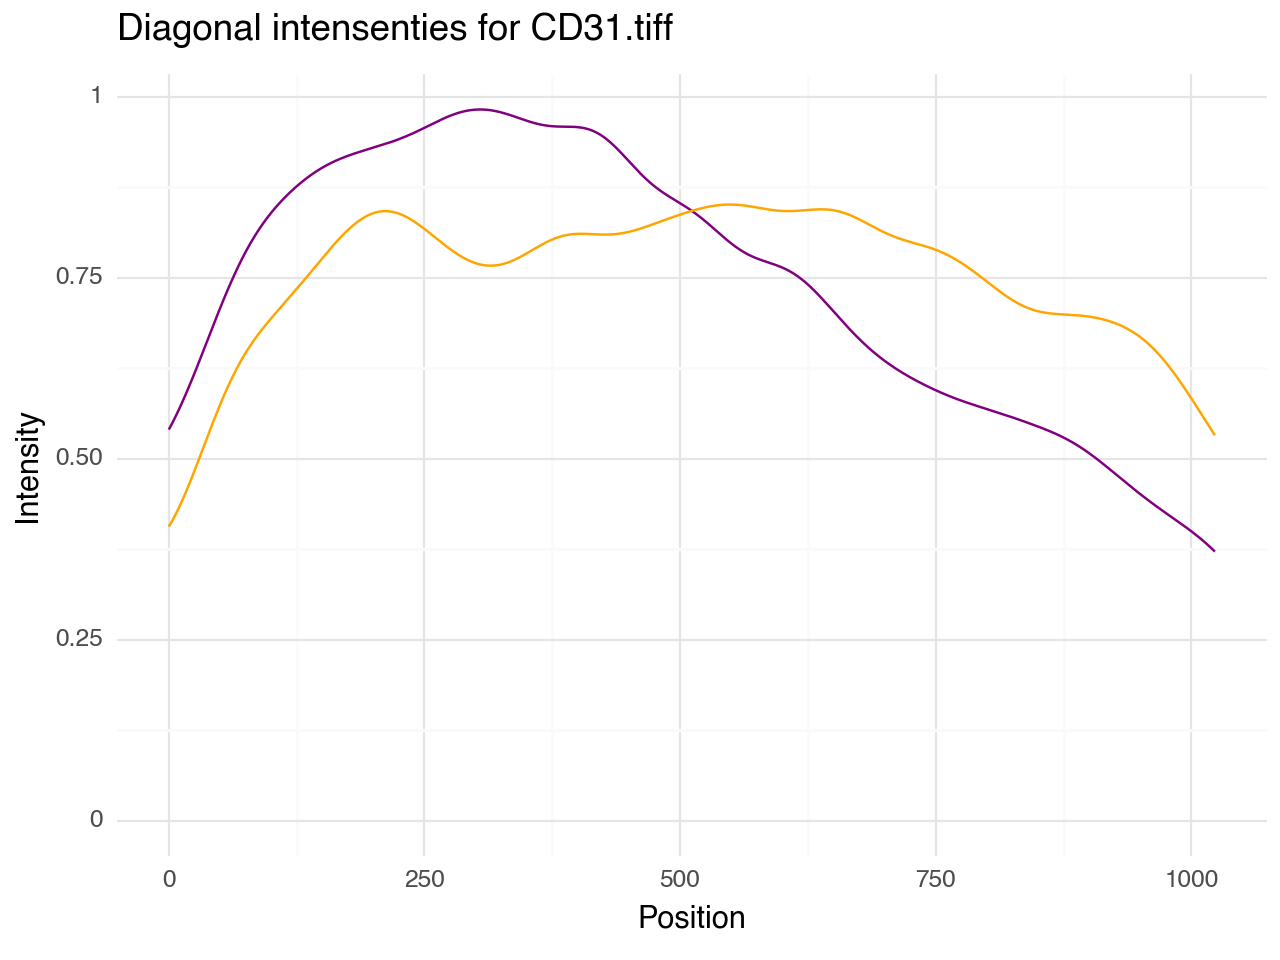


CD45.tiff


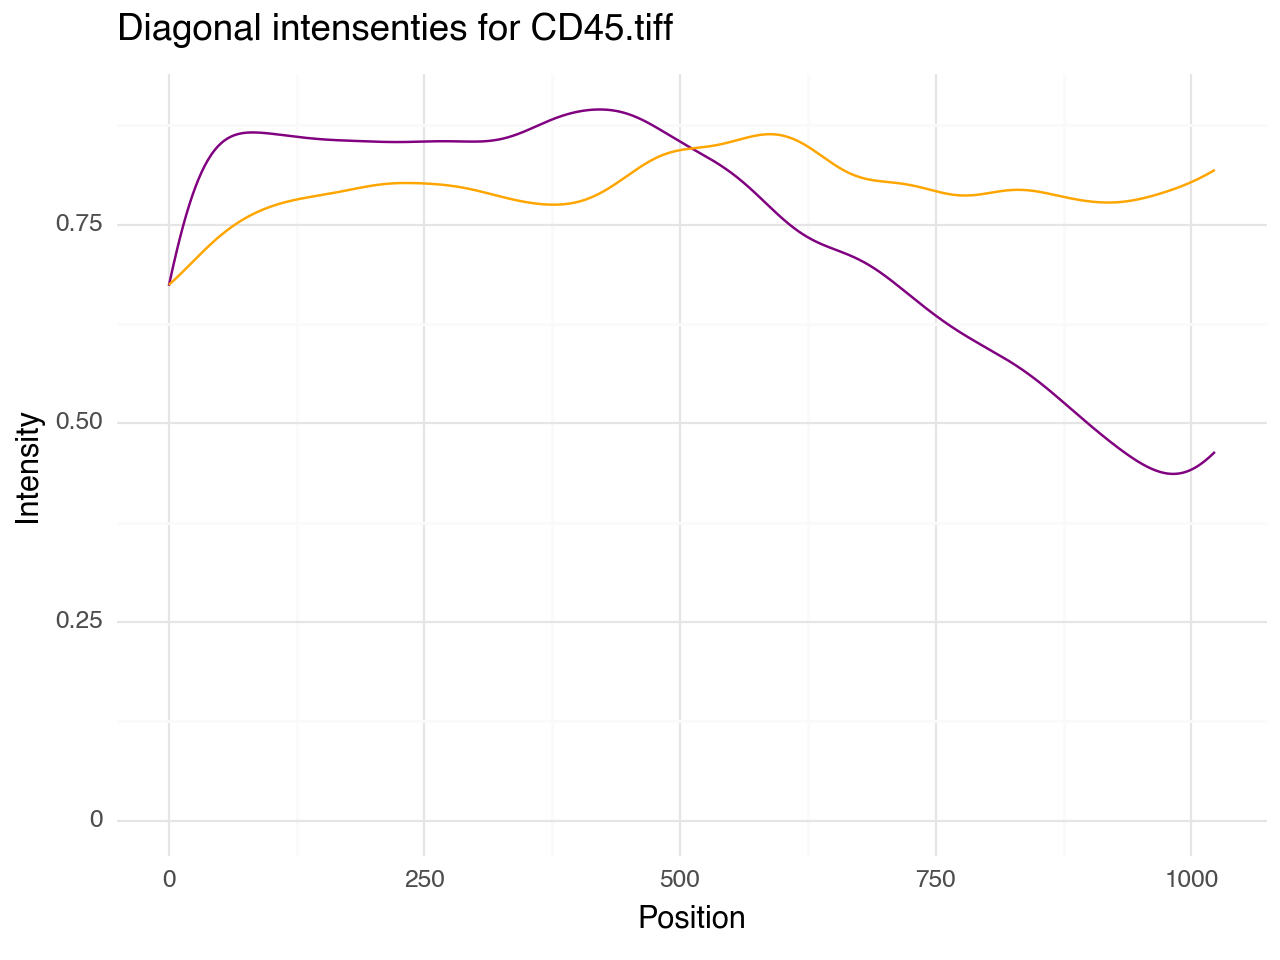


Ki67_nuc_include.tiff


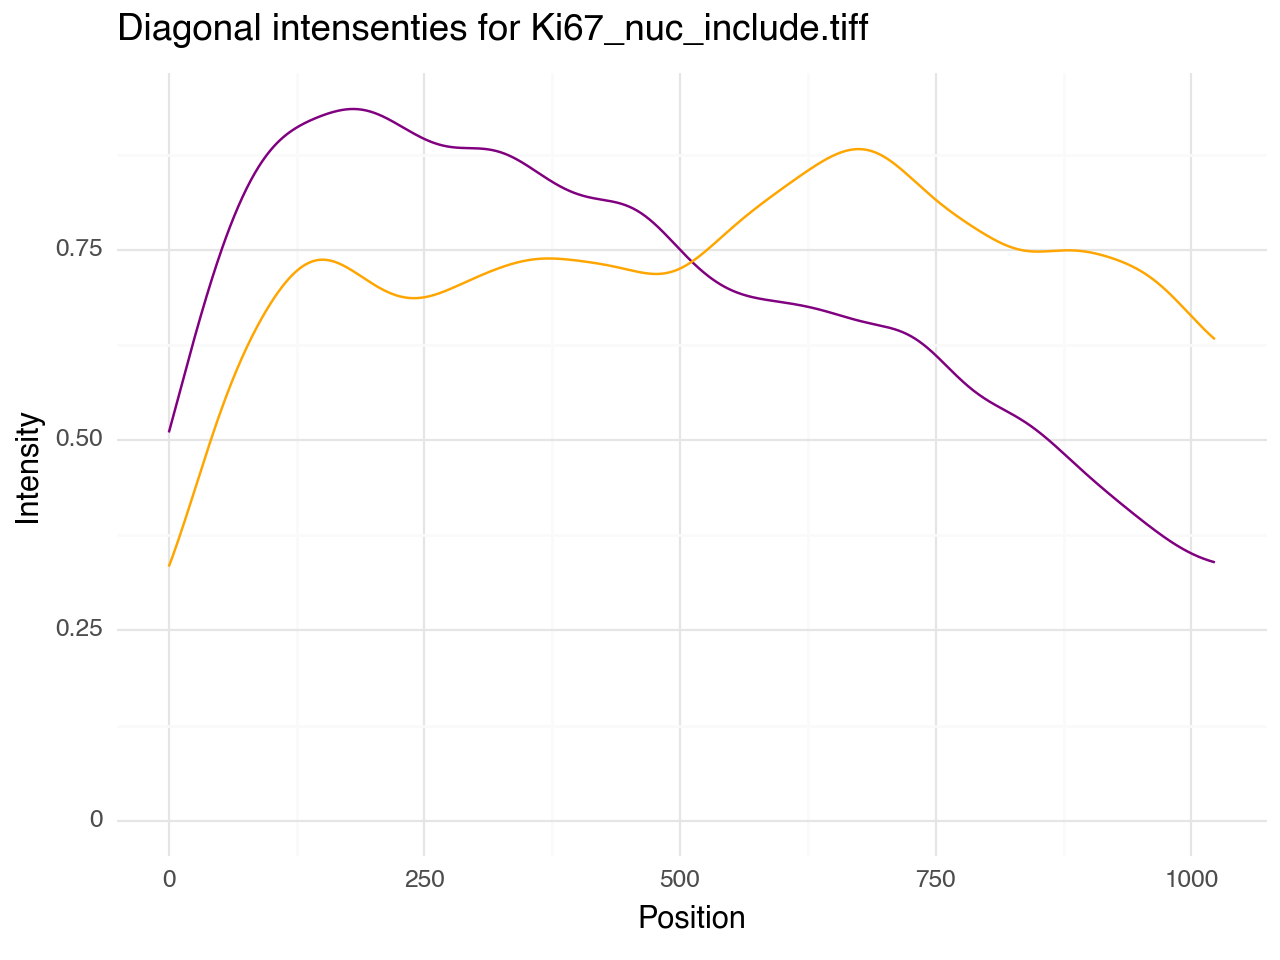


CD3e.tiff


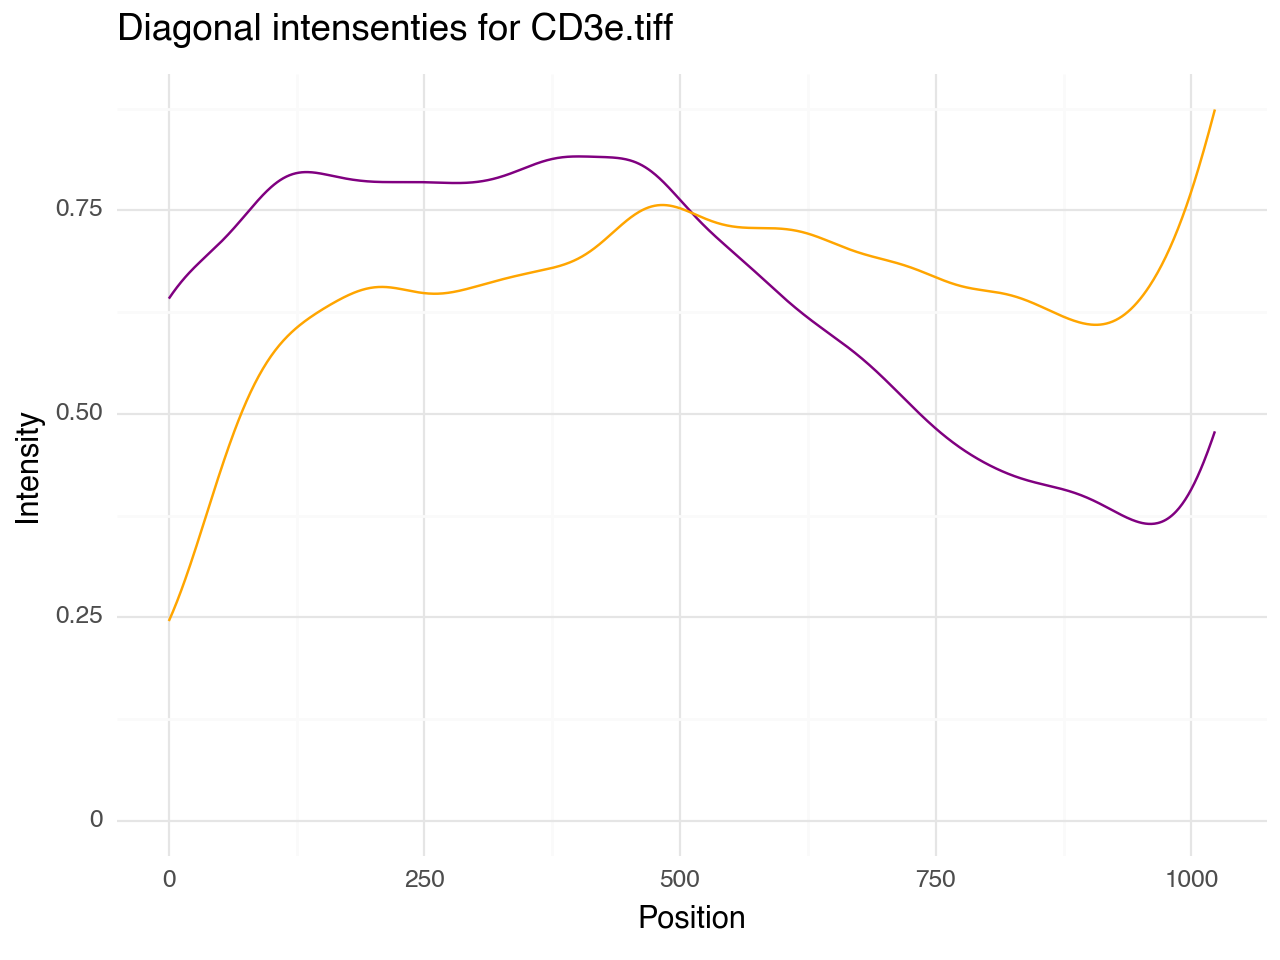


GLUT1.tiff


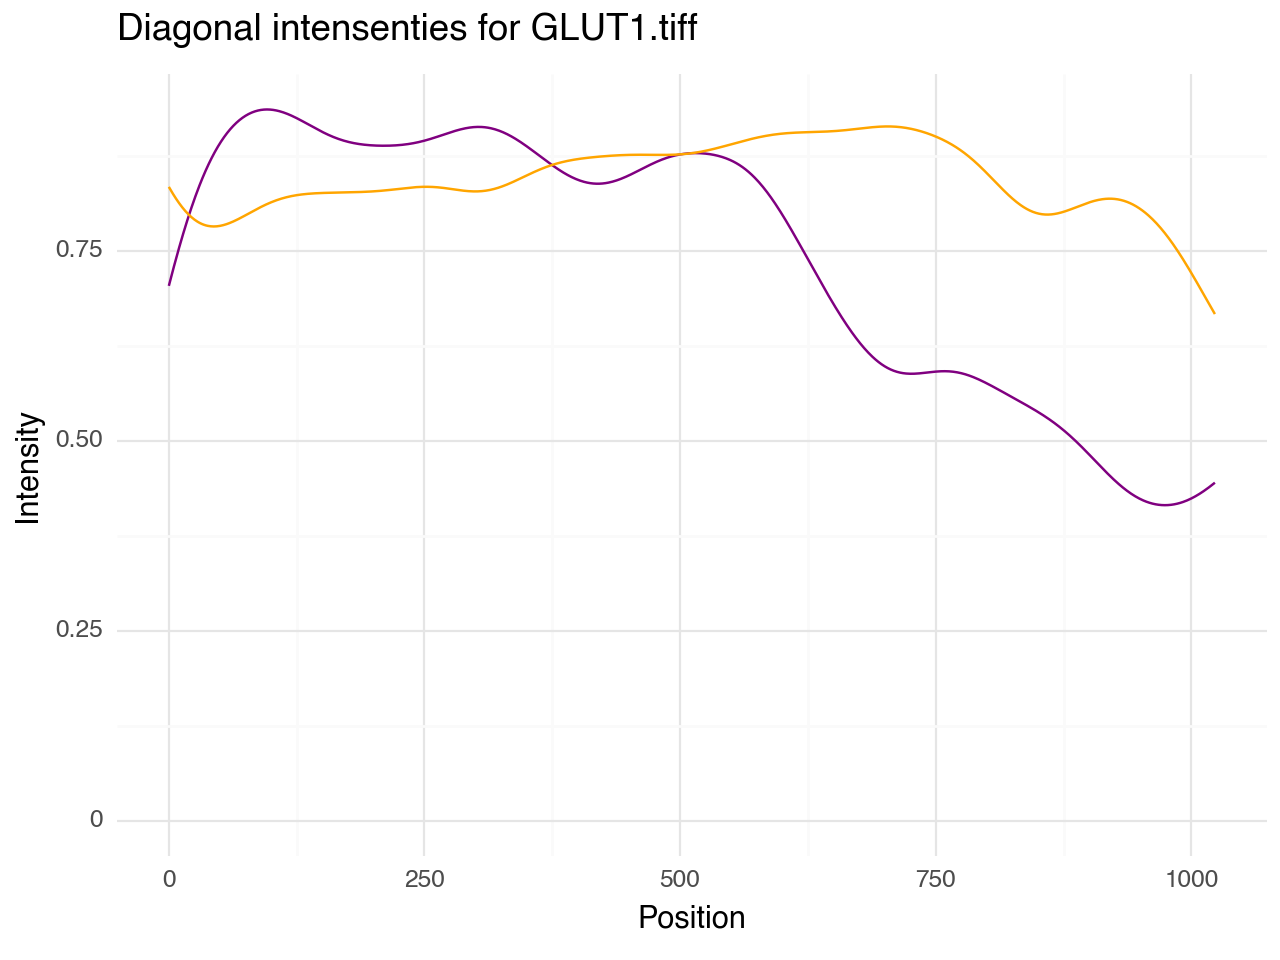


MCT1.tiff


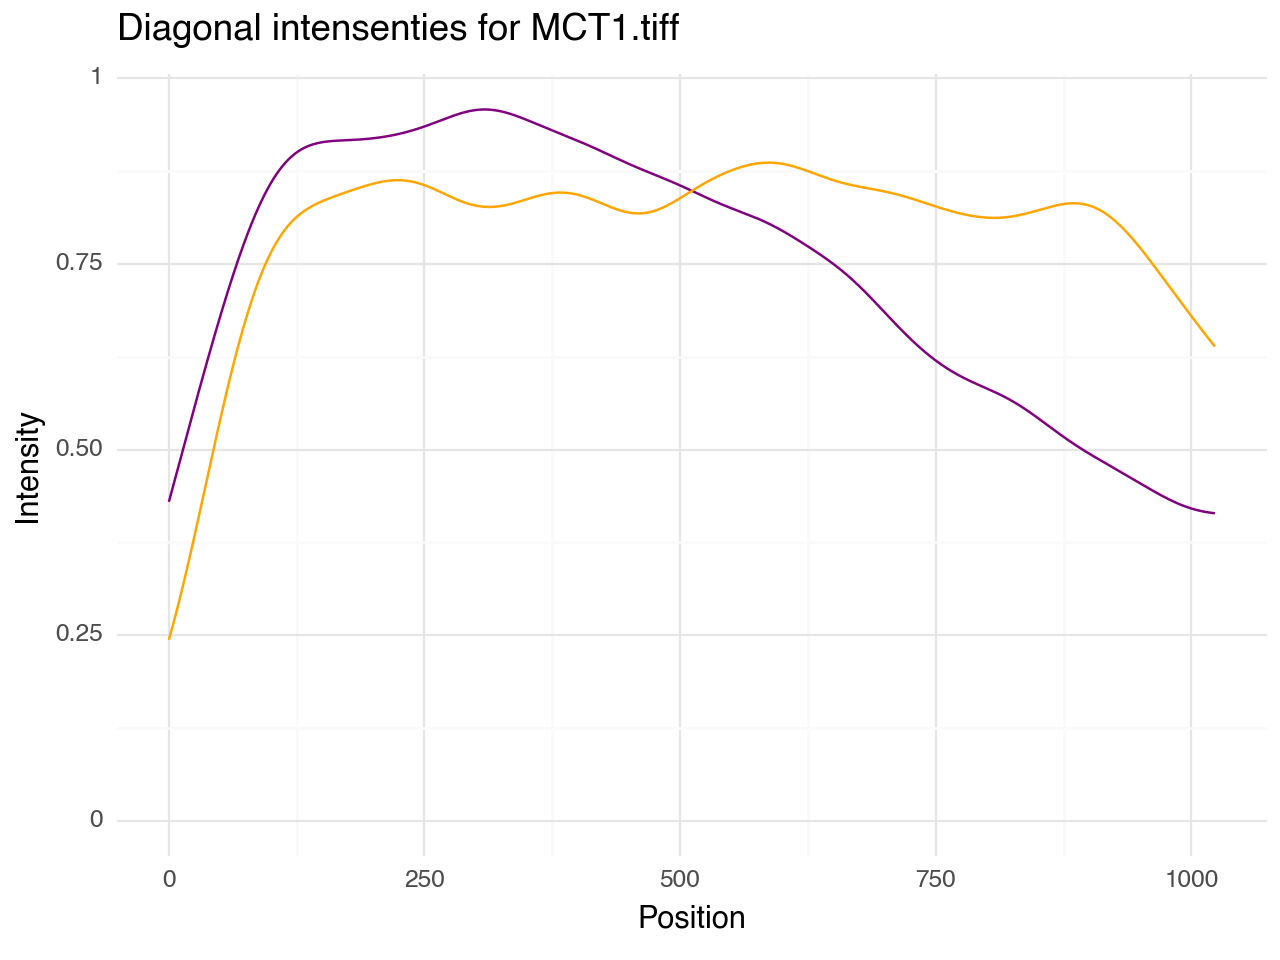


CD98.tiff


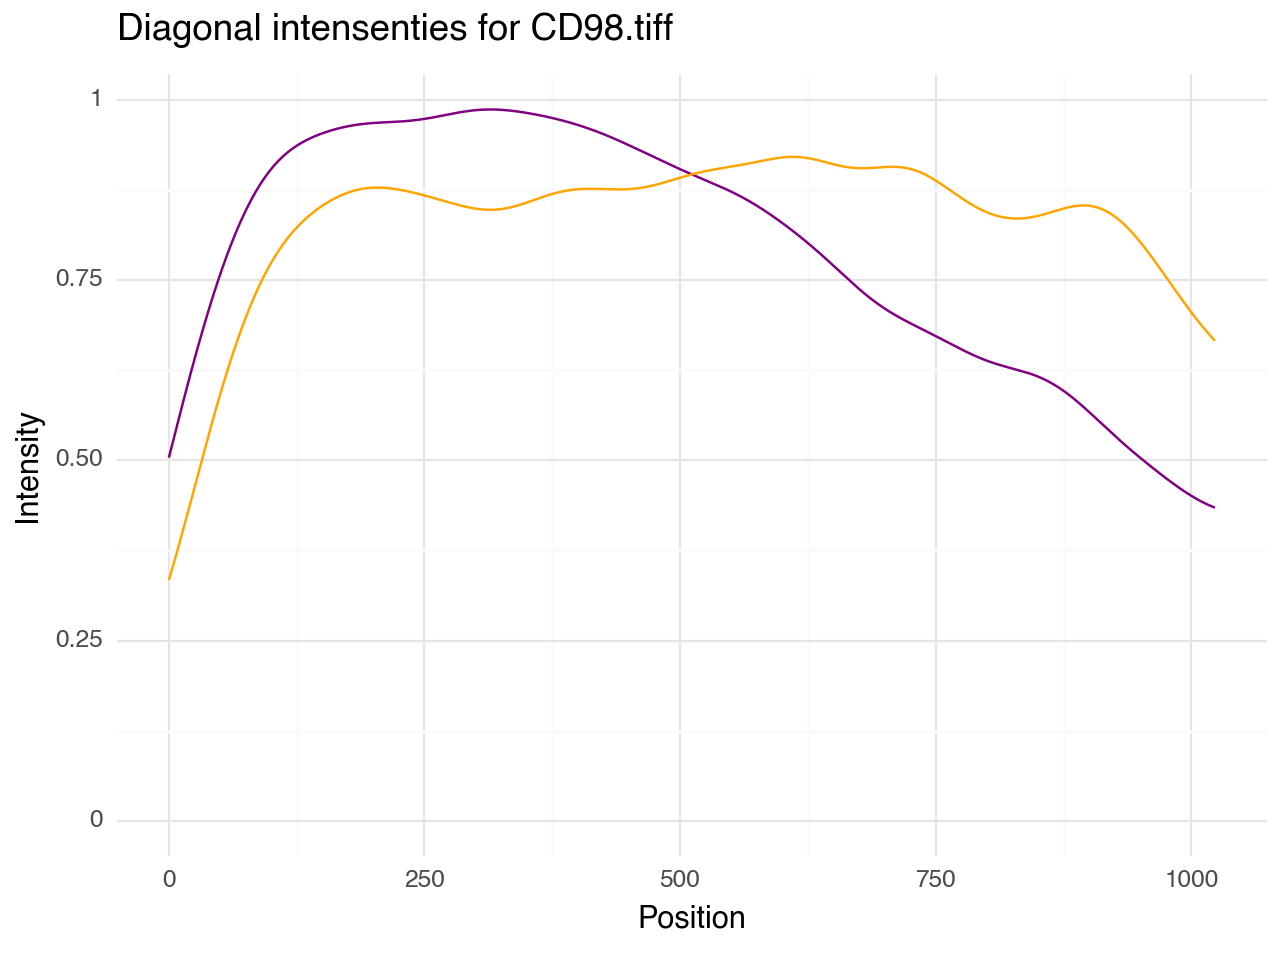


CPT1A.tiff


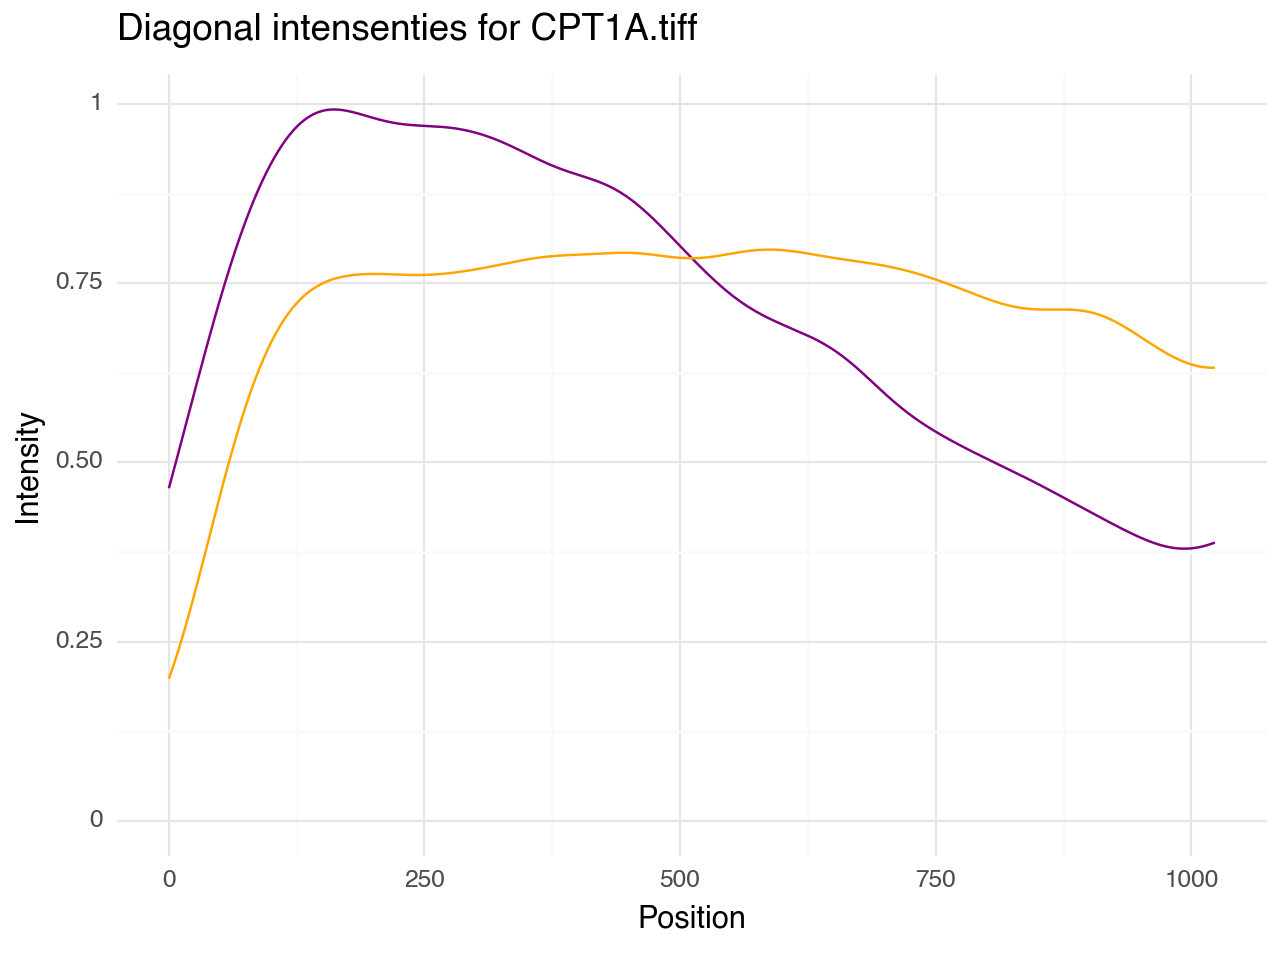


ATP5A.tiff


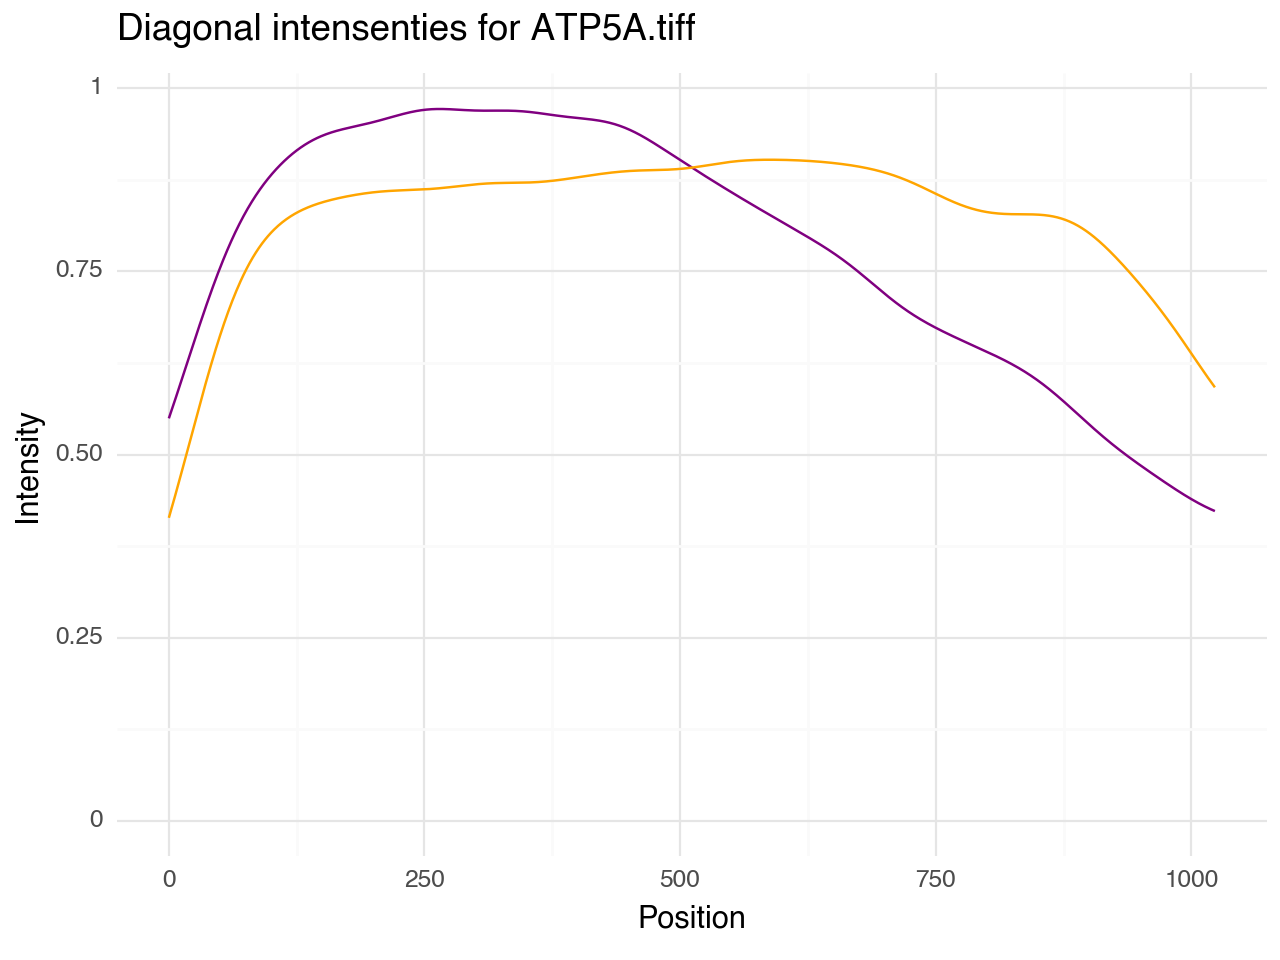


CD163.tiff


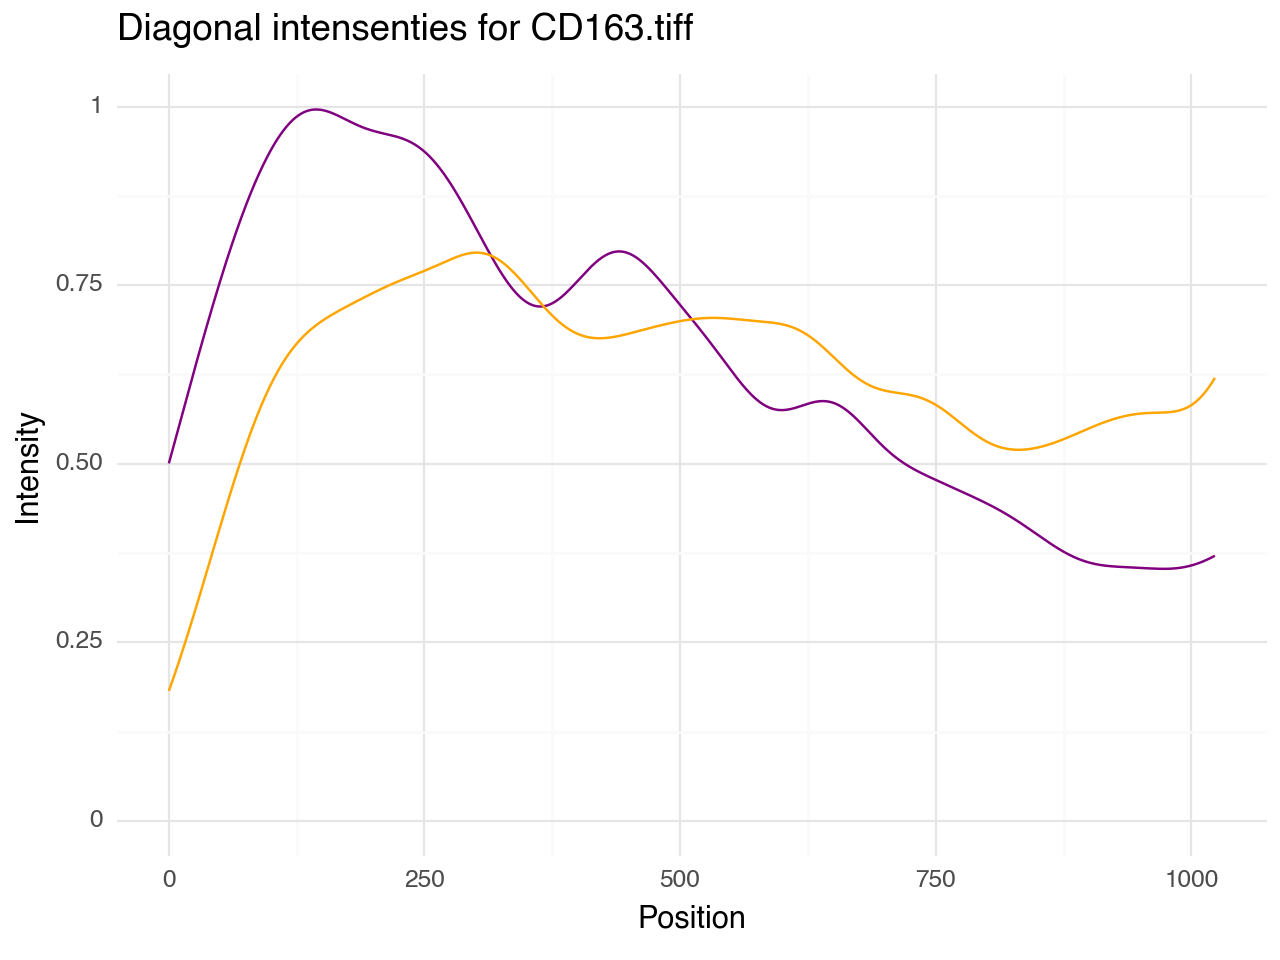


Vimentin.tiff


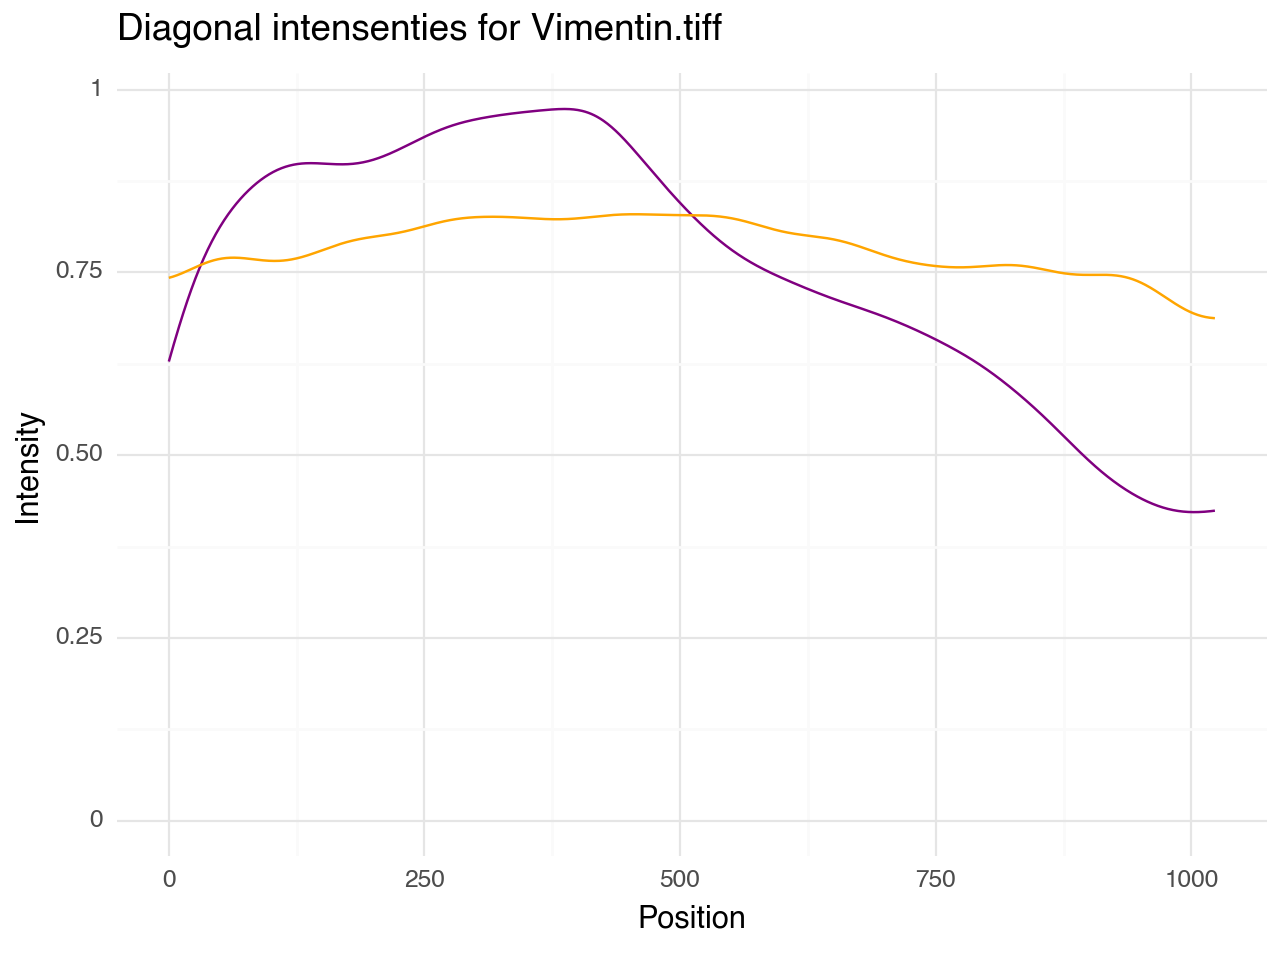


CD4.tiff


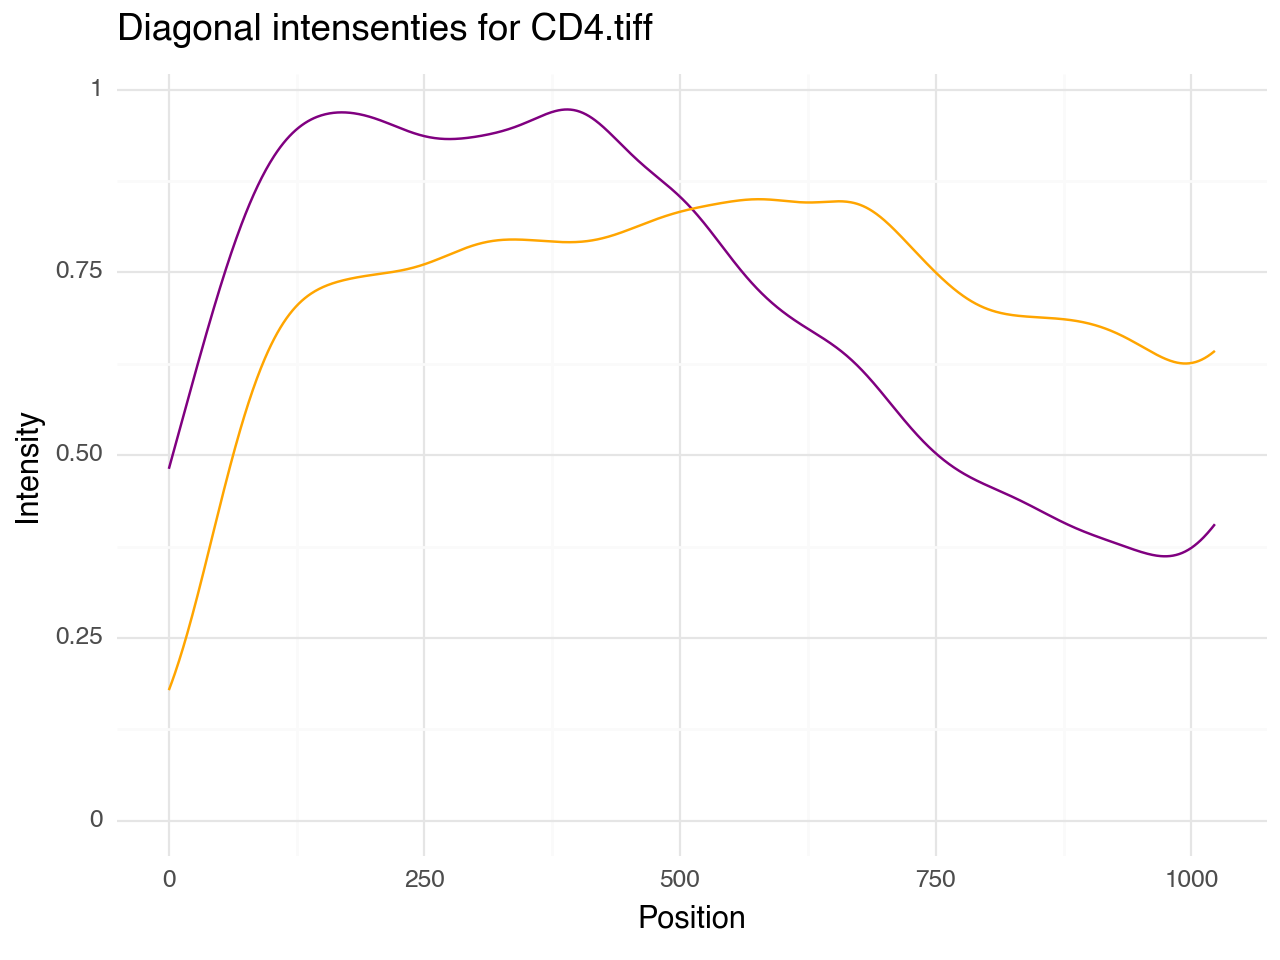


CD14.tiff


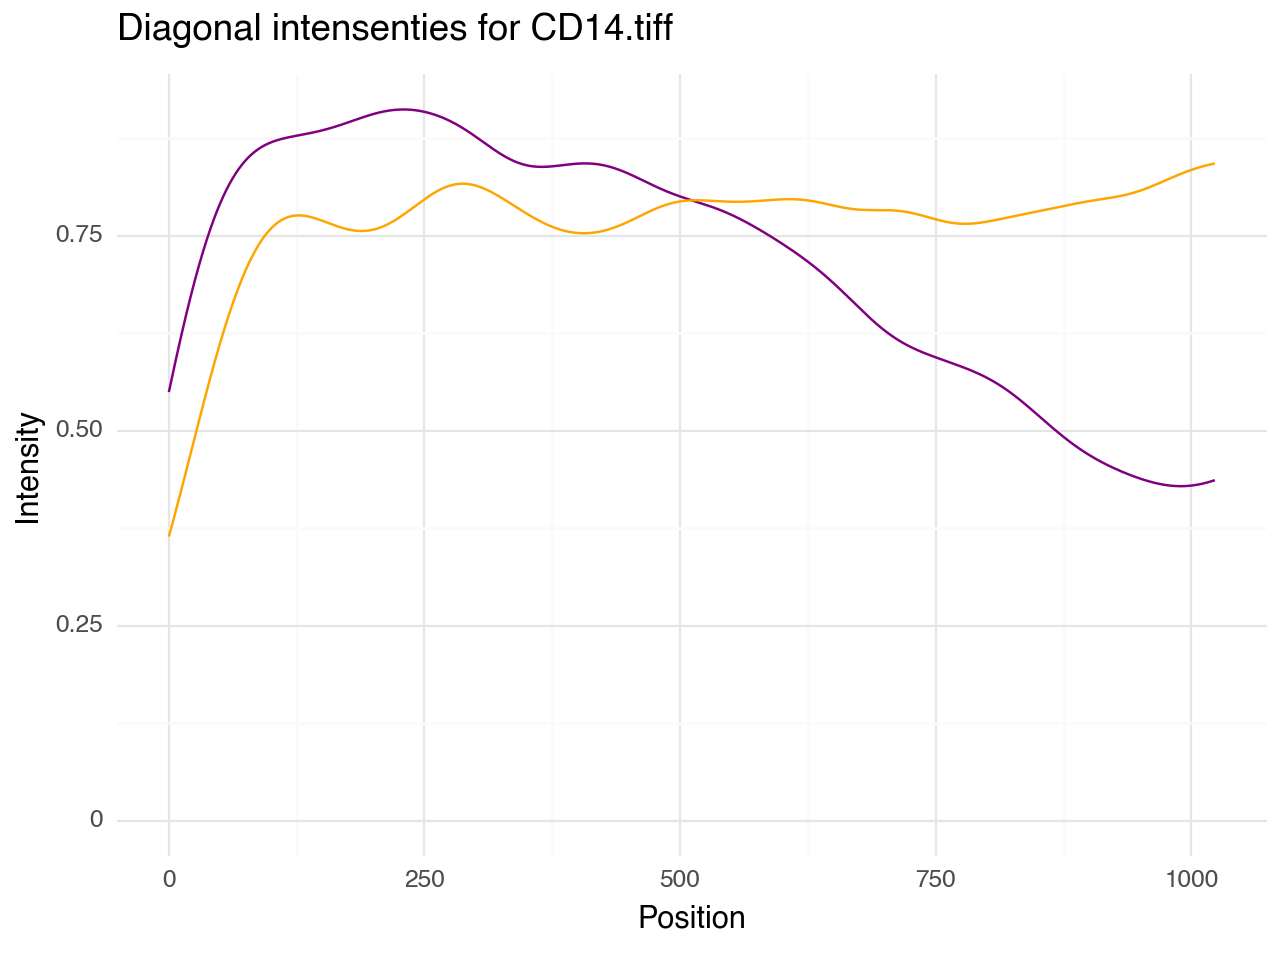


DCN.tiff


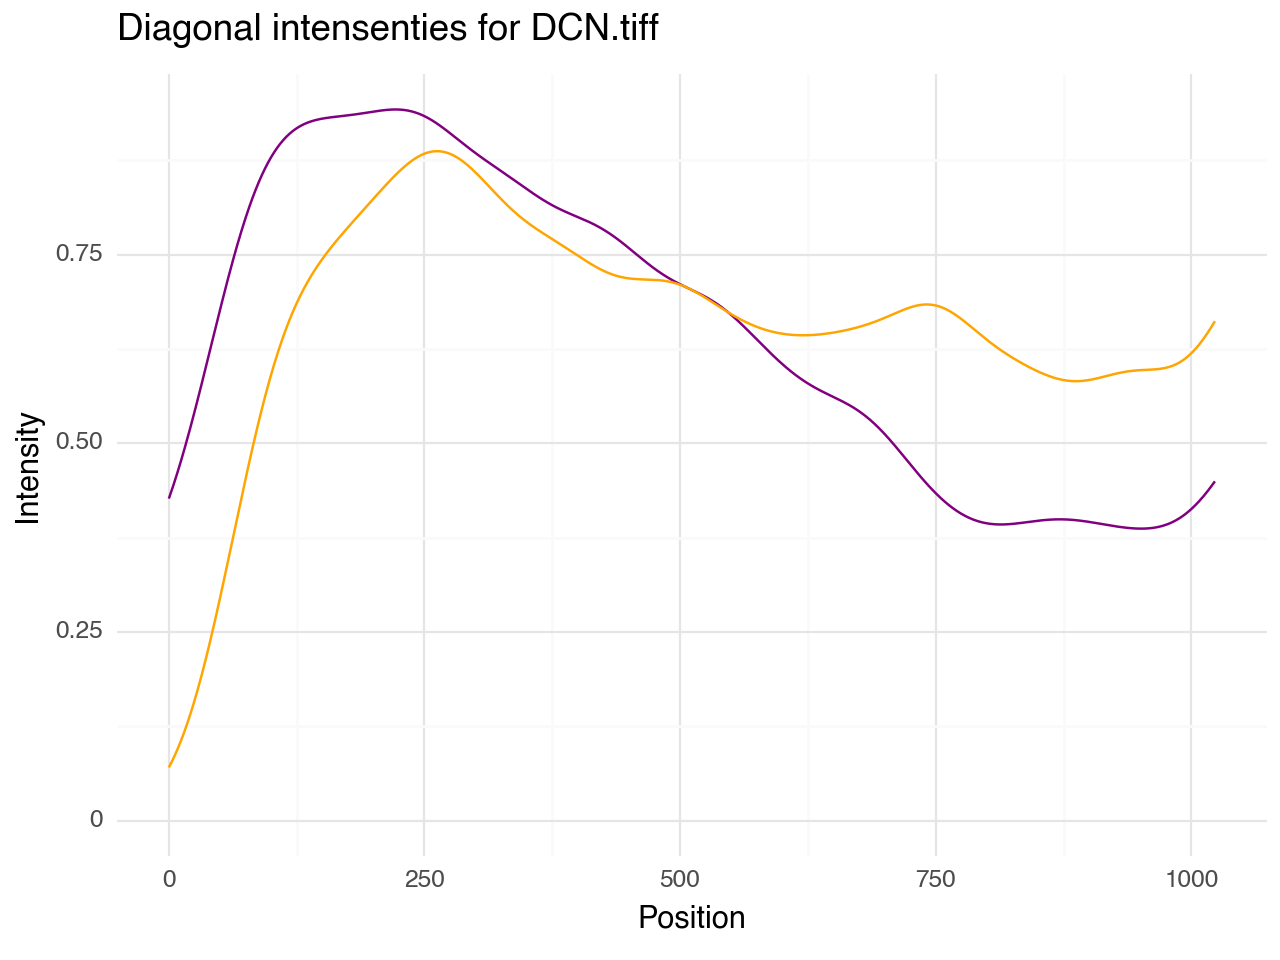


Ki67.tiff


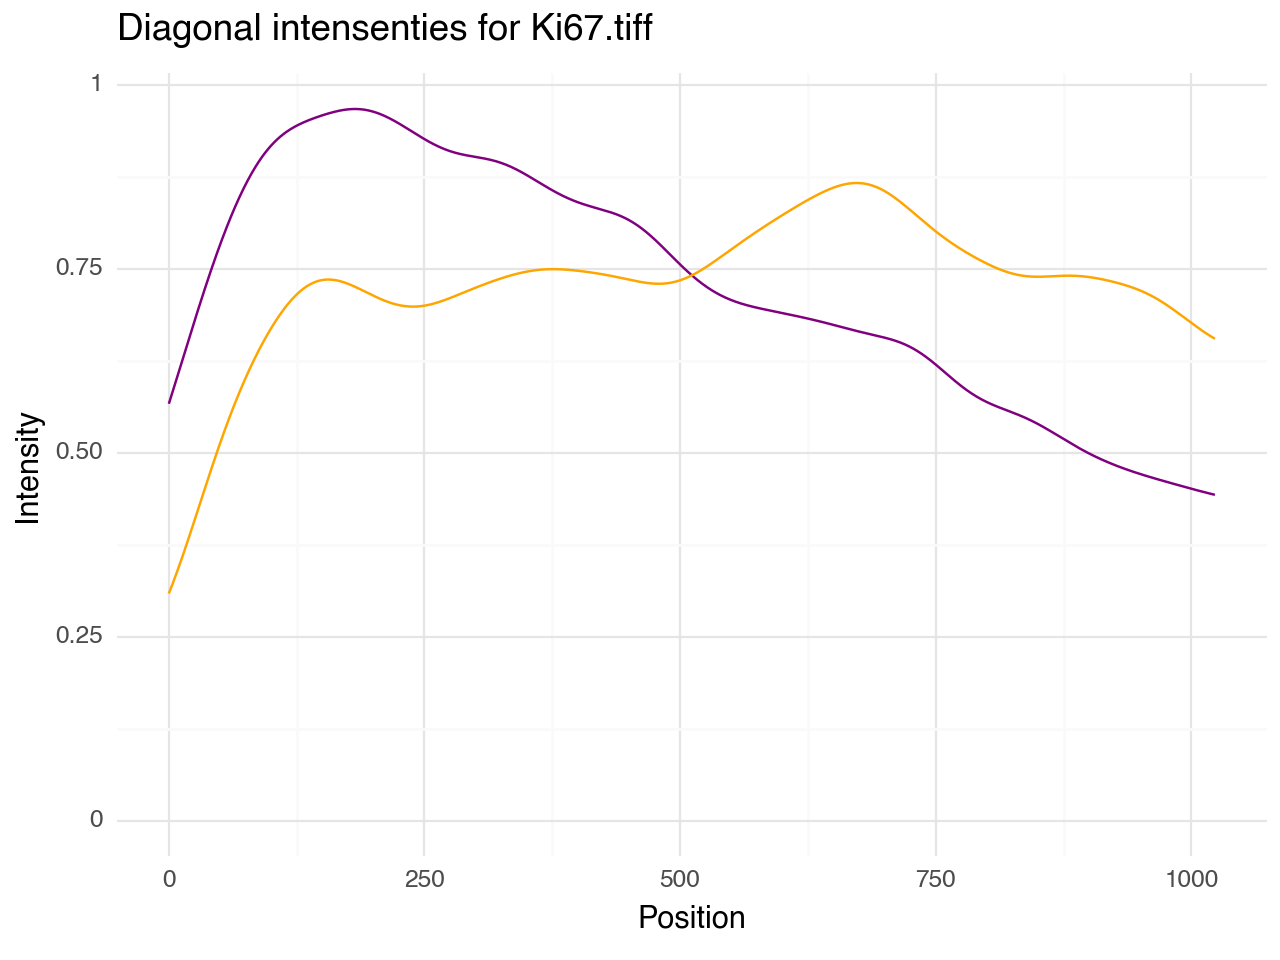


MSH2.tiff


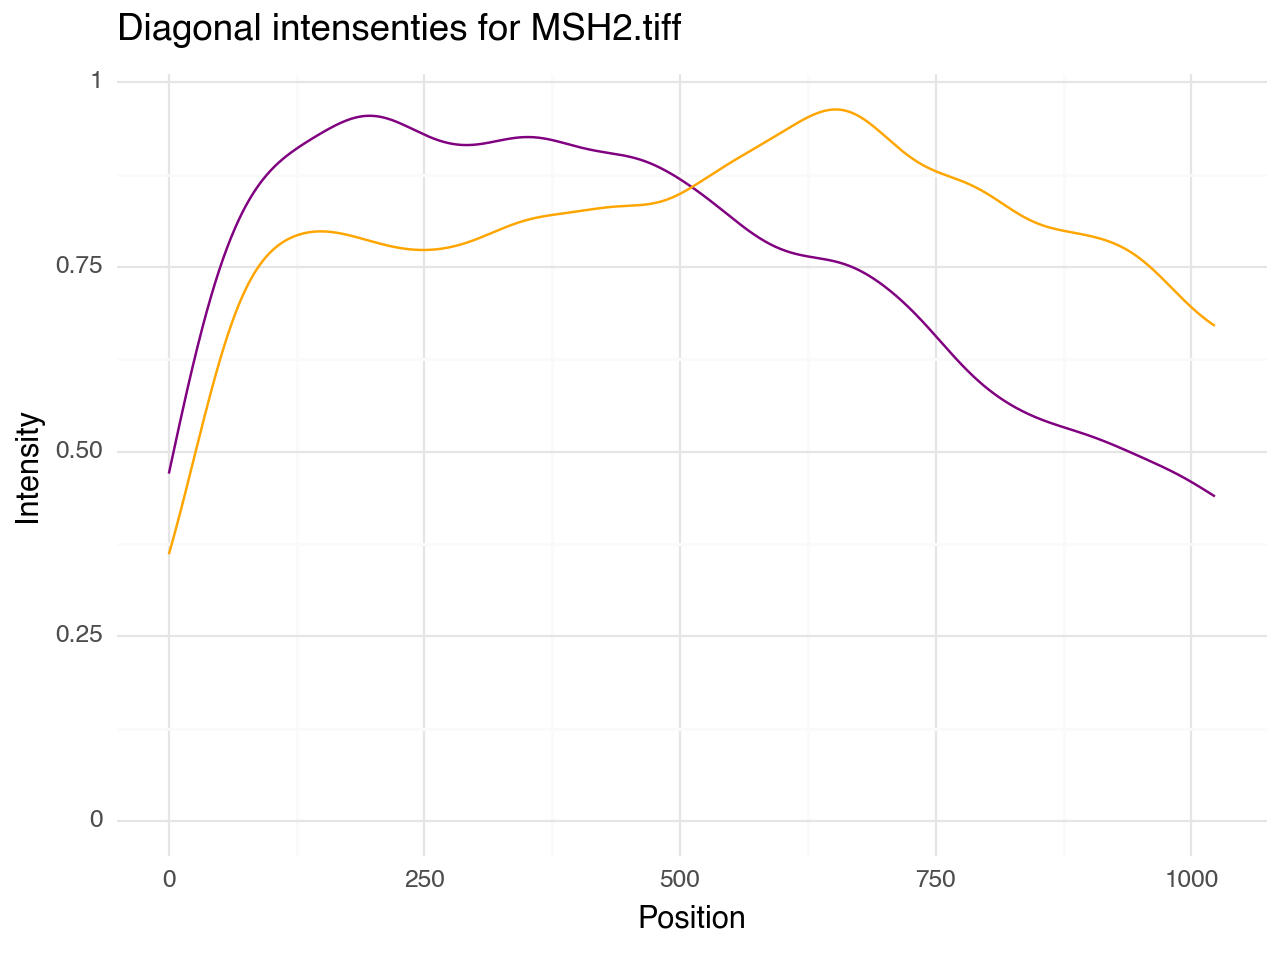


Au.tiff


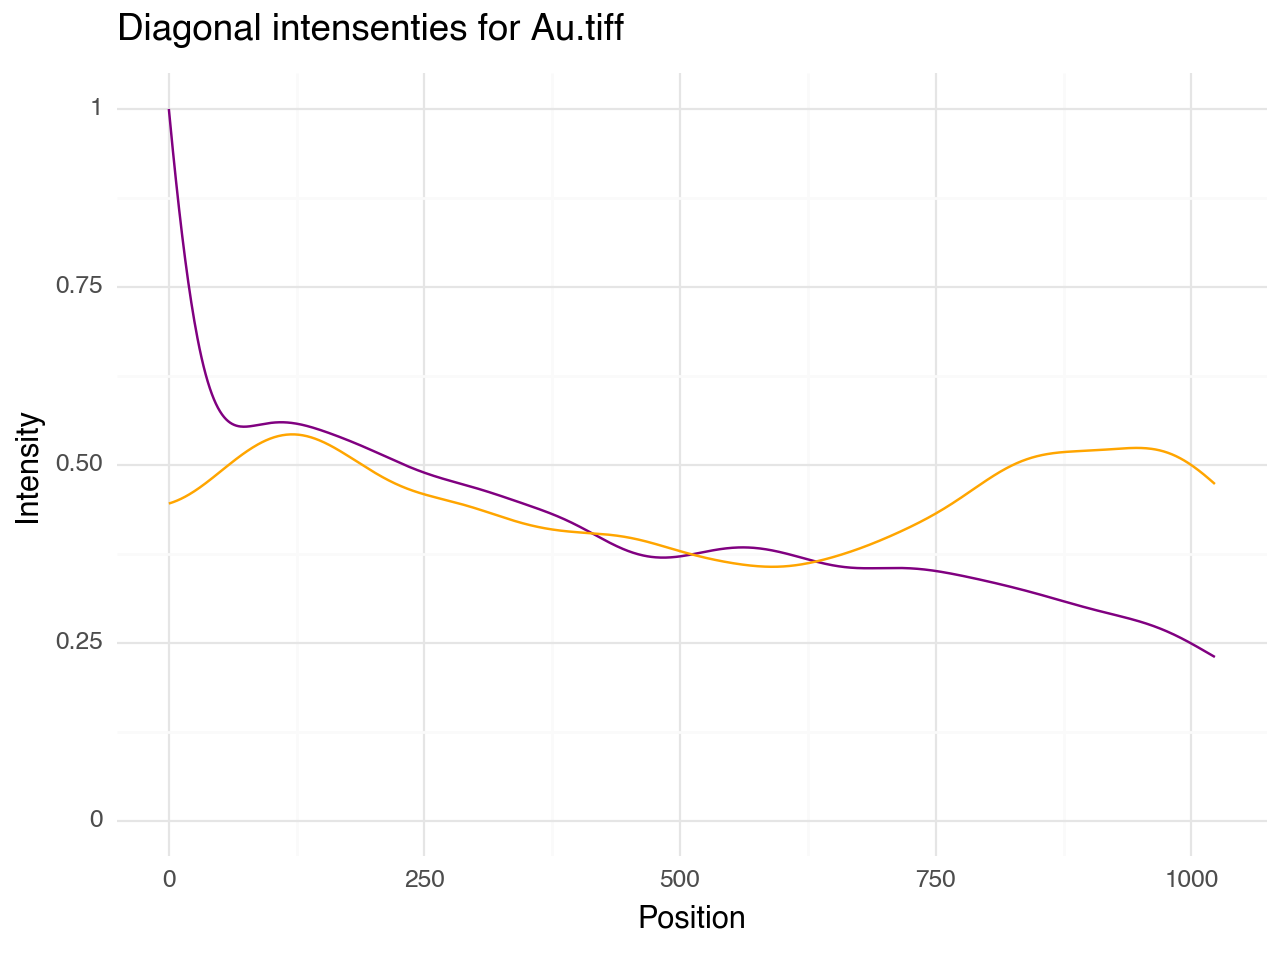


MPO.tiff


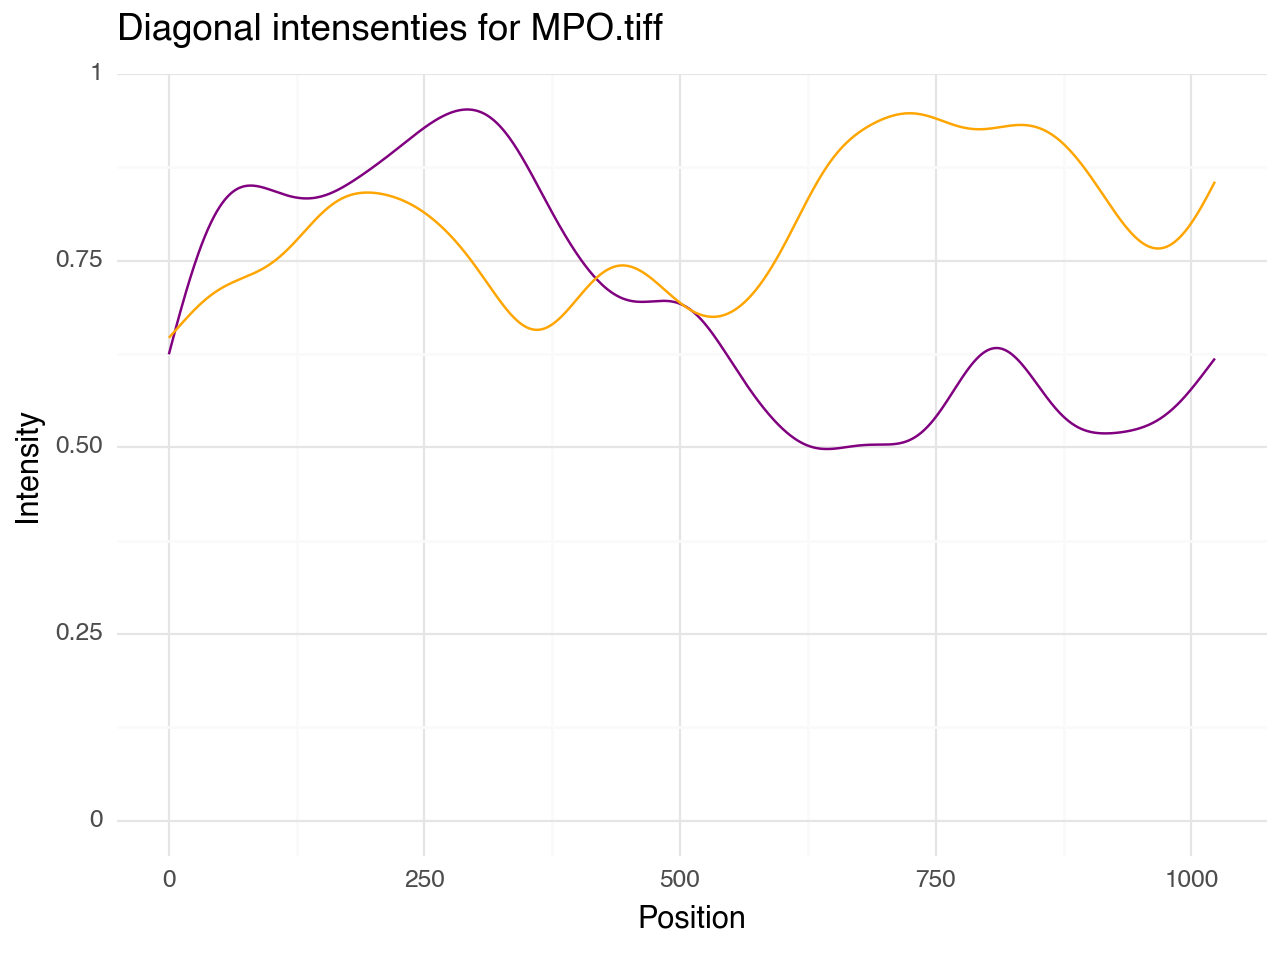


CD7.tiff


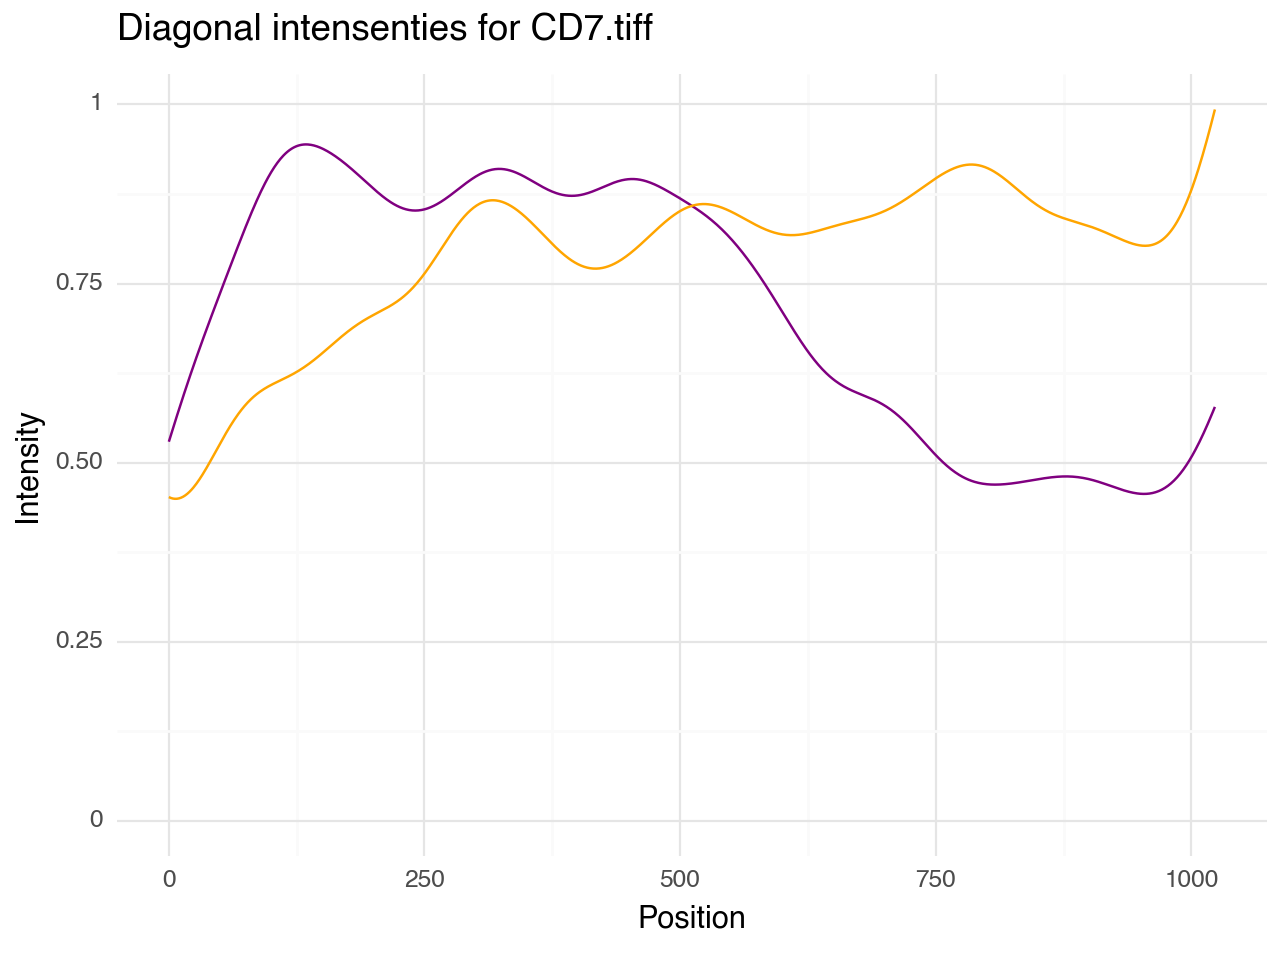


CD8.tiff


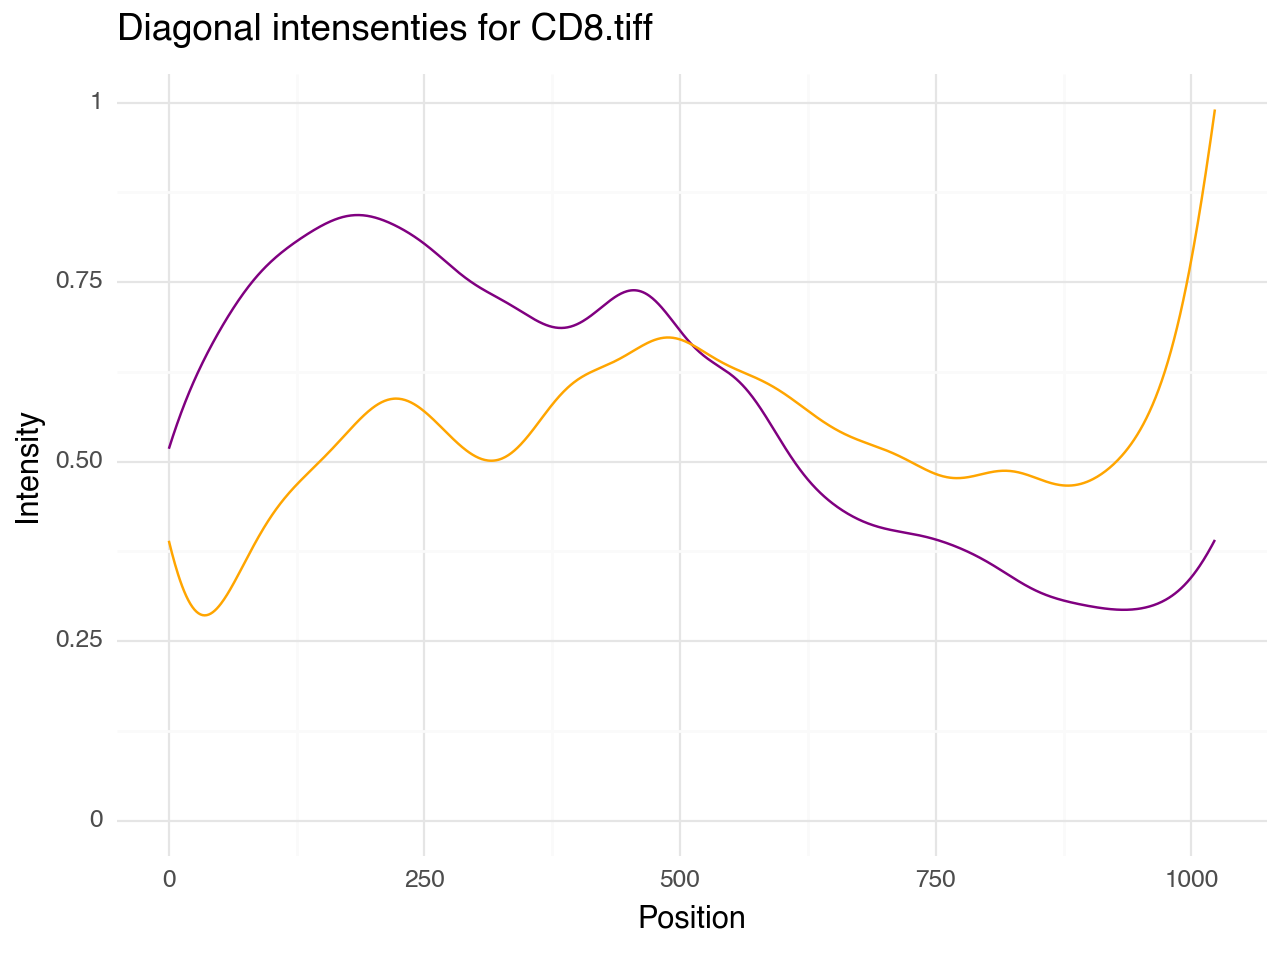


PD1.tiff


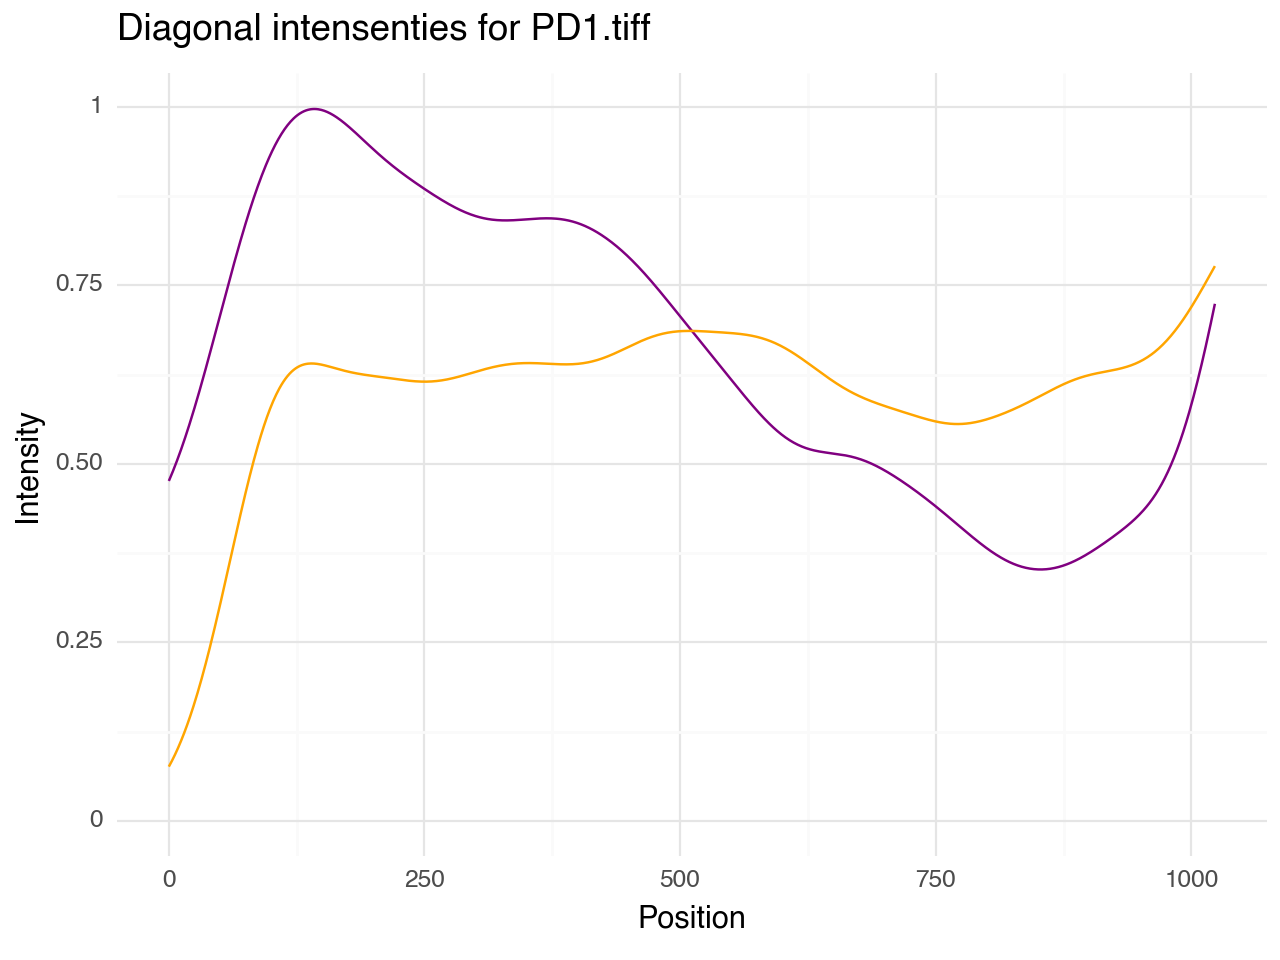


ARG1.tiff


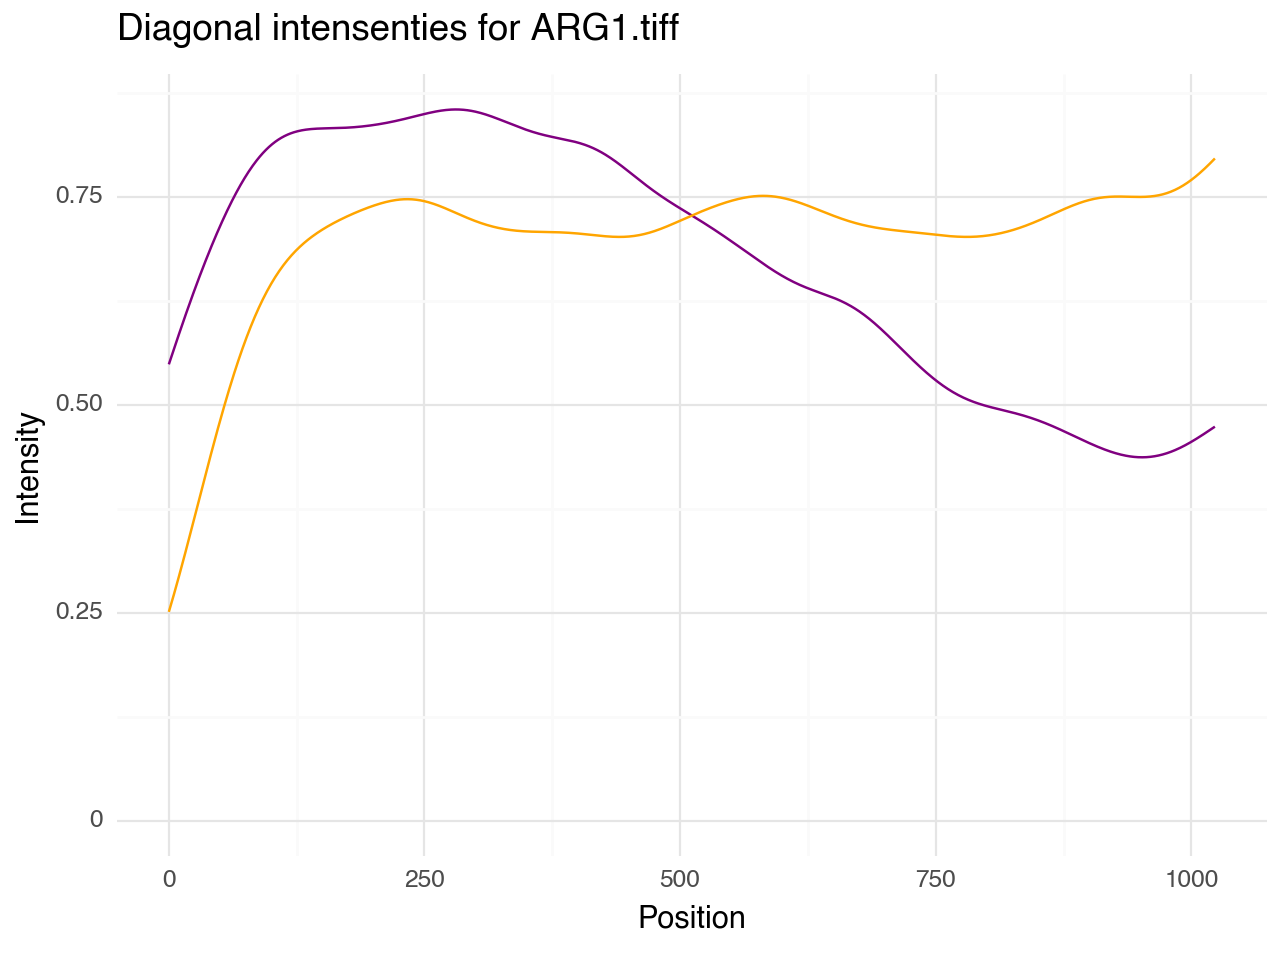


CD20.tiff


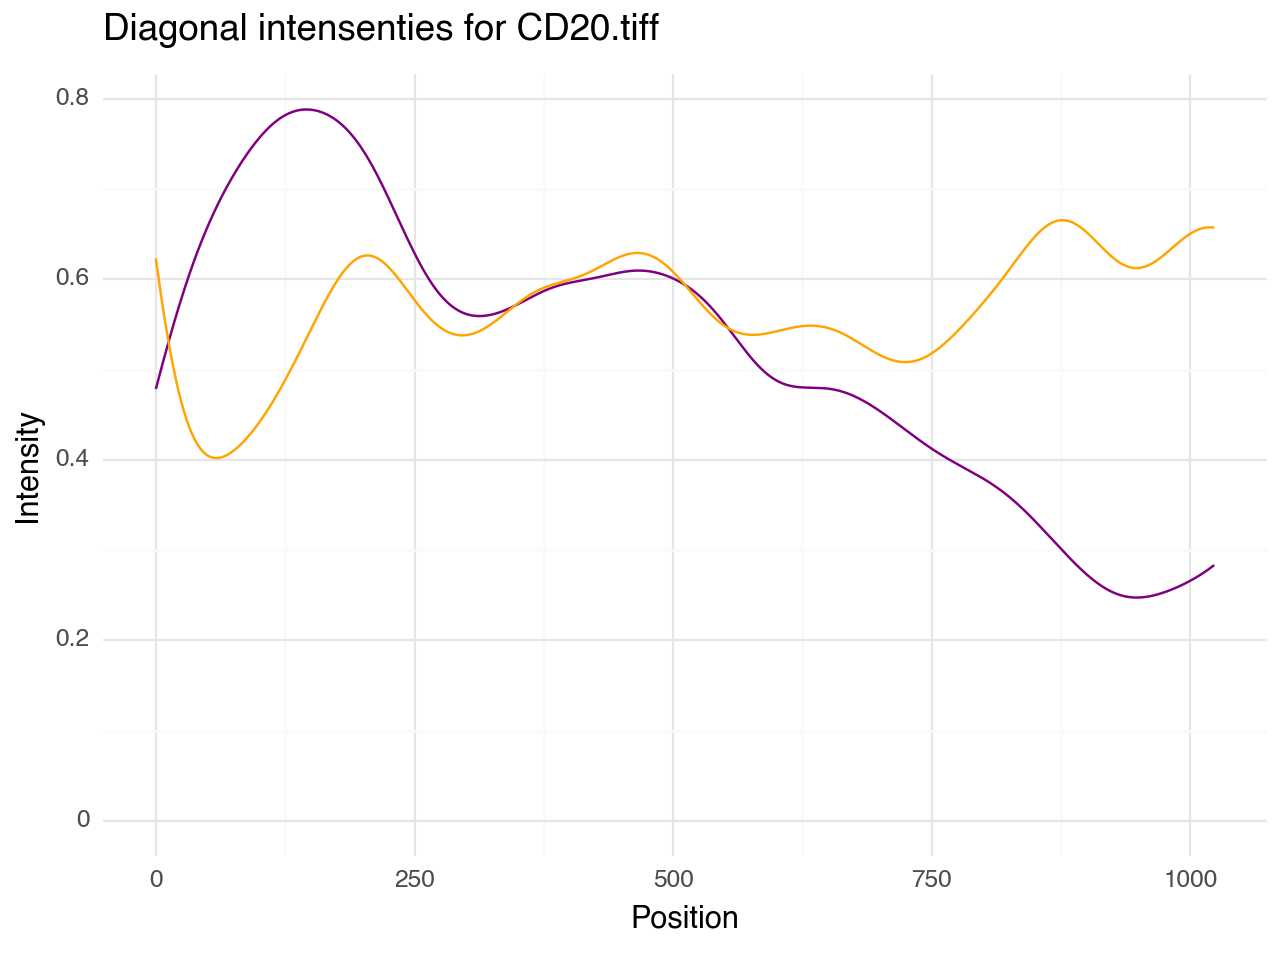


nuclei.tiff


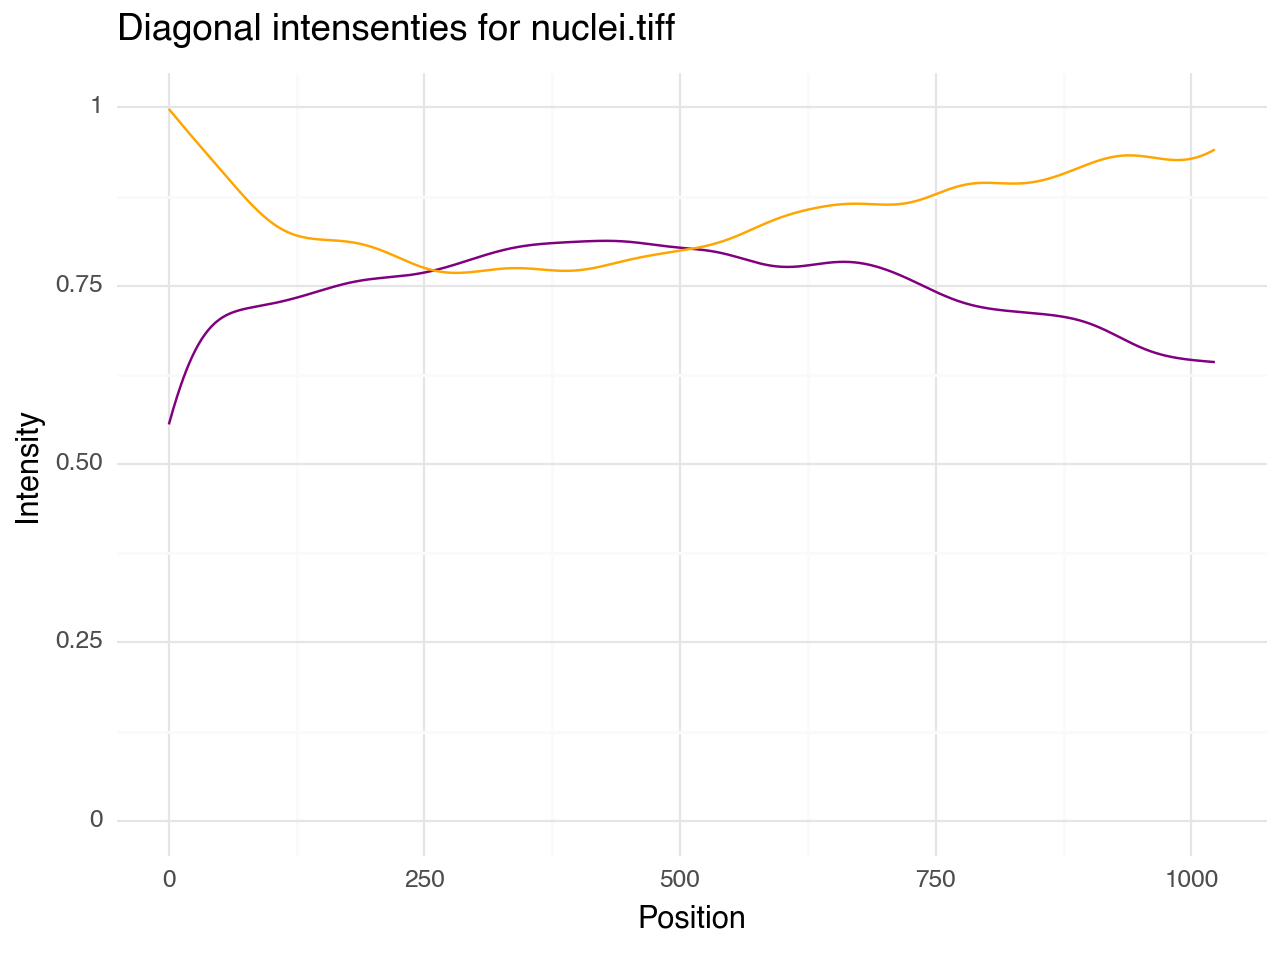


Noodle.tiff


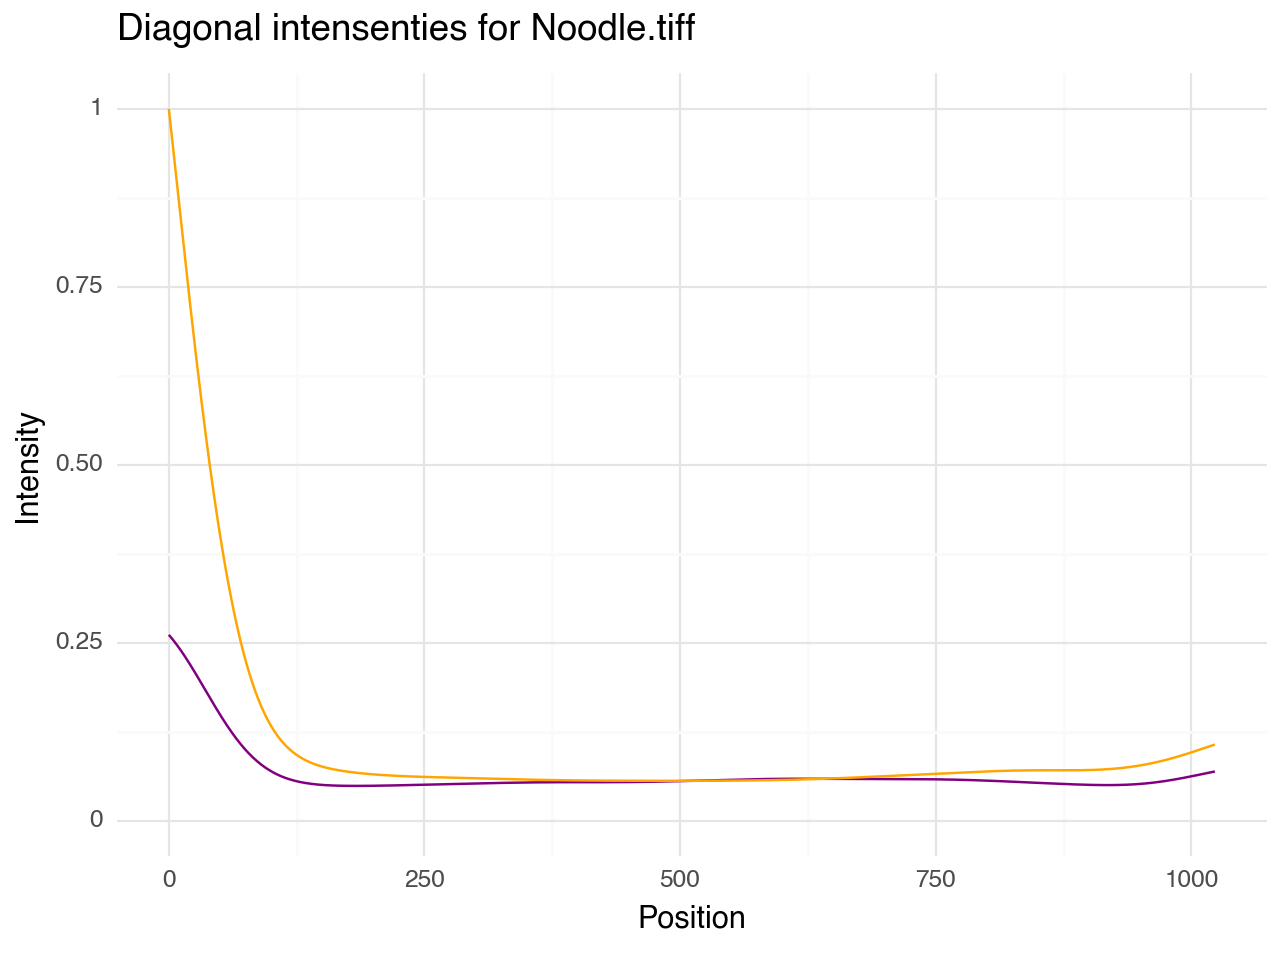


CD68.tiff


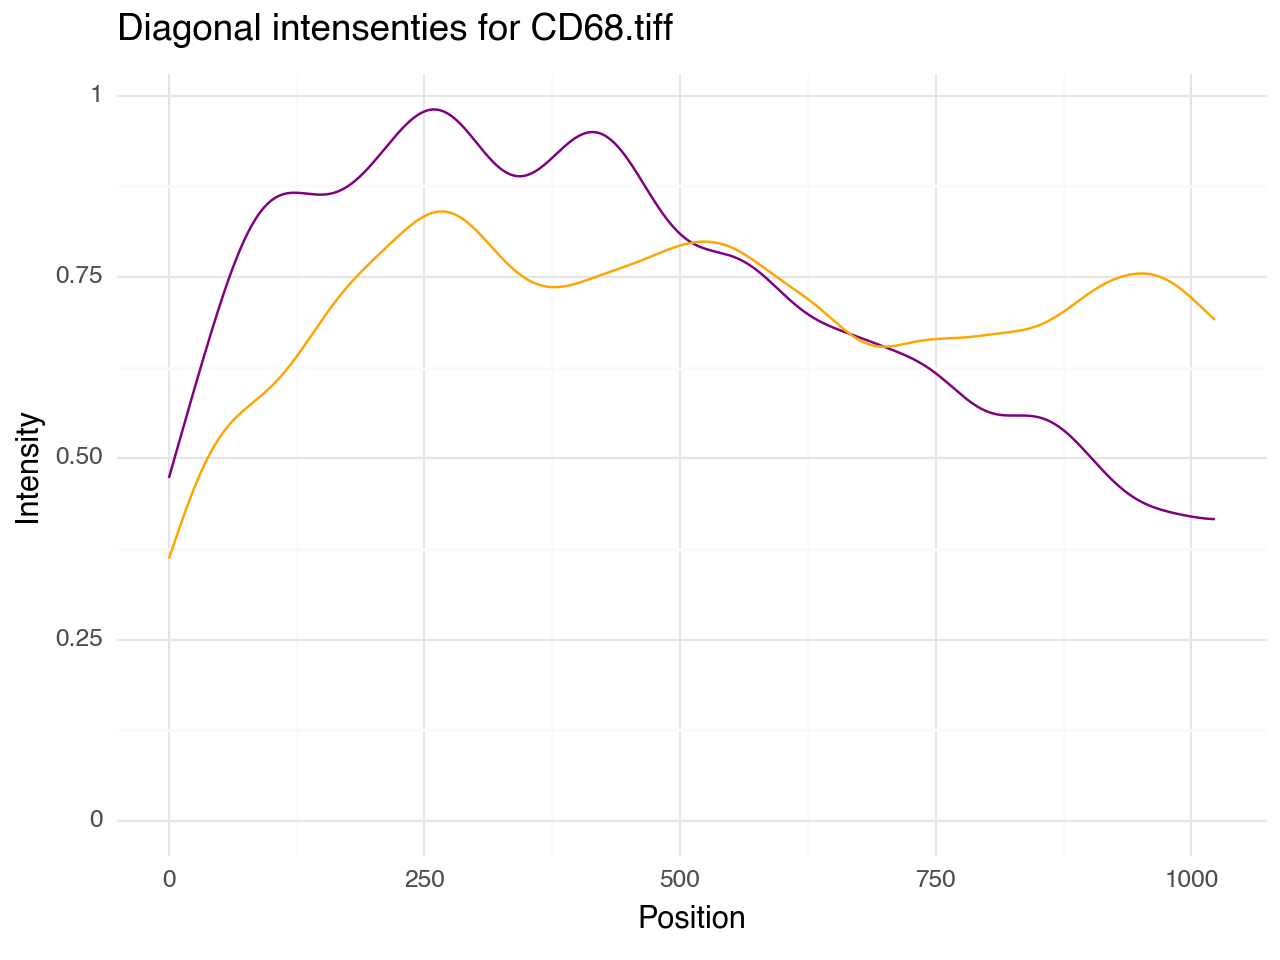


ASCT2.tiff


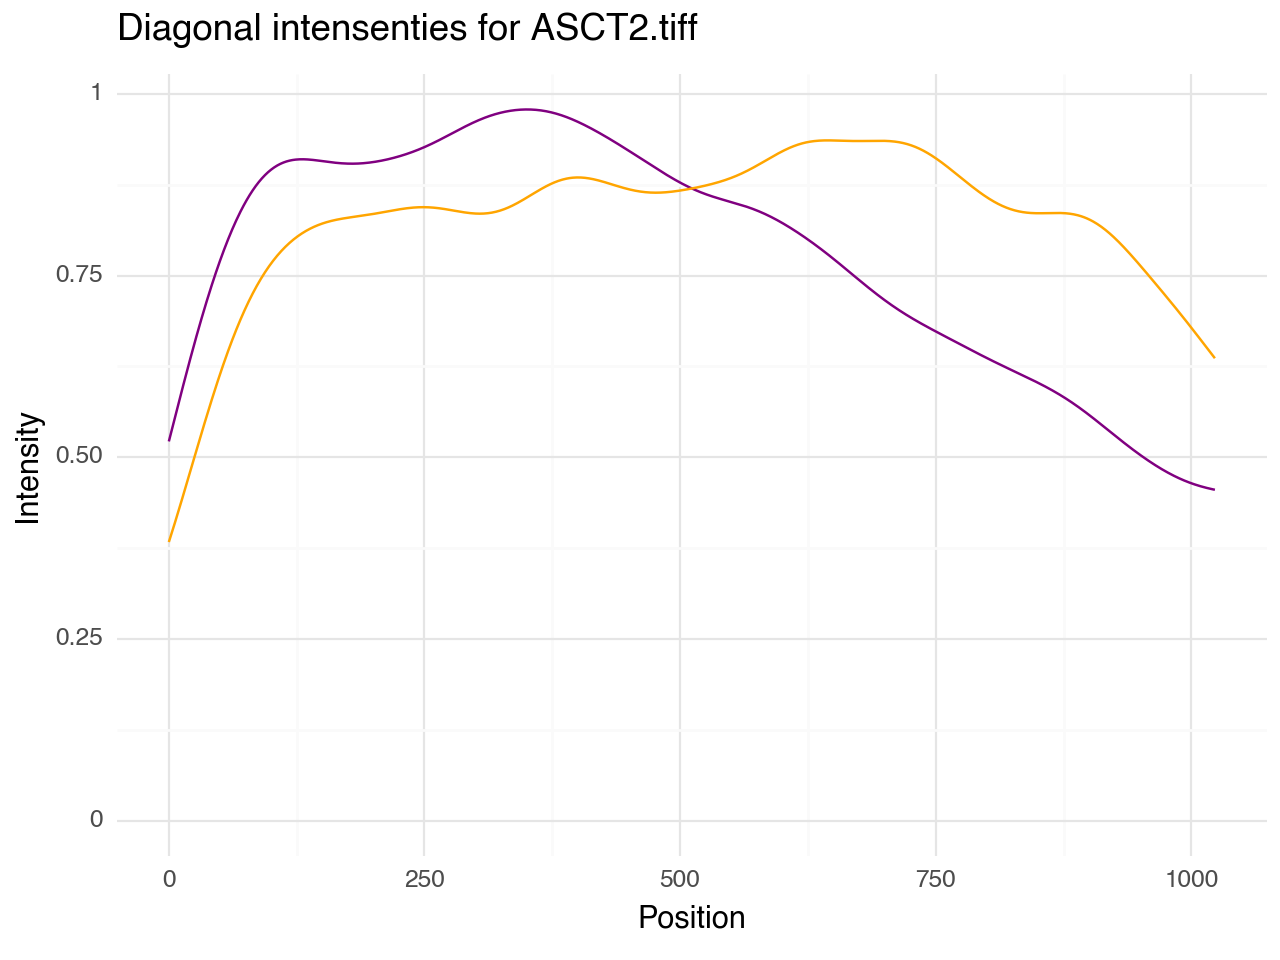


SMA.tiff


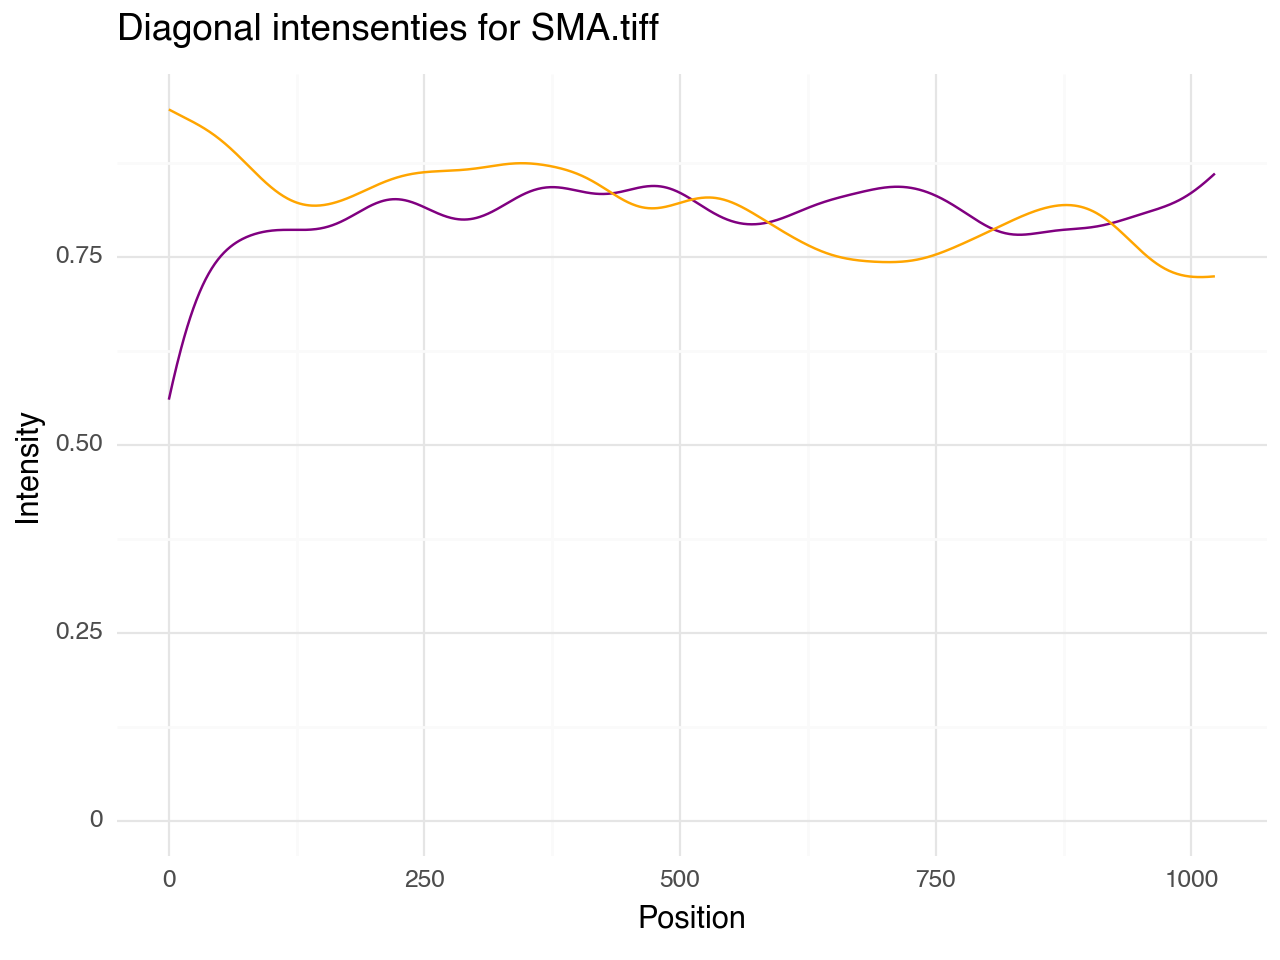


MSH2_nuc_include.tiff


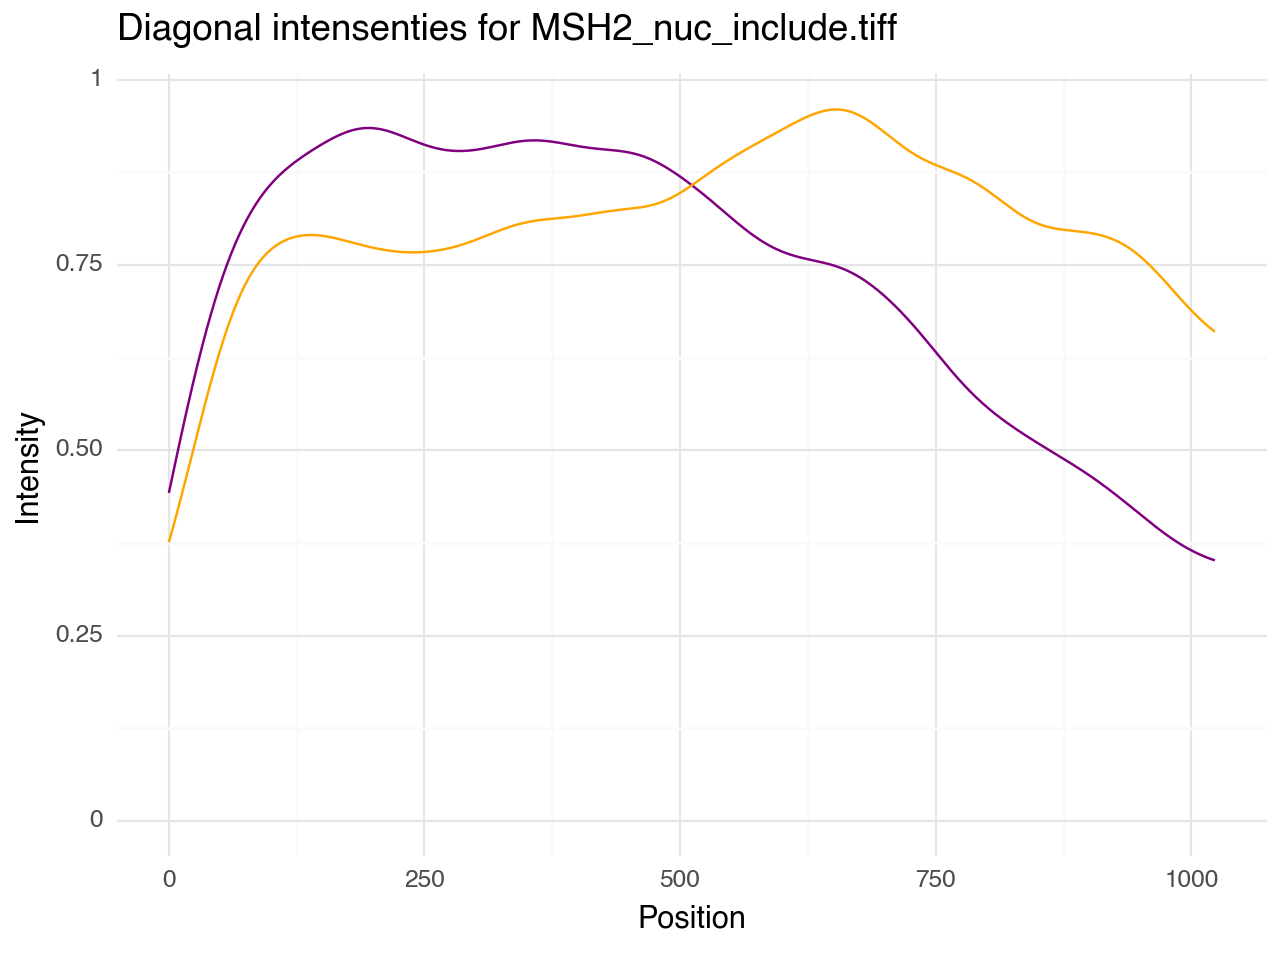


GS.tiff


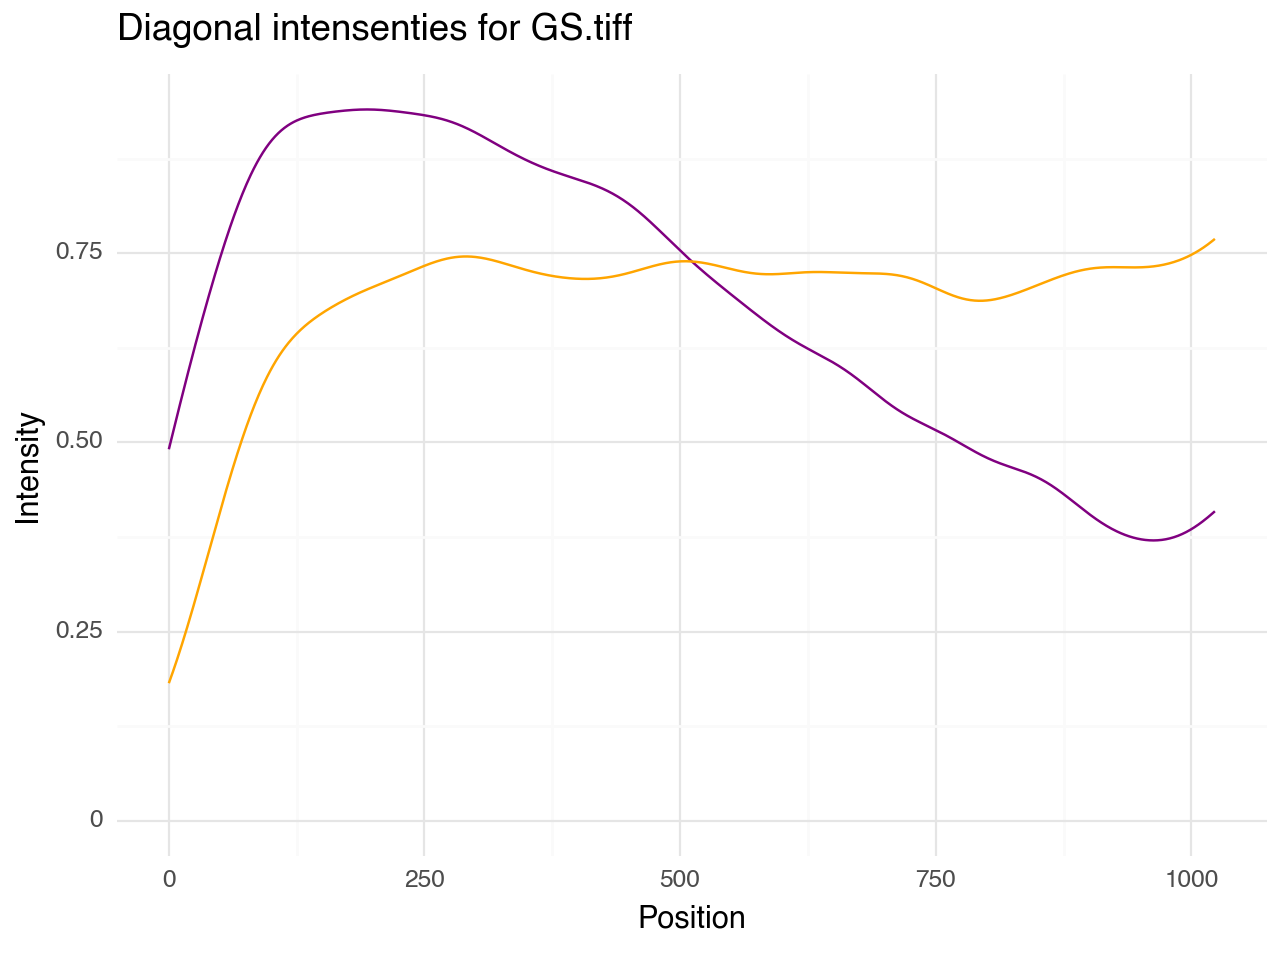


FoxP3_nuc_include.tiff


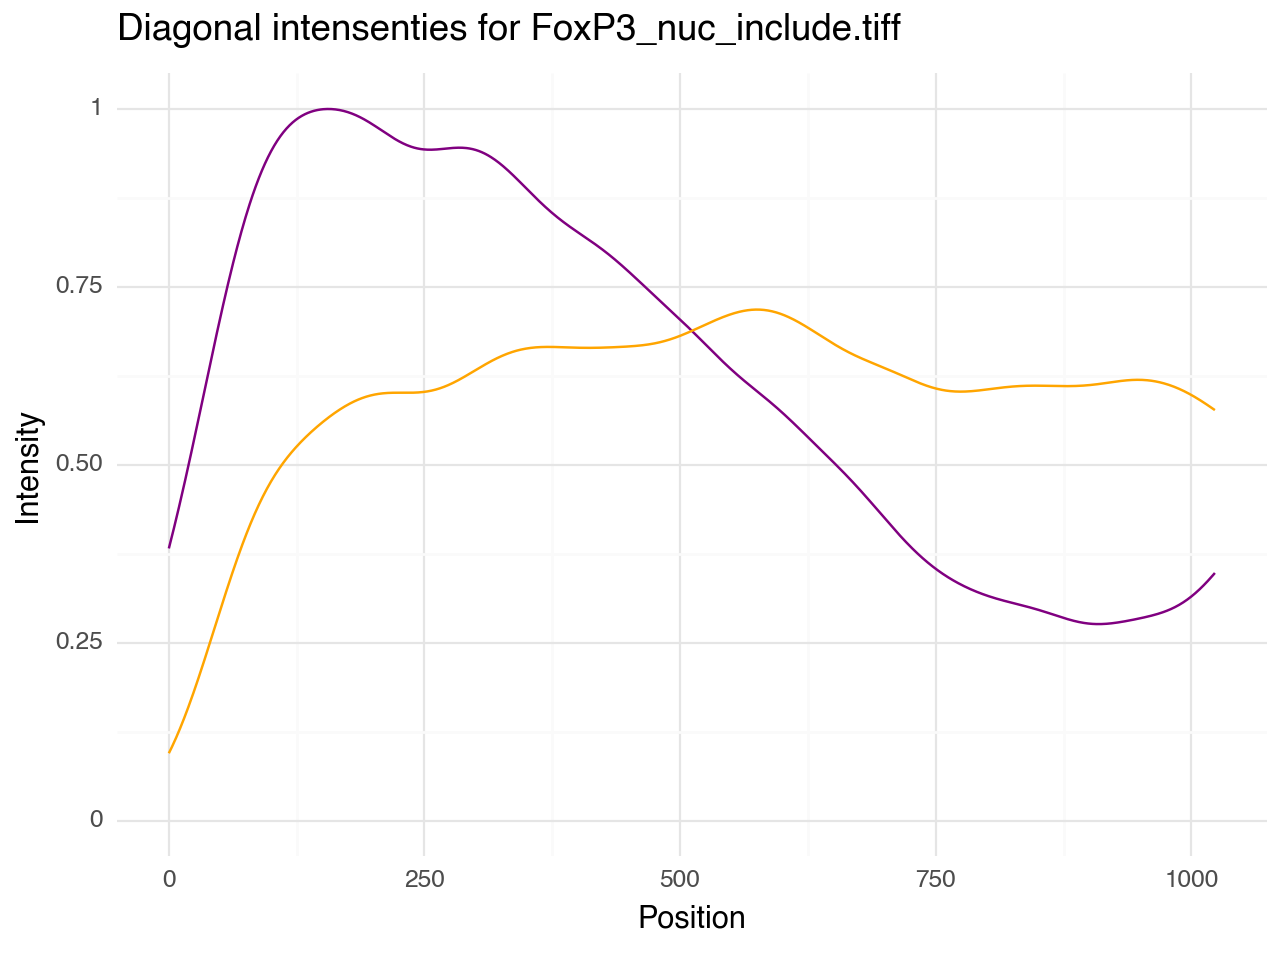


GLS.tiff


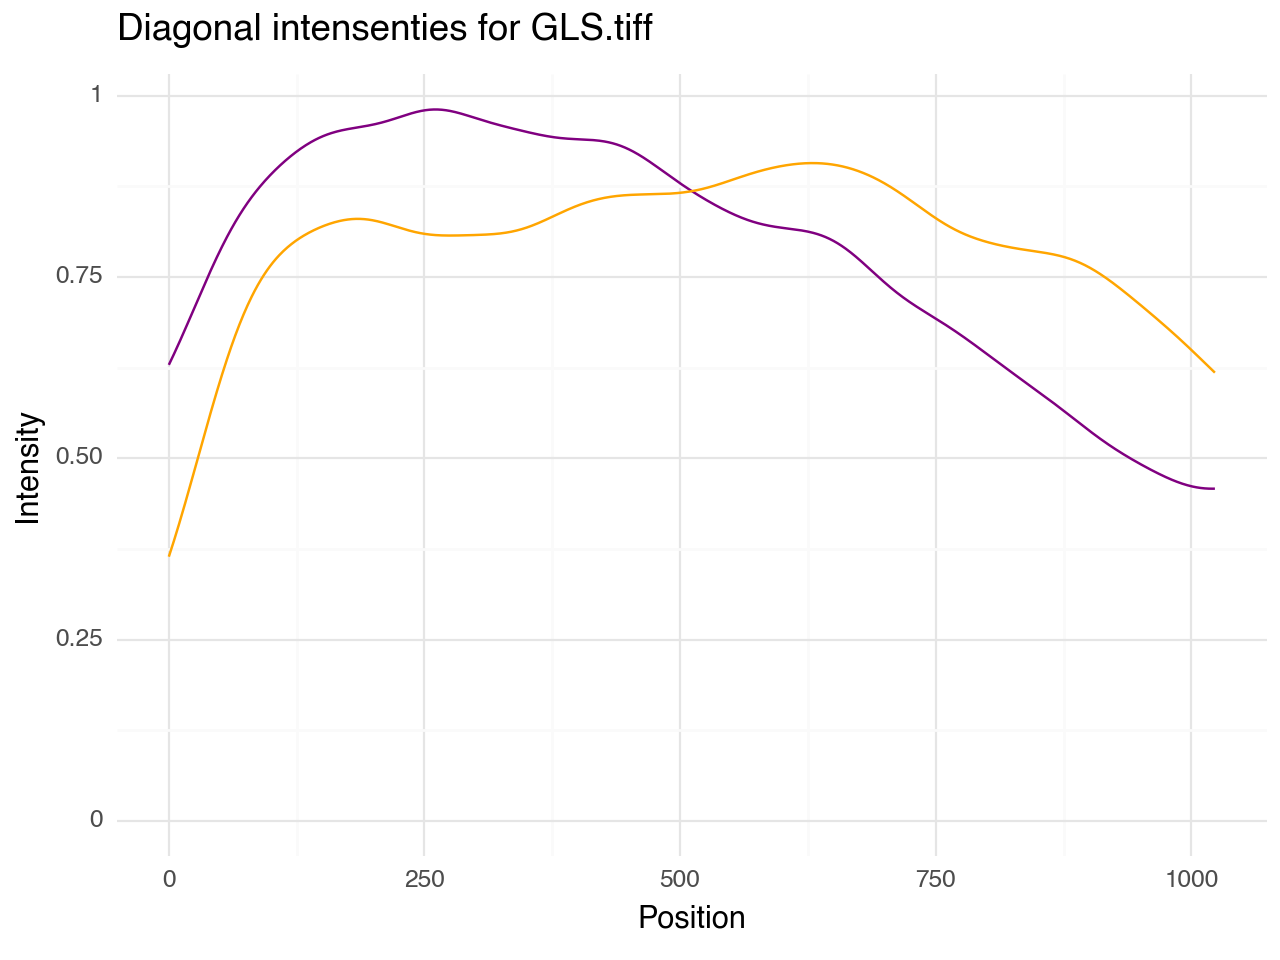


CA9.tiff


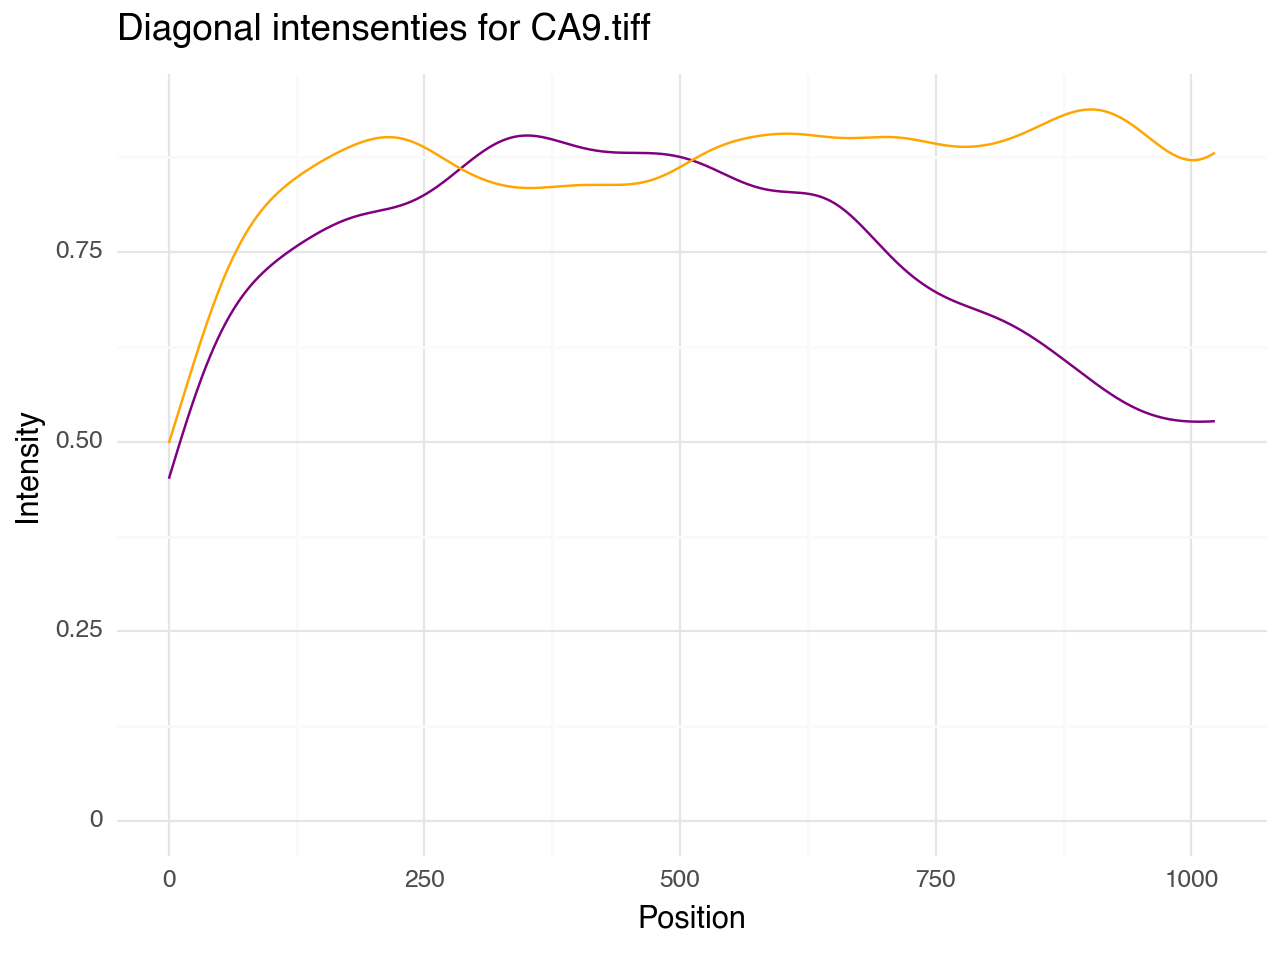


PKM2.tiff


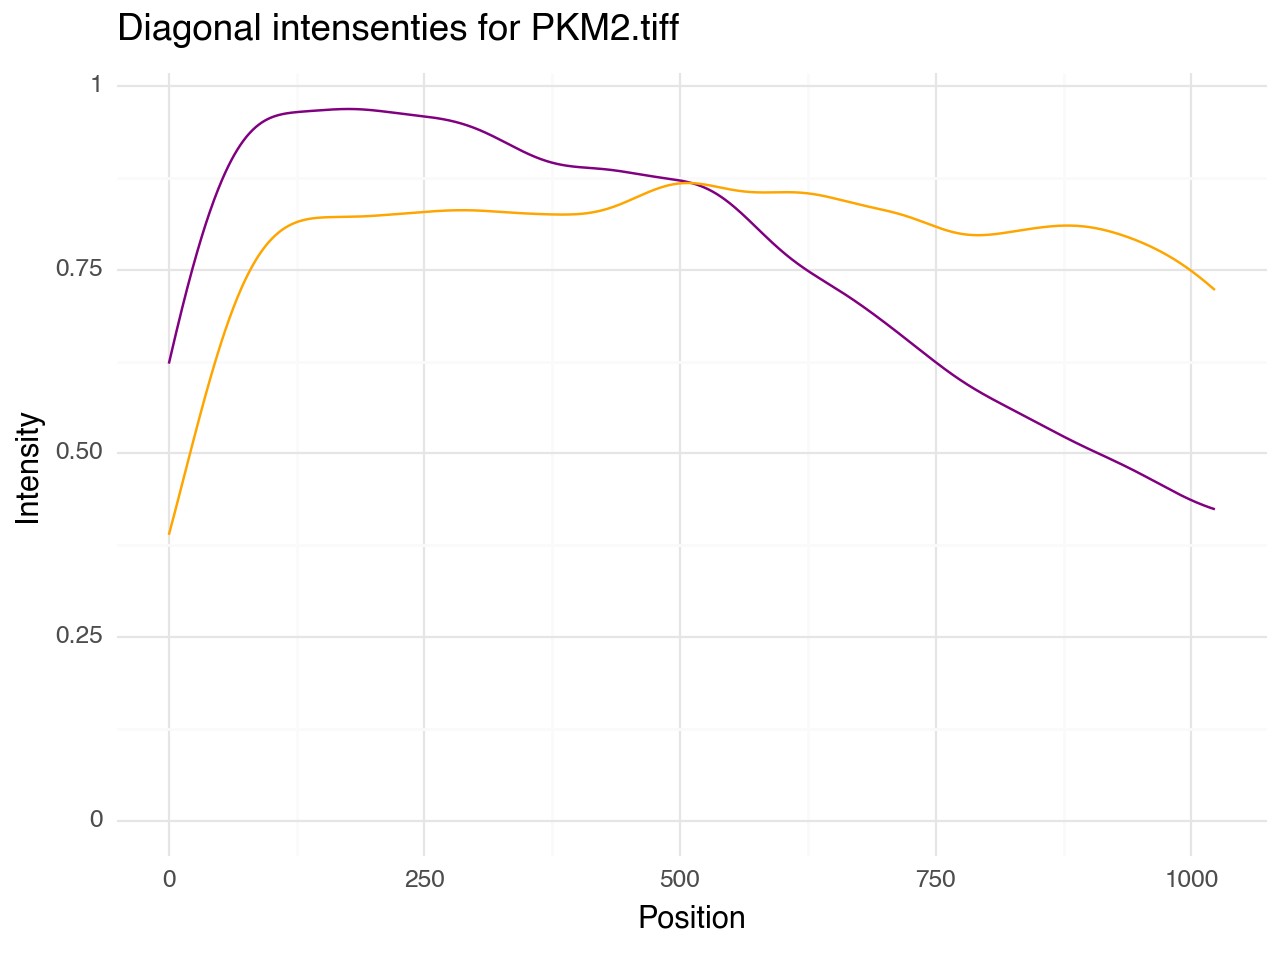


STING1.tiff


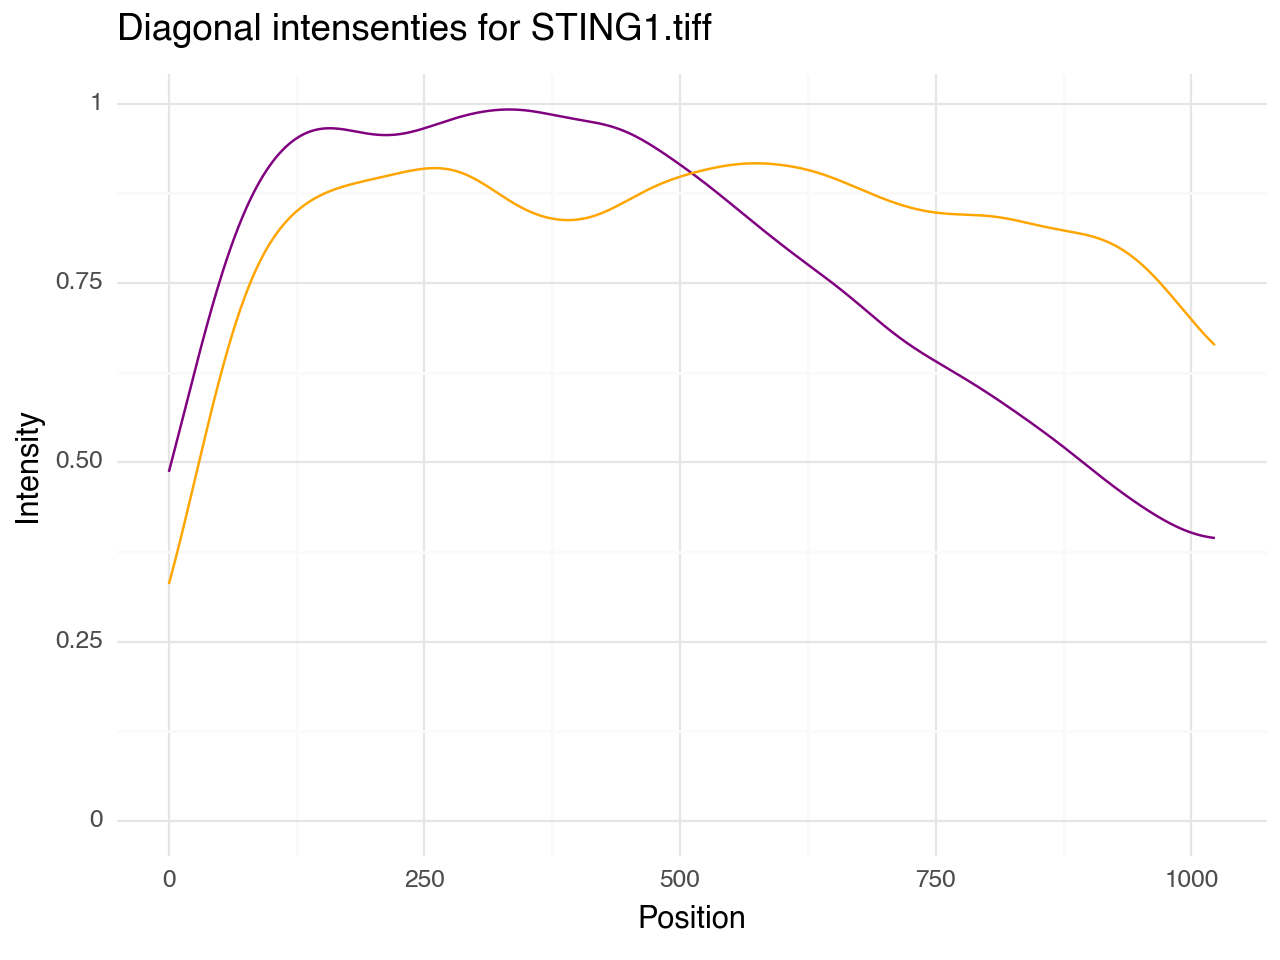


LDH.tiff


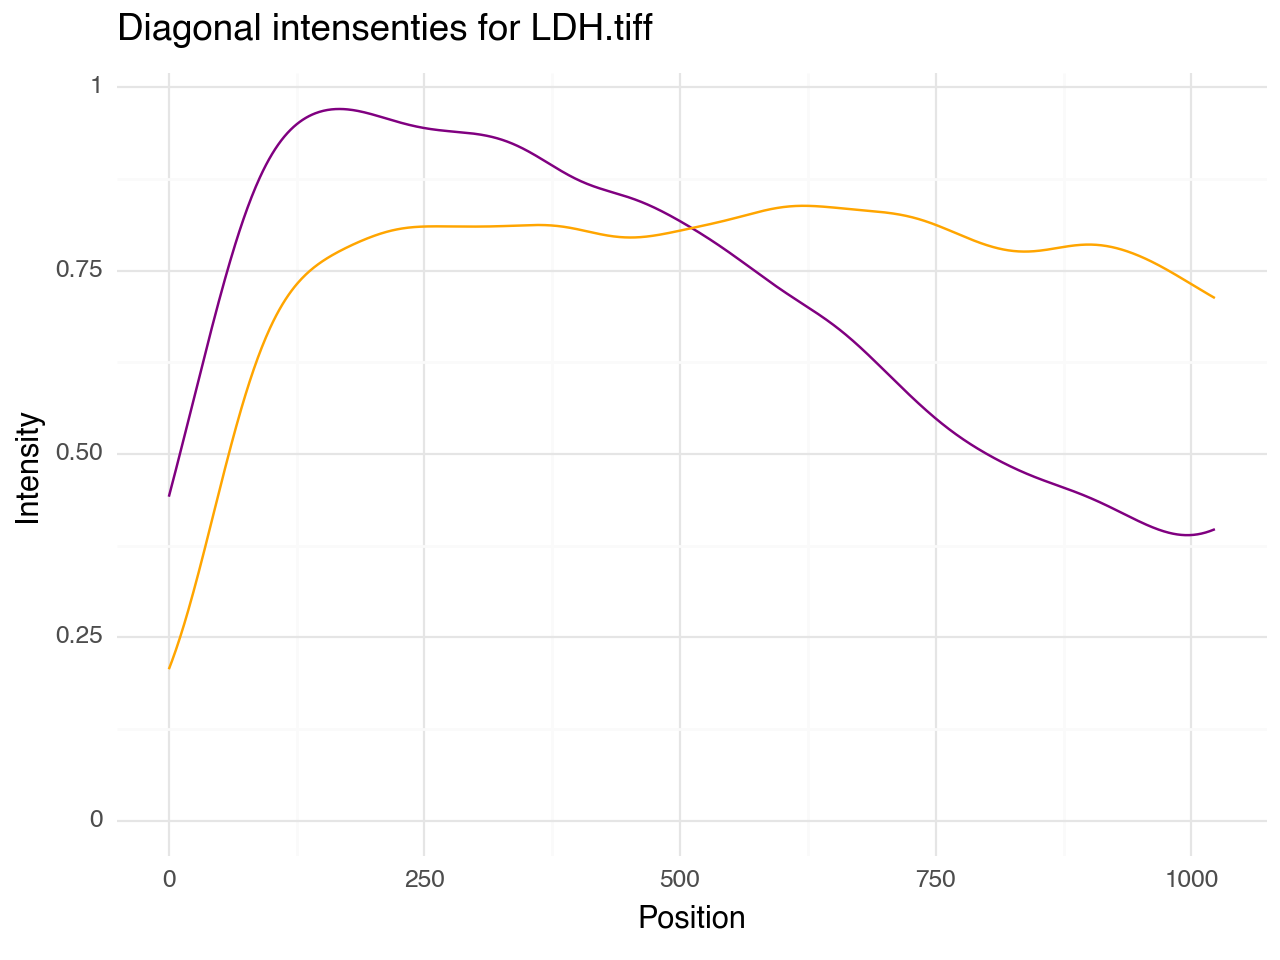


MSH6_nuc_include.tiff


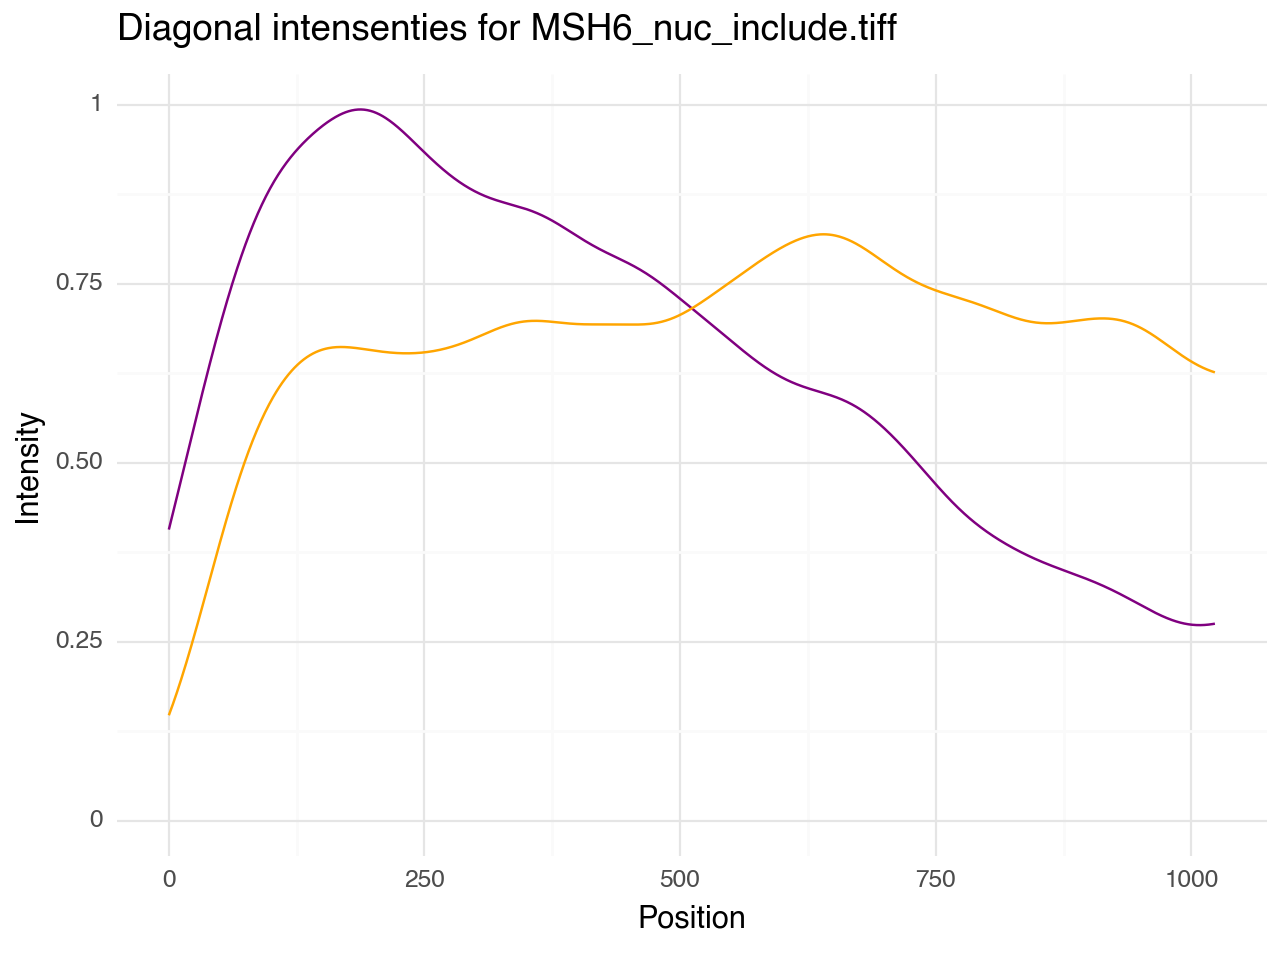


MSH6.tiff


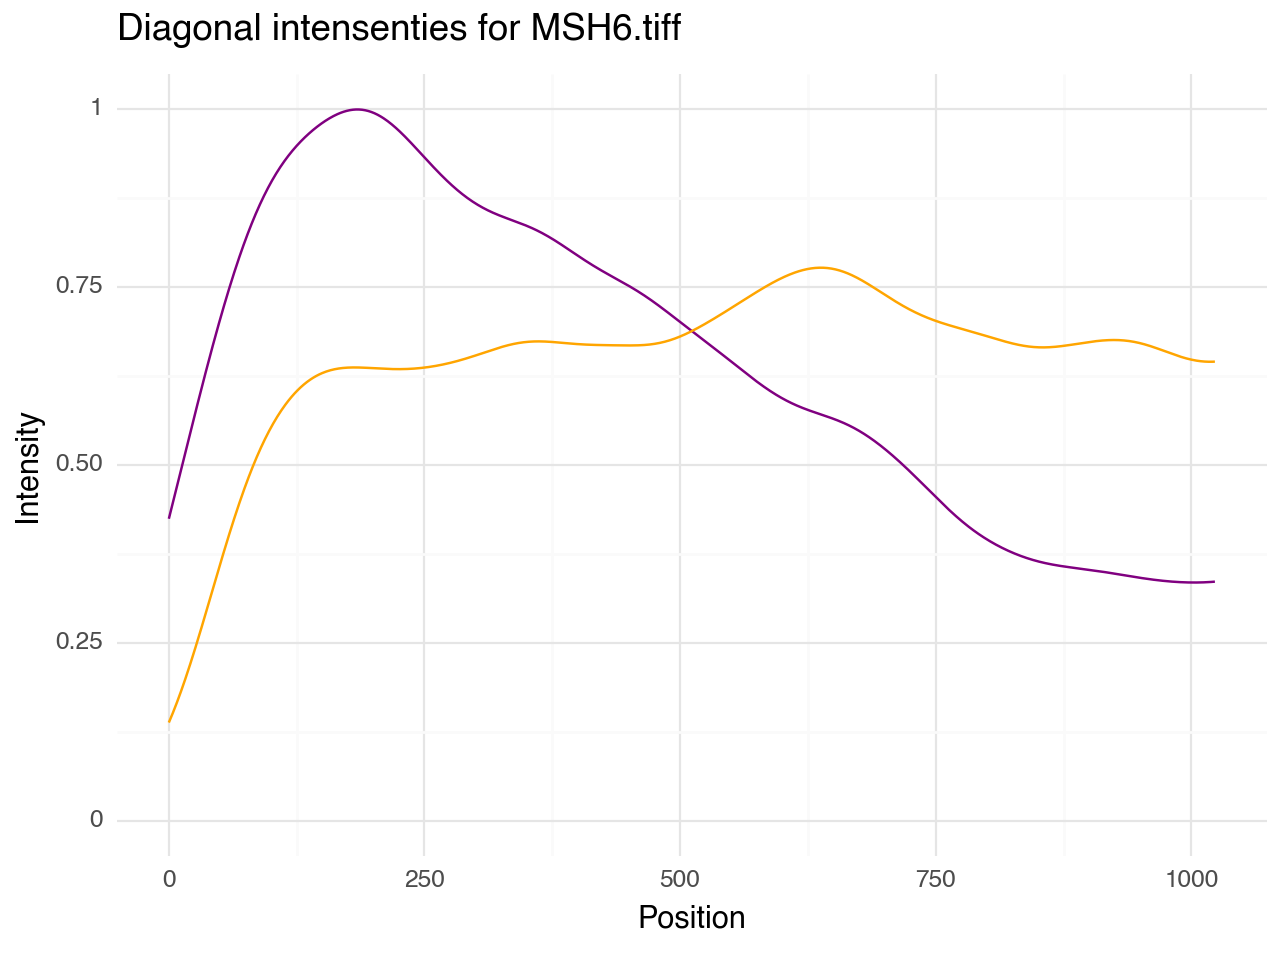


PDL1.tiff


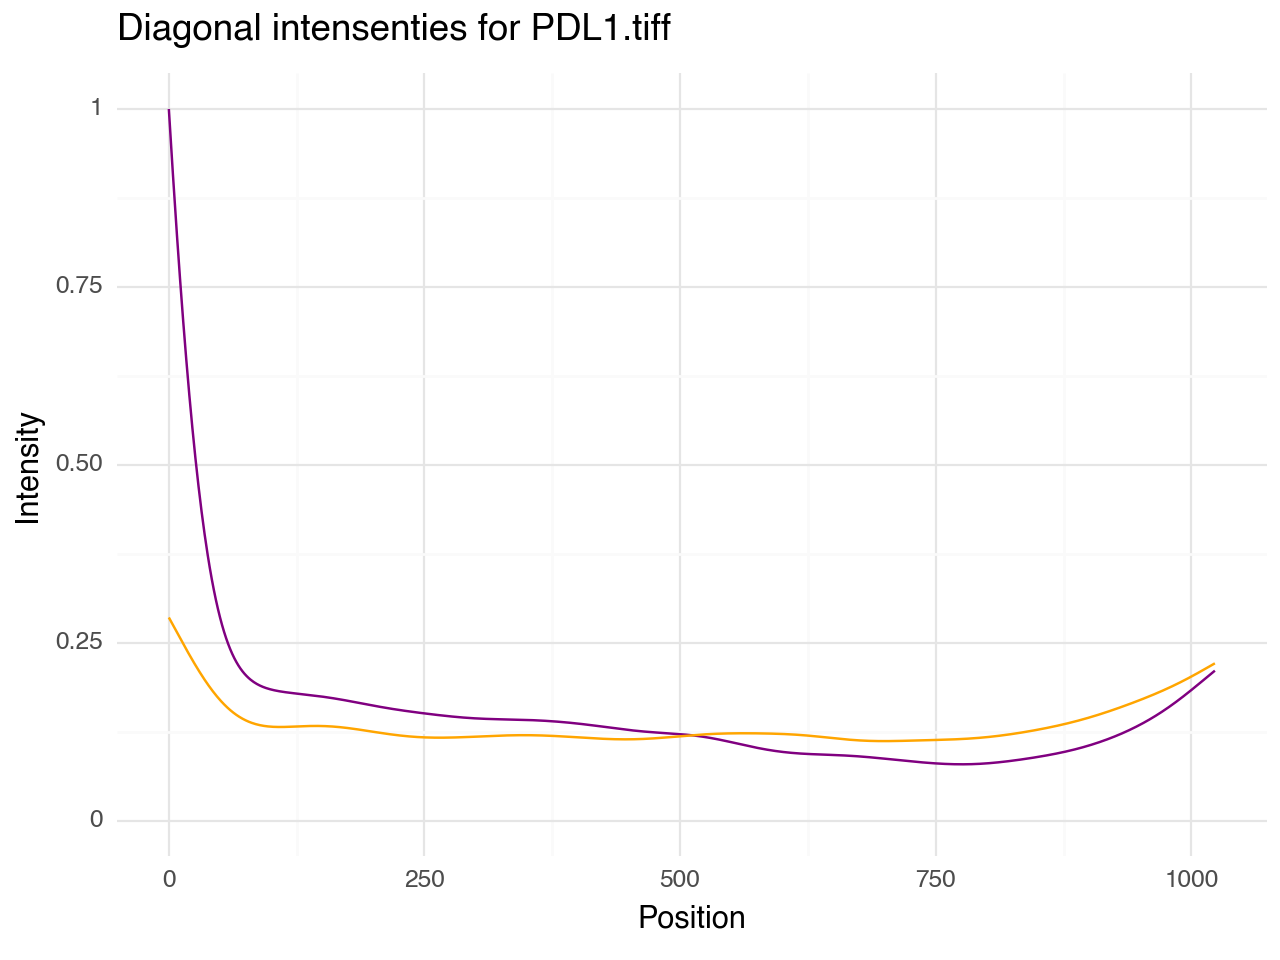


PanCK.tiff


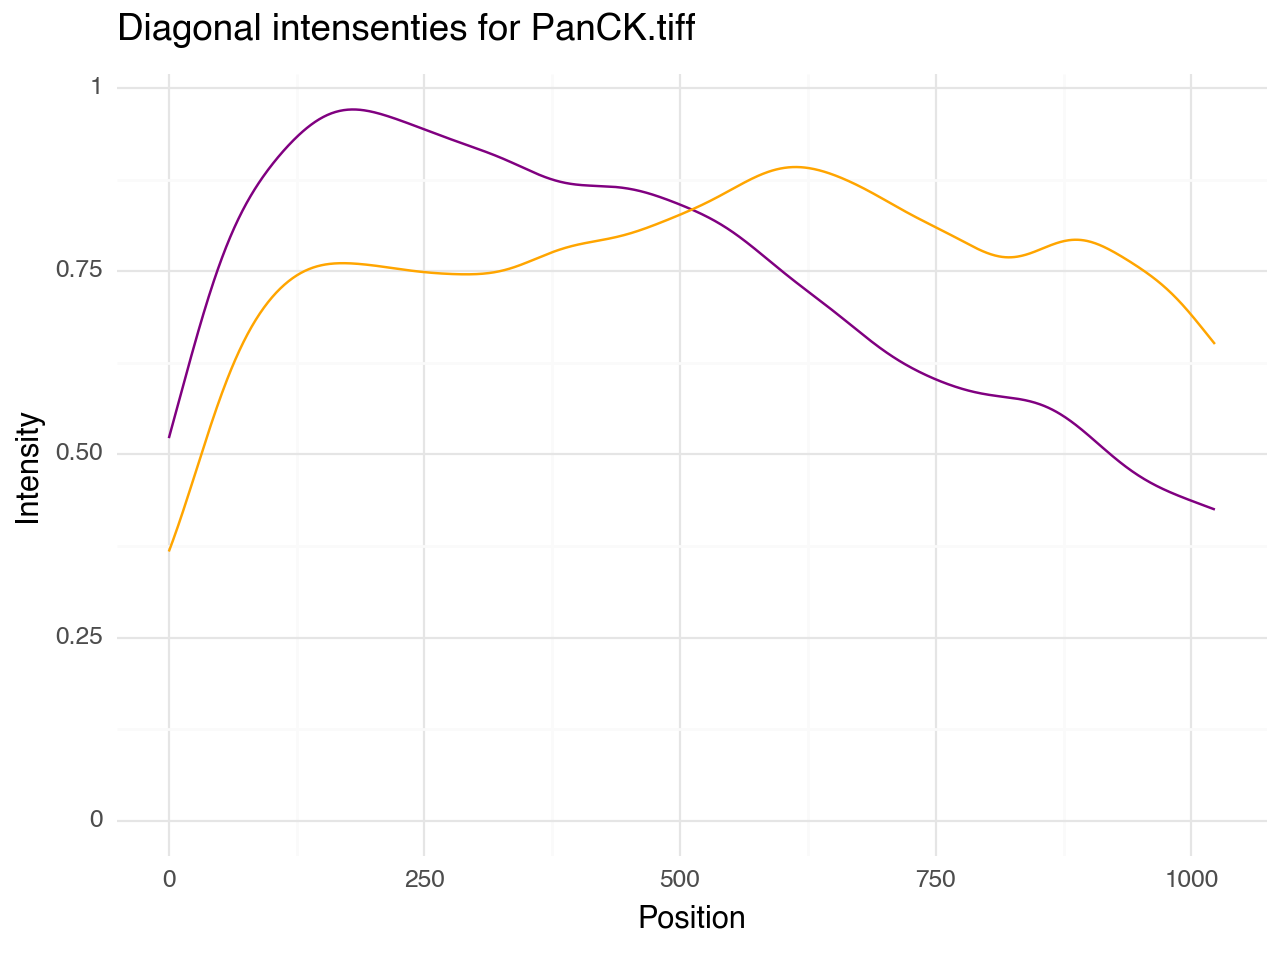


CS.tiff


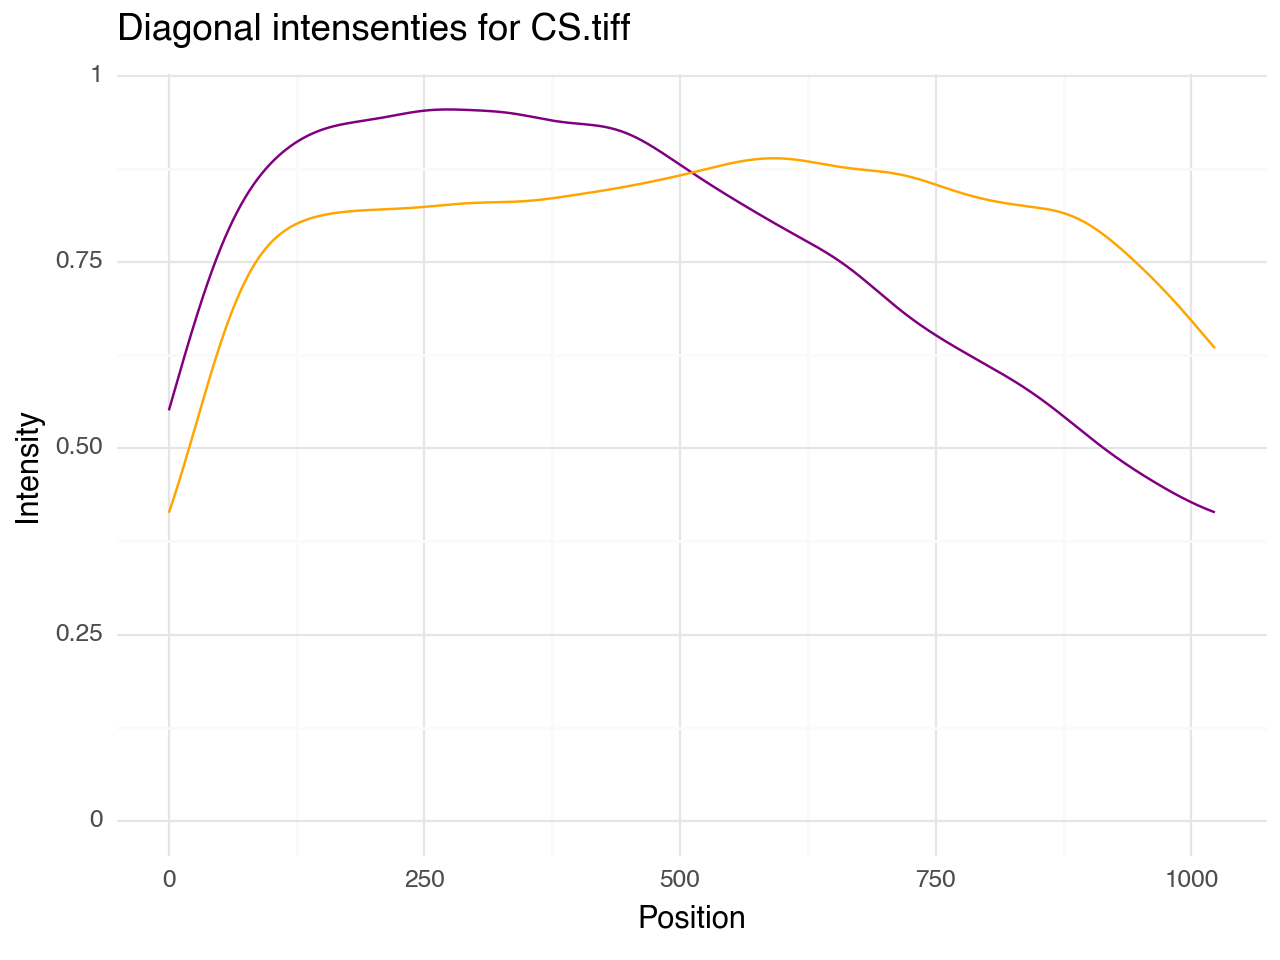


CytC.tiff


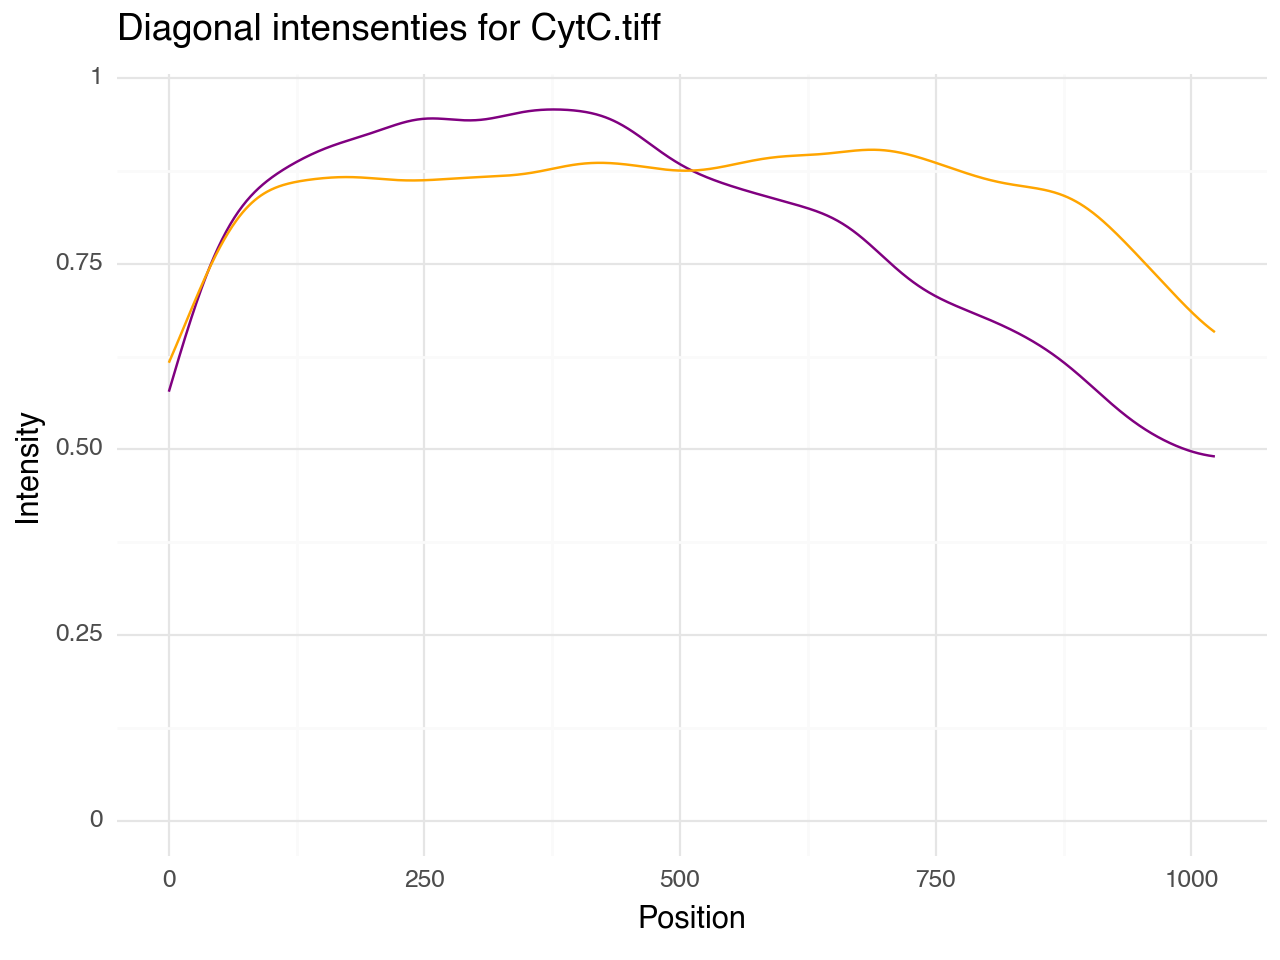


FoxP3.tiff


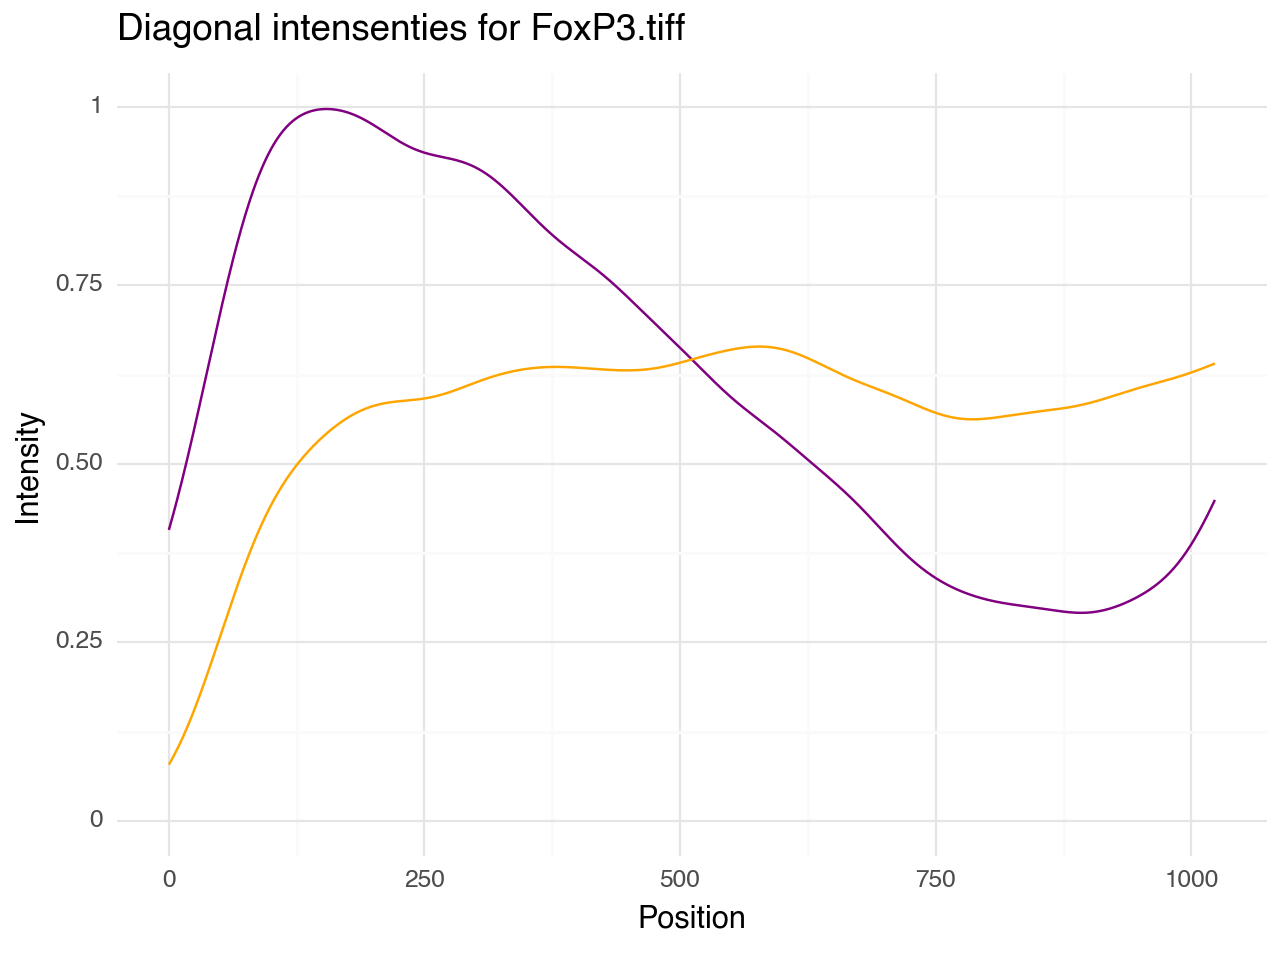

In [30]:
for img_path in chans:
    print(img_path, flush = True)
    all_imgs = [imread(f"{base_dir}/{fov}/{img_path}") 
                for fov in fovs]
    all_imgs = [img for img in all_imgs if img.shape == (1024,1024)]
    img = np.mean(np.stack(all_imgs), axis = 0)
    img /= np.max(img)
    img_blur = gaussian(img, sigma = sigma)
    img_blur /= np.max(img_blur)

    # Intensities along the diagonals
    isize = img_blur.shape[1]
    diag1 = pd.DataFrame([(i,img_blur[i,i]) for i in range(isize)], 
                         columns = ["Position", "Intensity"])
    diag2 = pd.DataFrame([(i,img_blur[i,isize-(i+1)]) for i in range(isize)], 
                         columns = ["Position", "Intensity"])

    if disp_blurred:
        img_blur = np.round(255 * img_blur).astype(np.uint8)
        display(Image.fromarray(img_blur))
        if save_results:
            imsave(f"{outdir}/{img_path}.png", img_blur)

    gp = ggplot(diag1, aes(x = "Position", y = "Intensity")) + geom_line(color = "purple") +\
        geom_line(data = diag2, color = "orange") + theme_minimal() +\
        ylim(0,max(np.max(diag1.Intensity), np.max(diag2.Intensity))) +\
        ggtitle(f"Diagonal intensenties for {img_path}")
    print(gp)
    if save_results:
        ggsave(gp, f"{outdir}/diagonal_intensities_{img_path}.png")

membrane.tiff


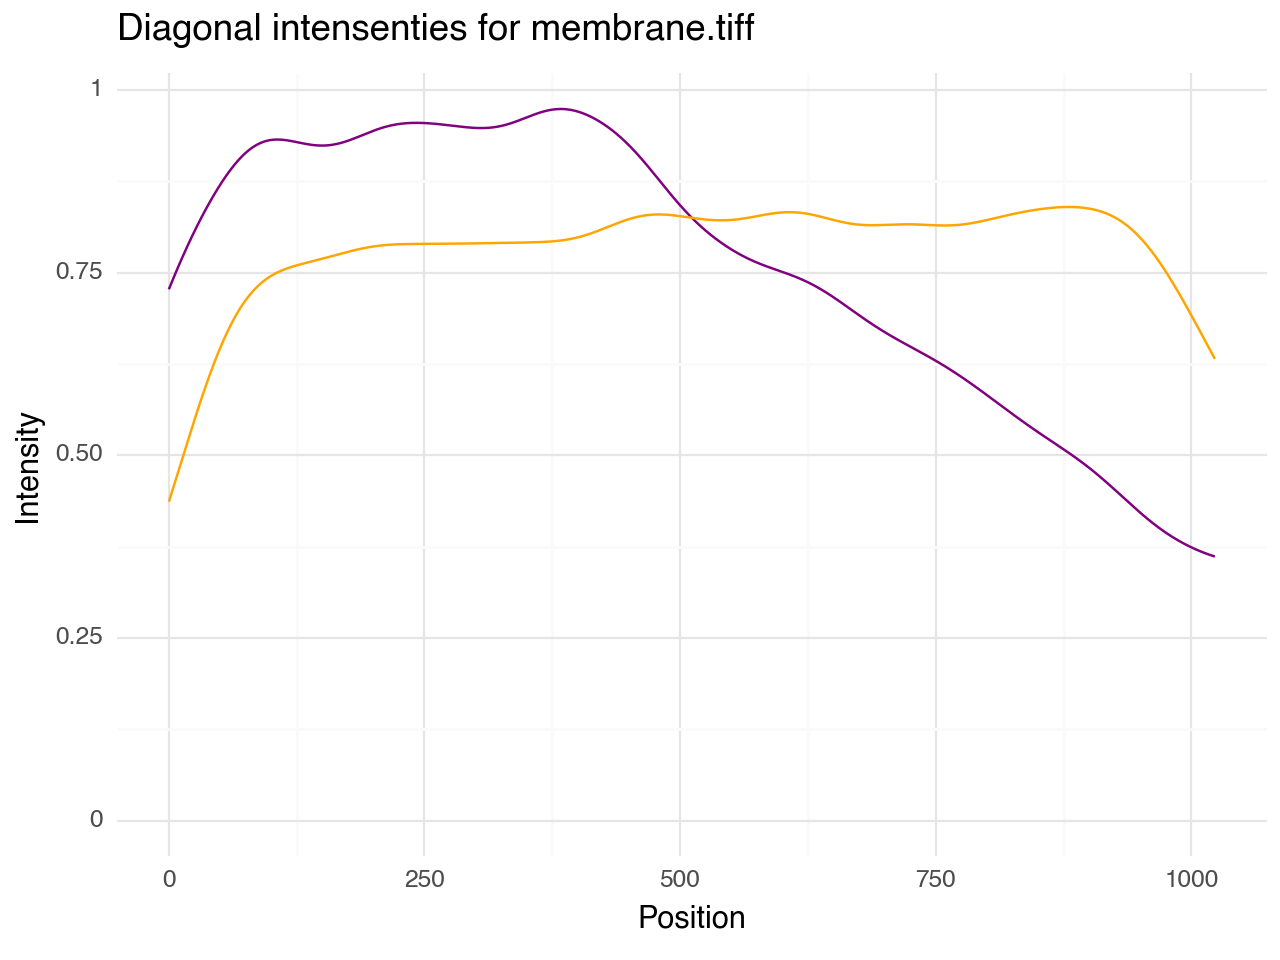


HLADRa.tiff


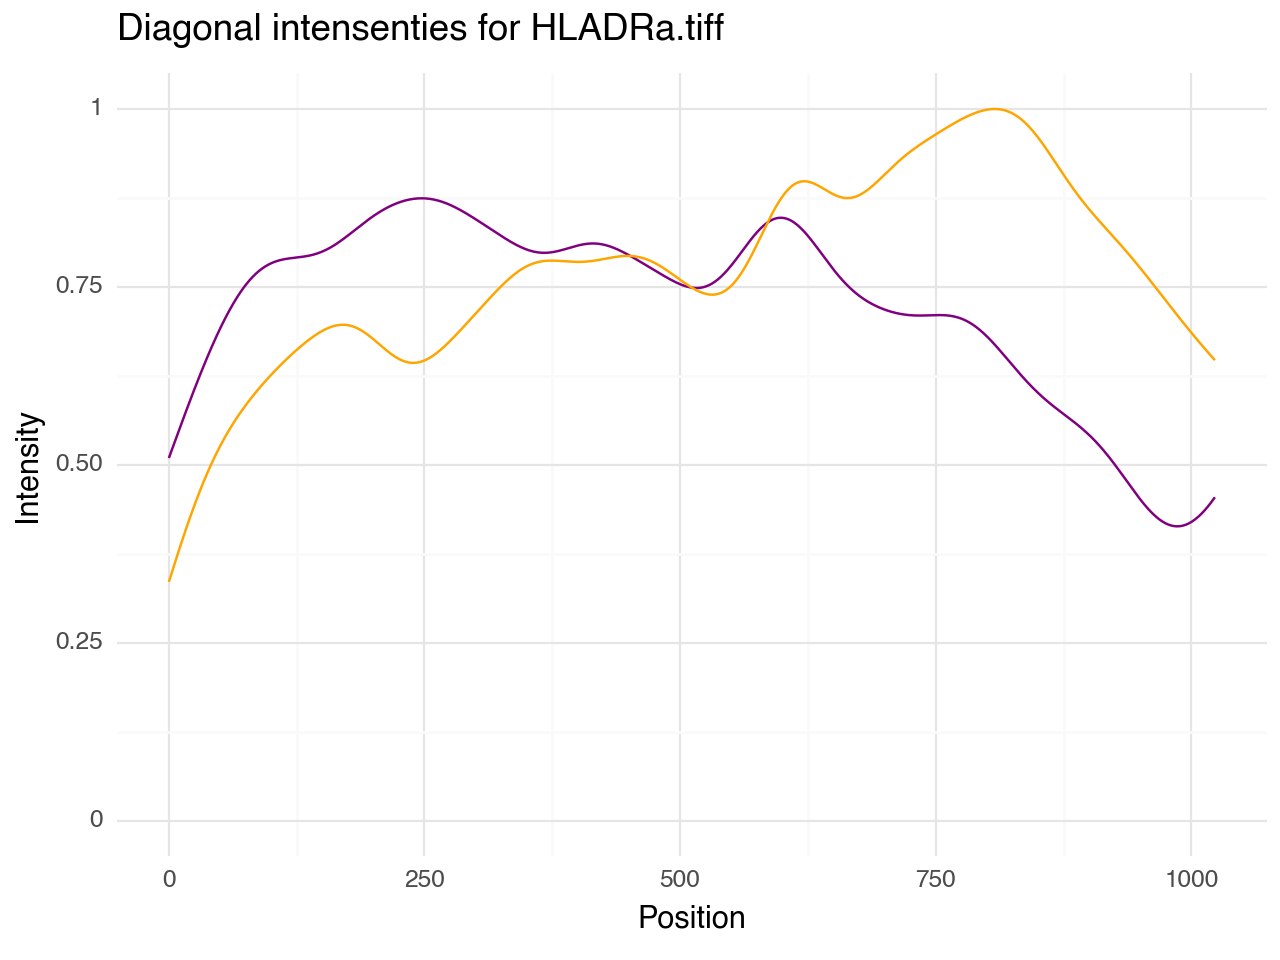


Calprotectin.tiff


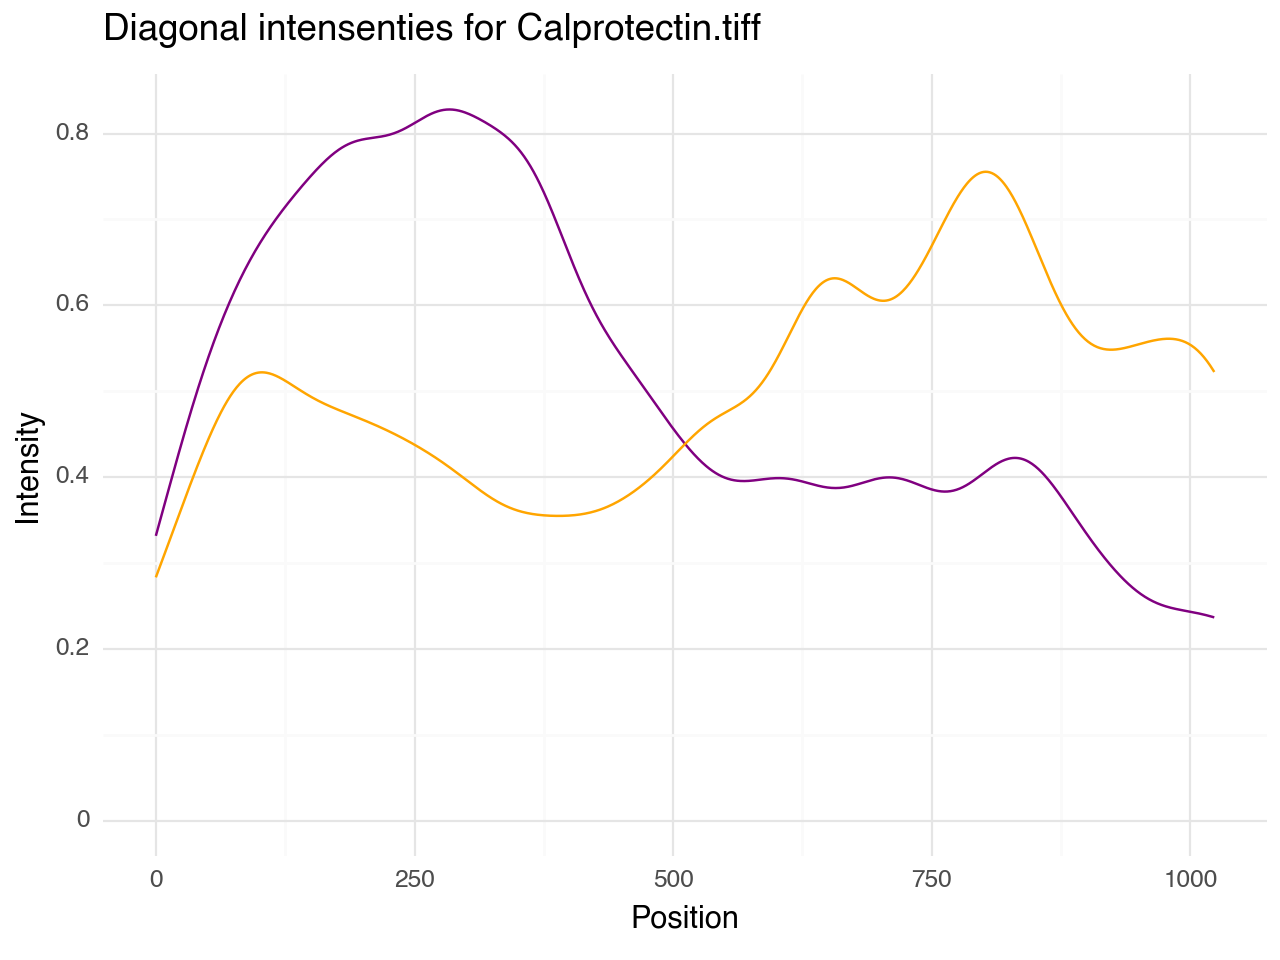


CD31.tiff


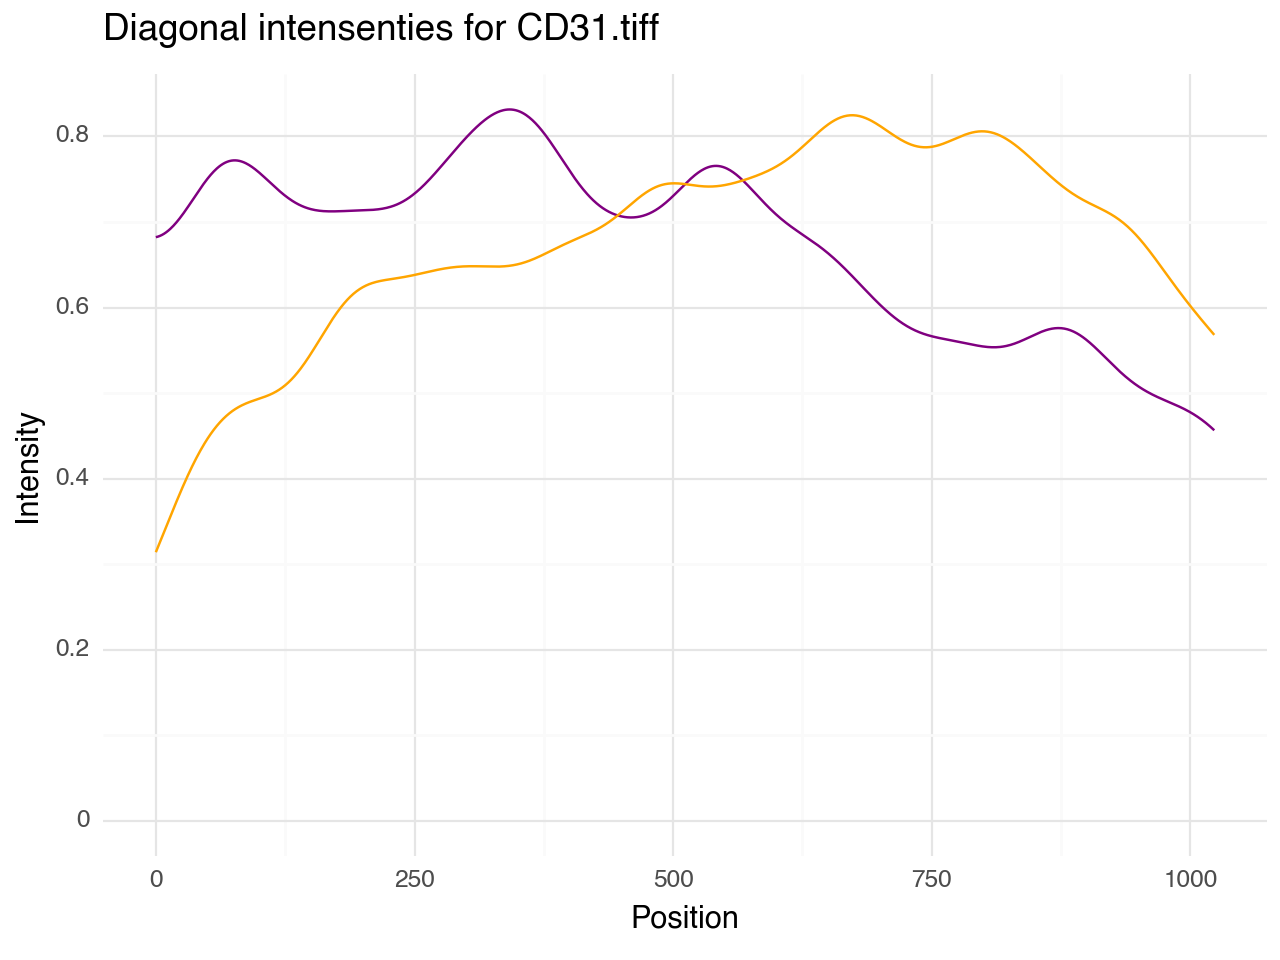


CD45.tiff


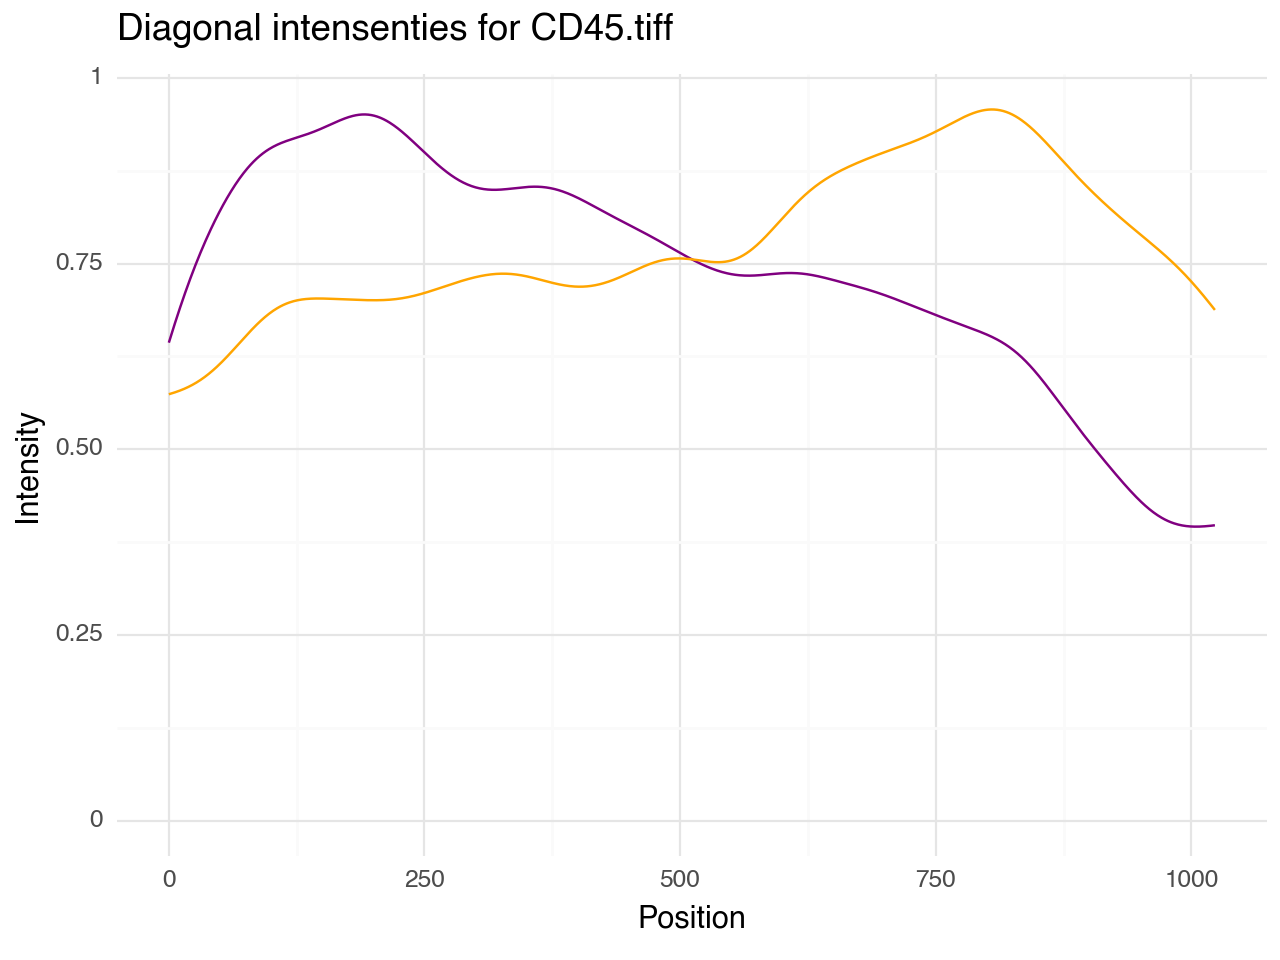


GLUT1.tiff


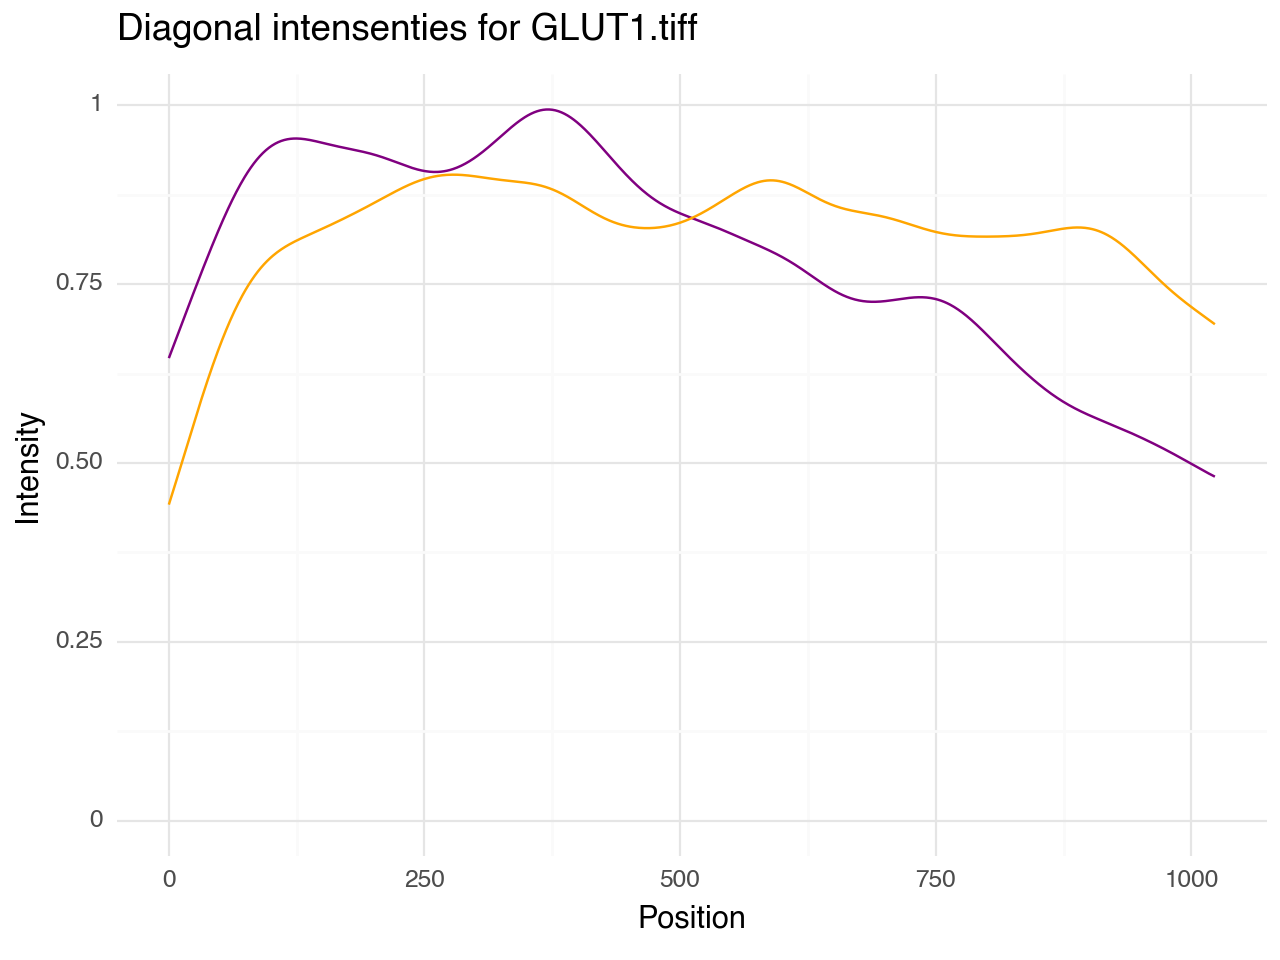


MCT1.tiff


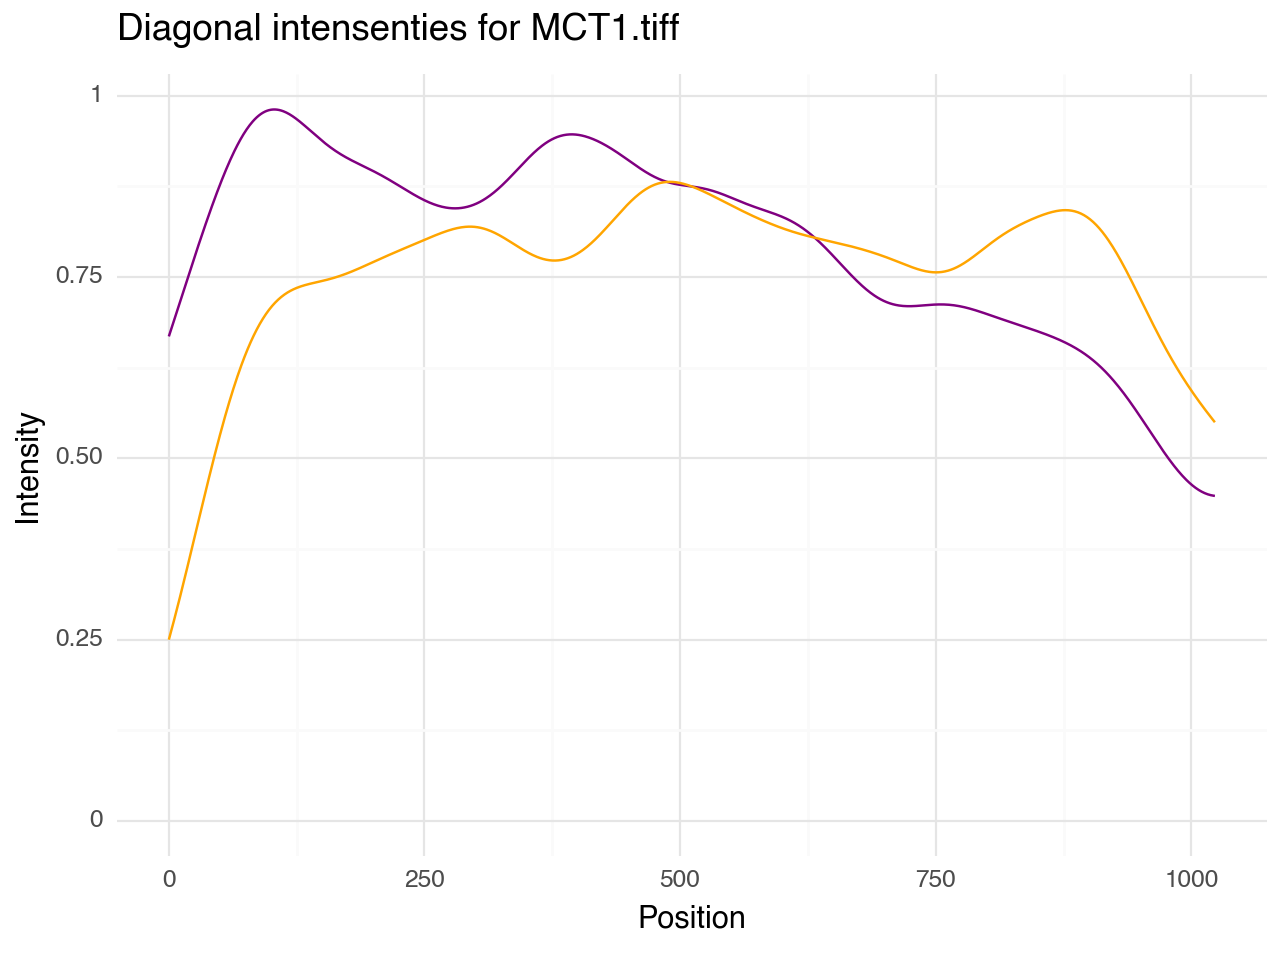


CD98.tiff


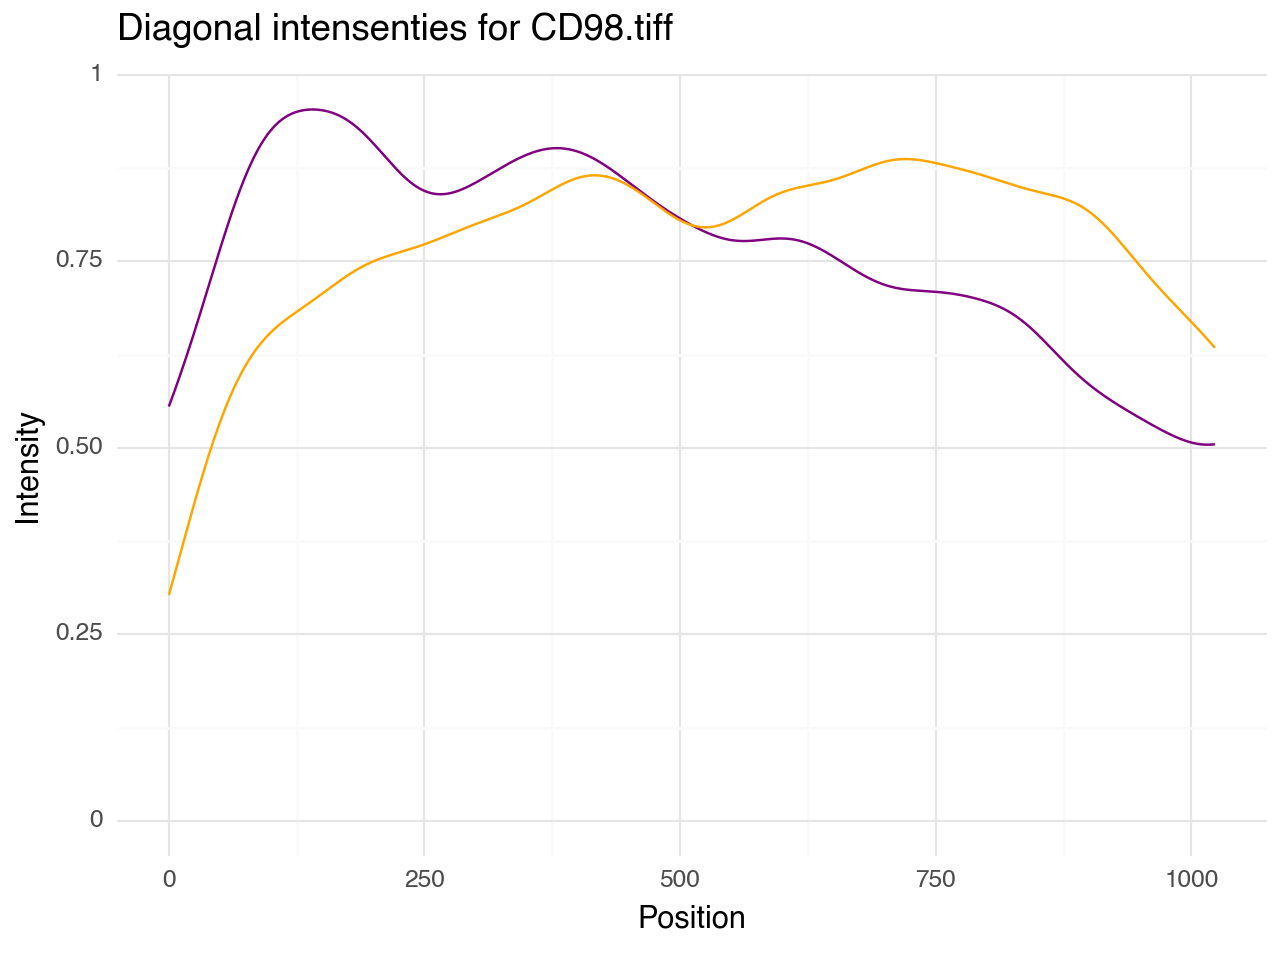


CPT1A.tiff


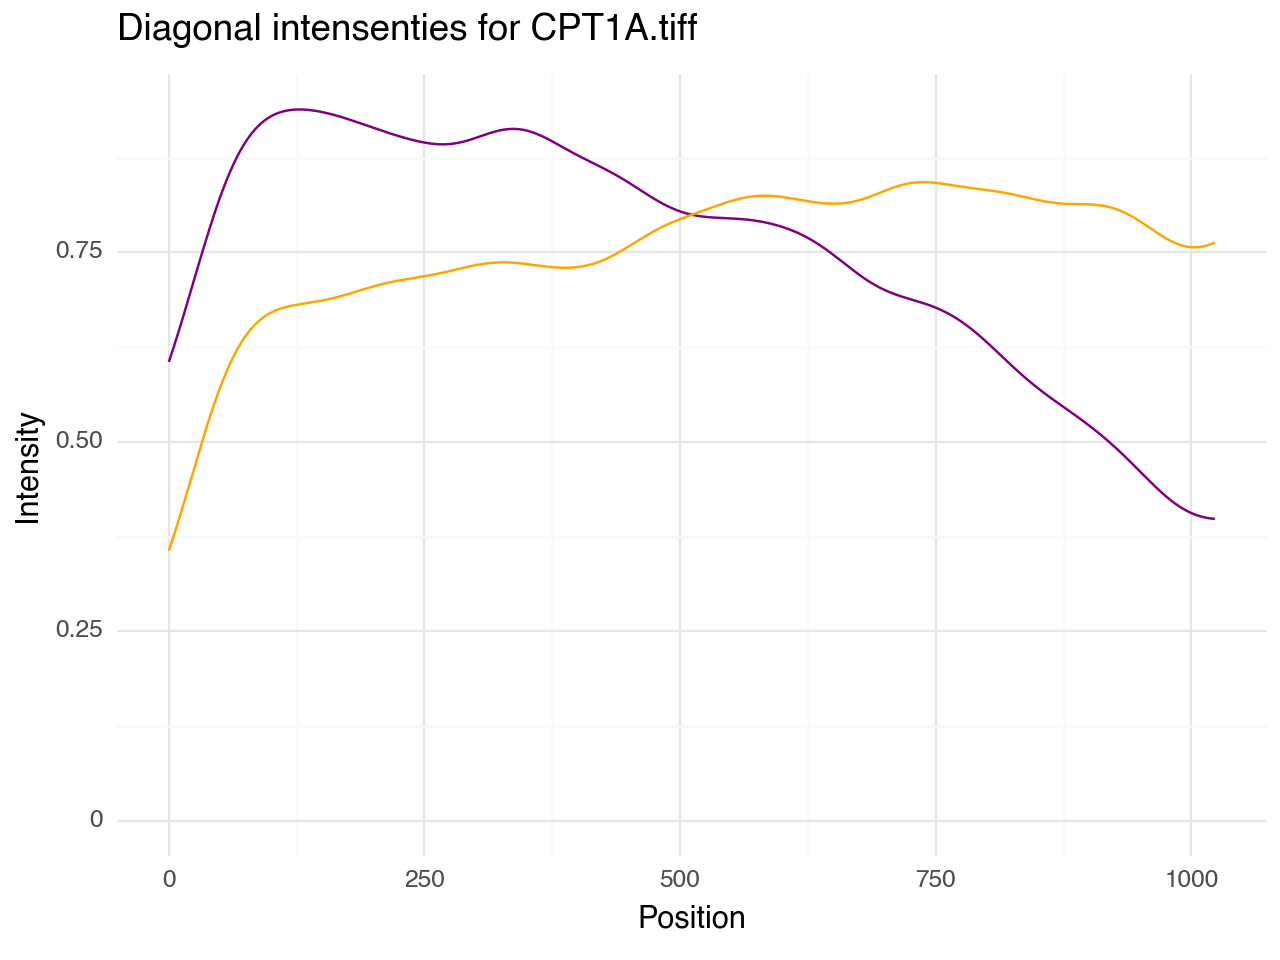


ATP5A.tiff


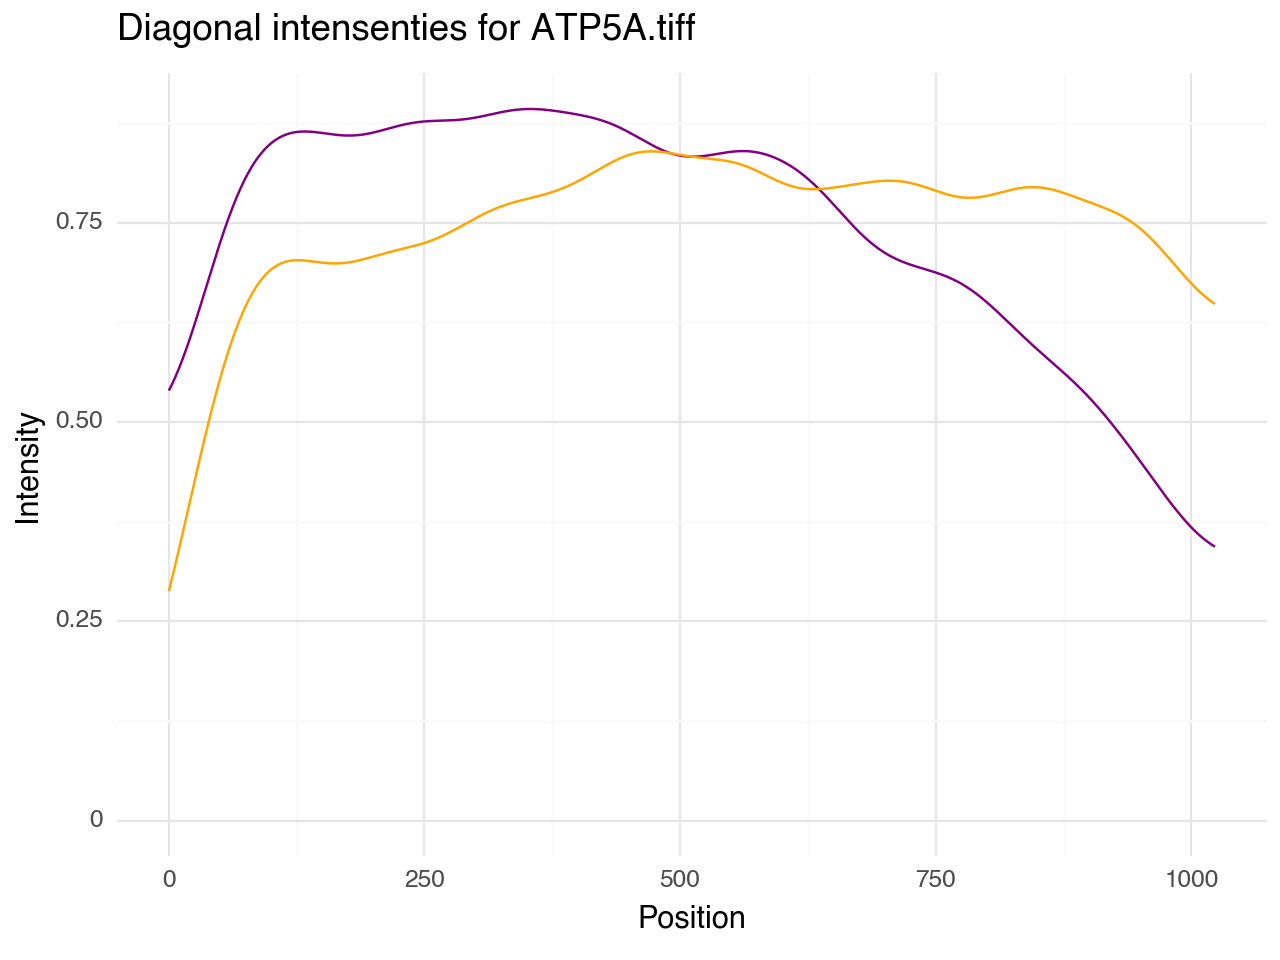


NOX2.tiff


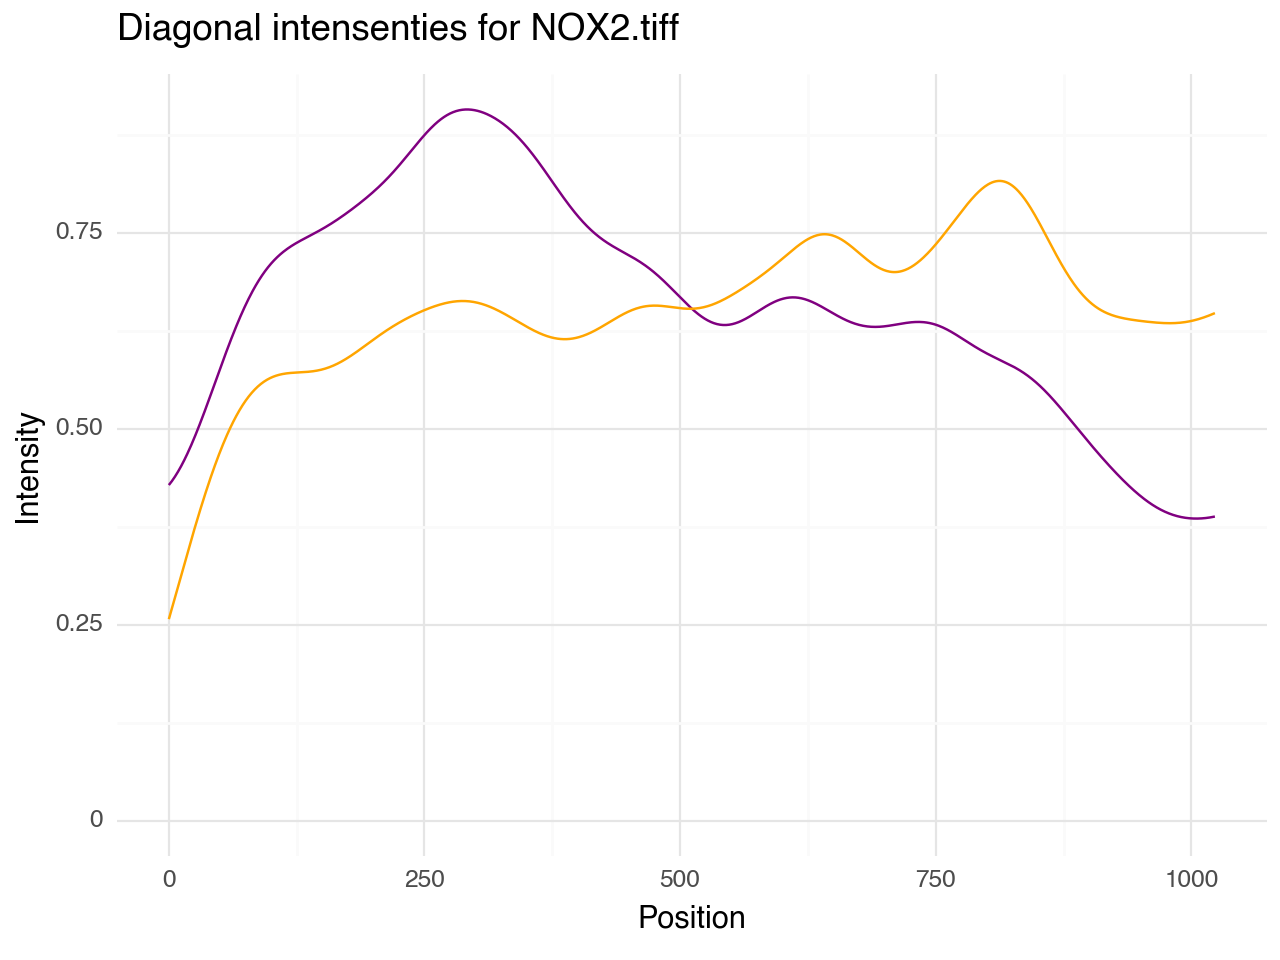


CD4.tiff


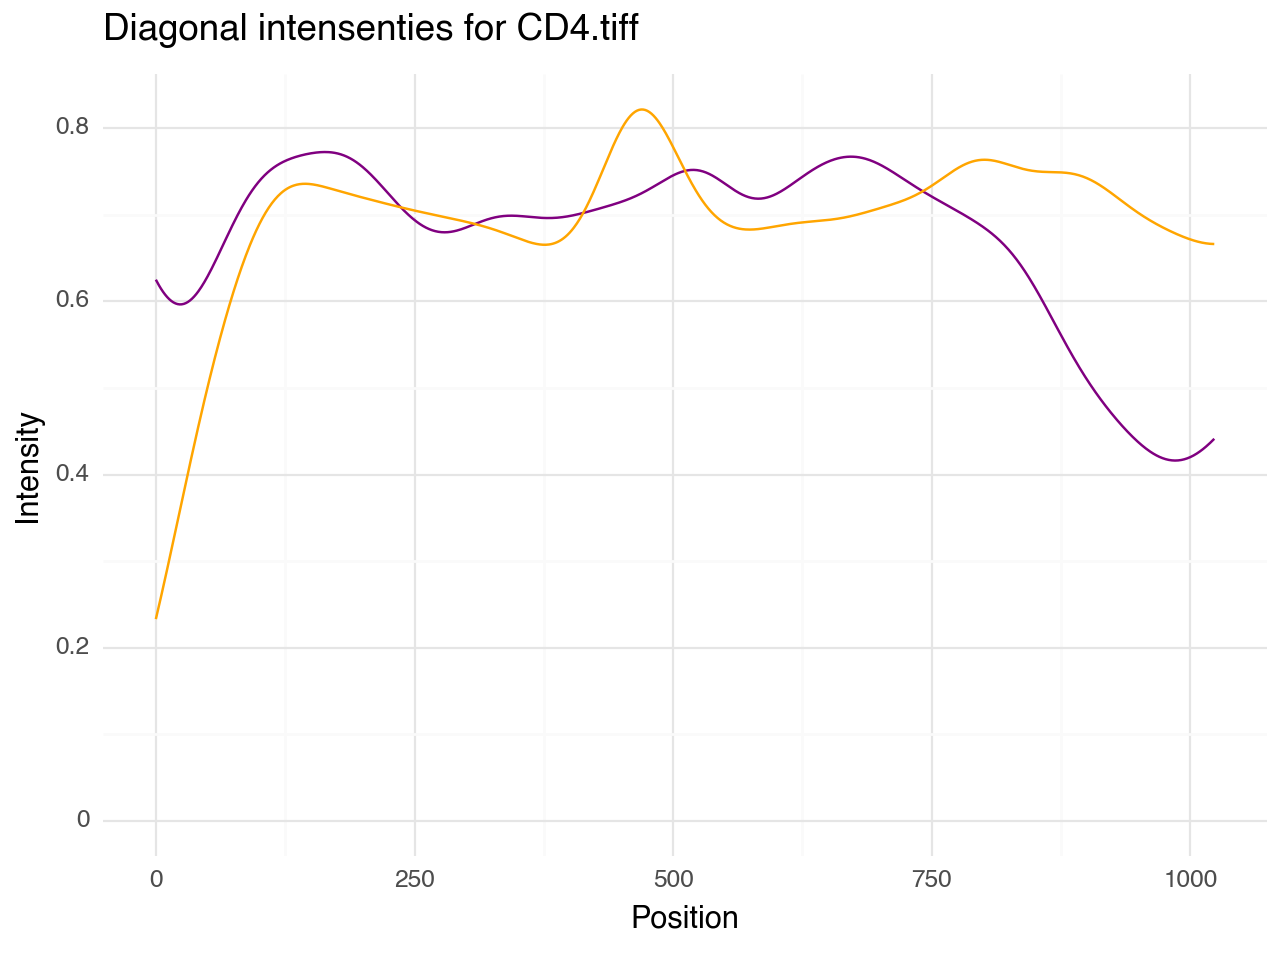


iNOS.tiff


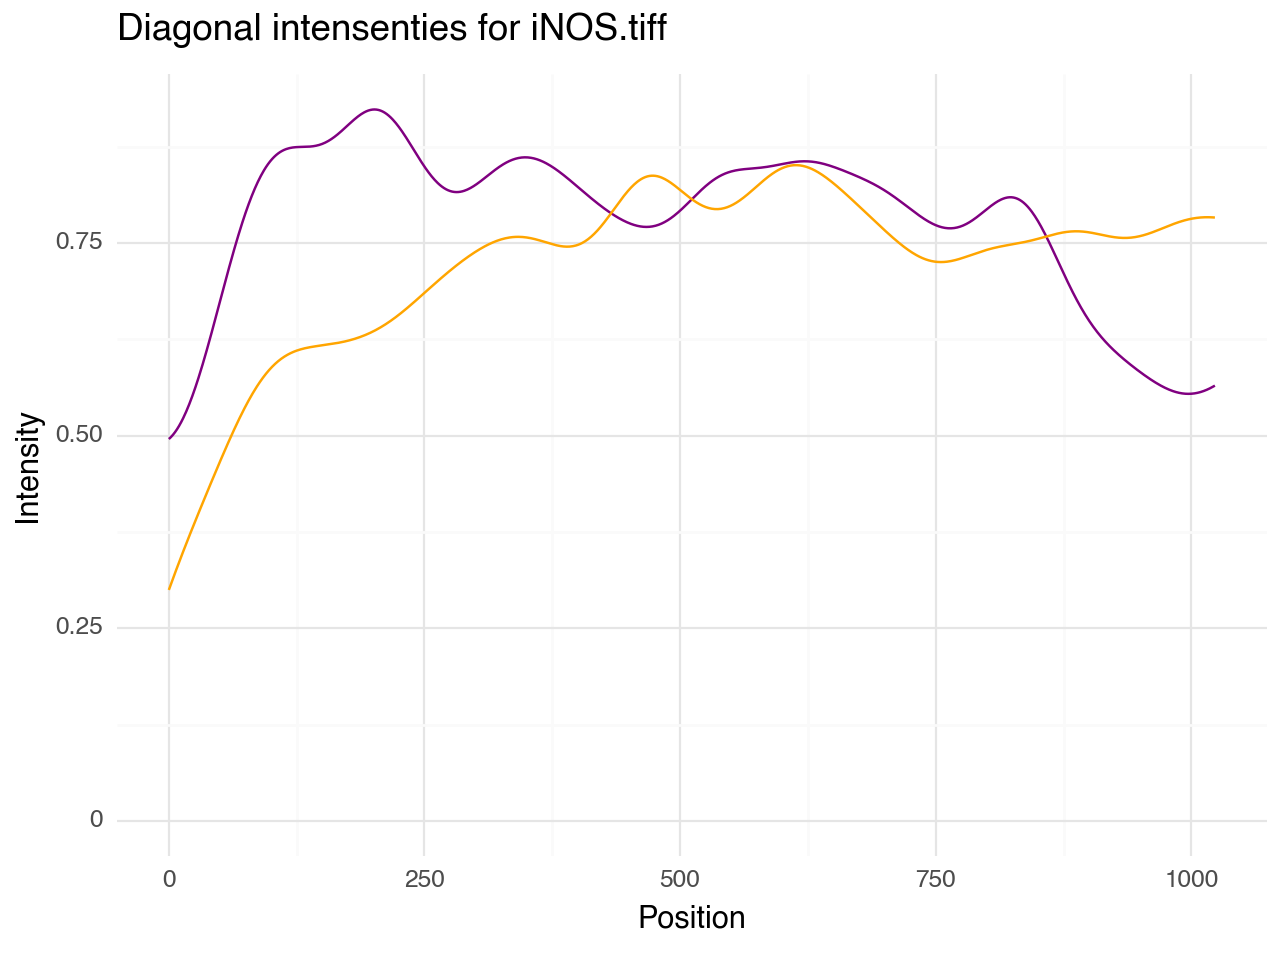


CD14.tiff


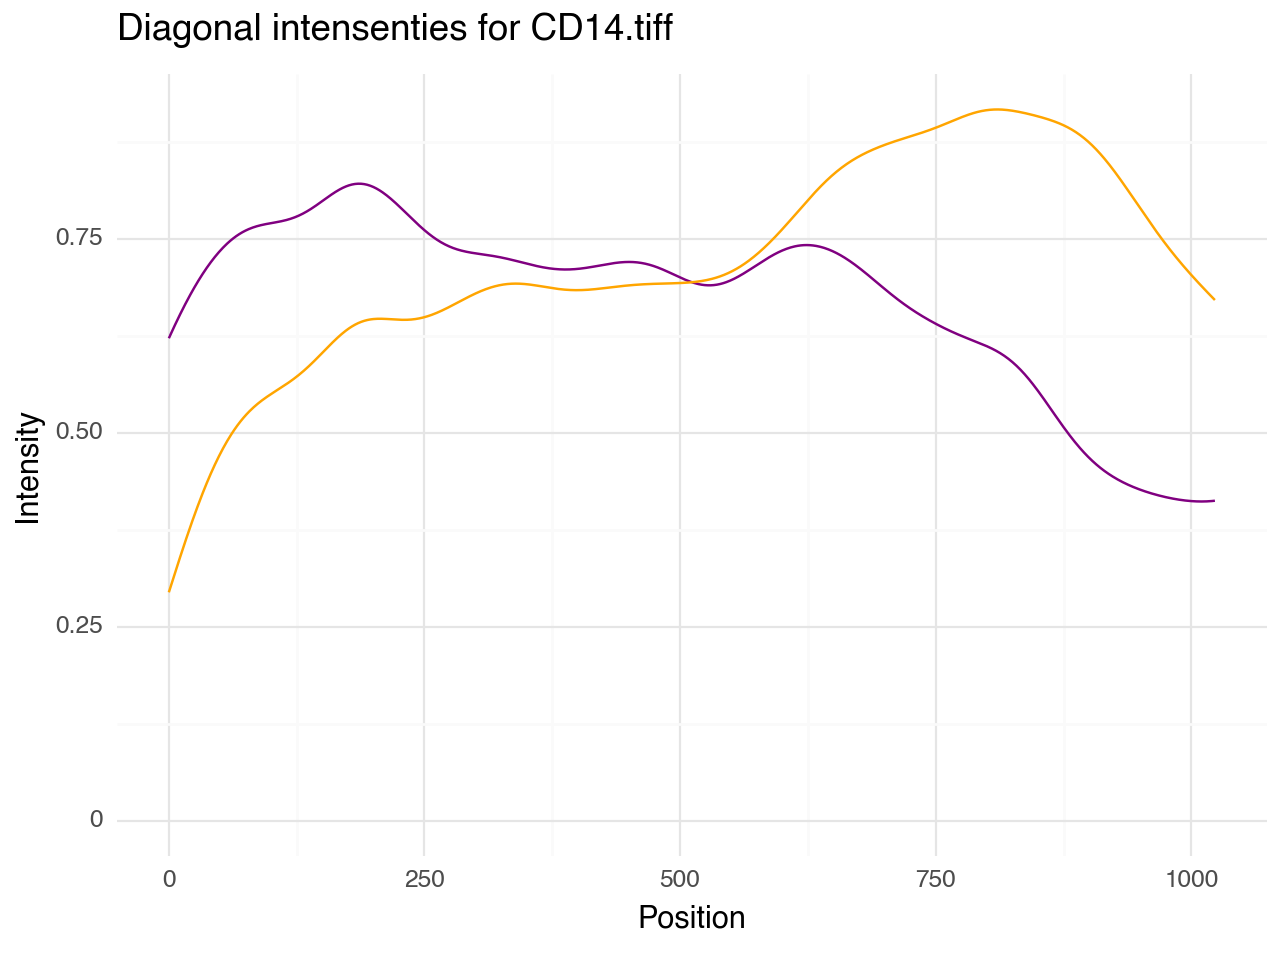


Ki67.tiff


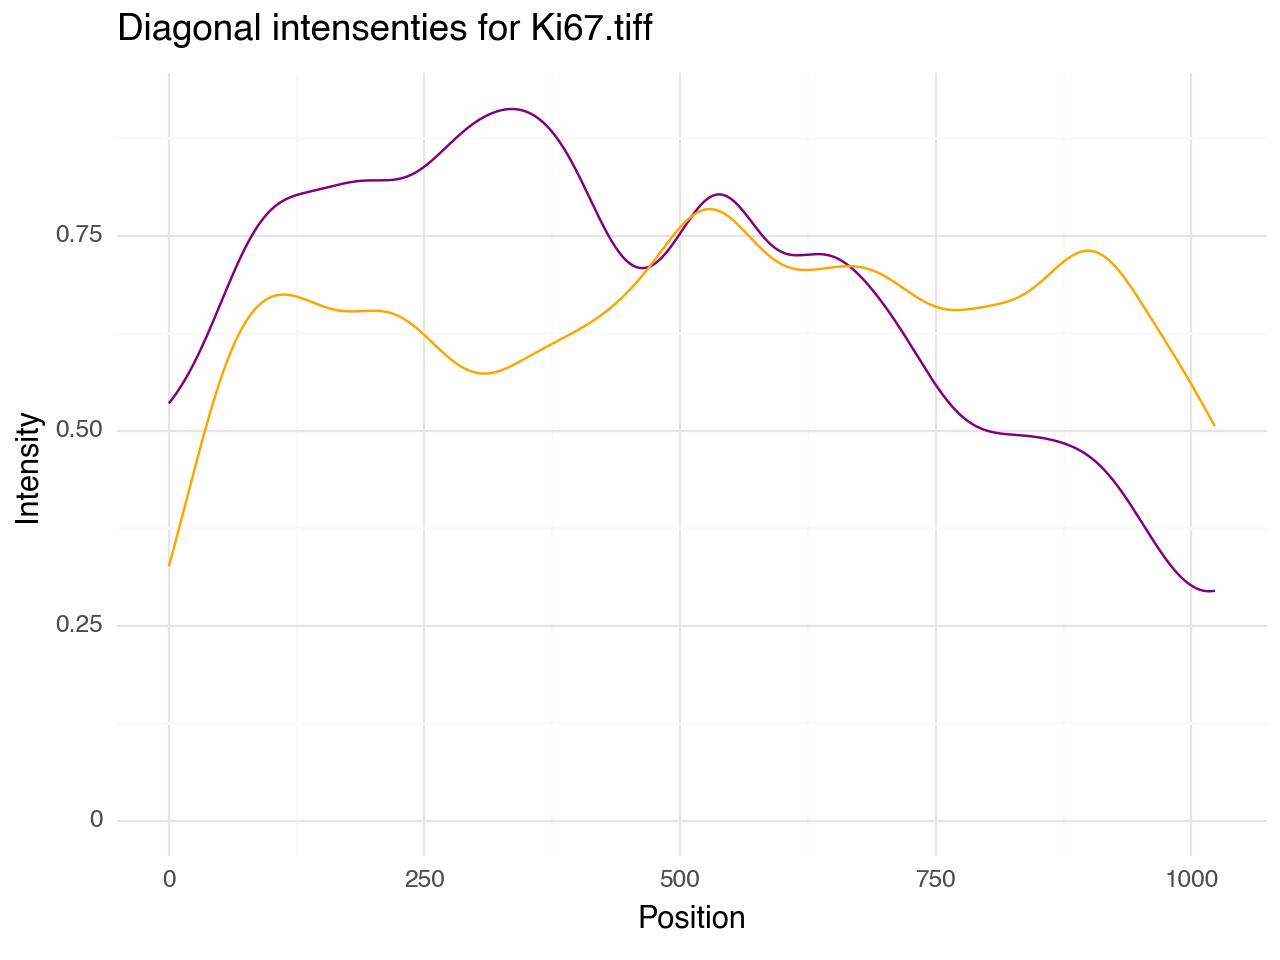


Au.tiff


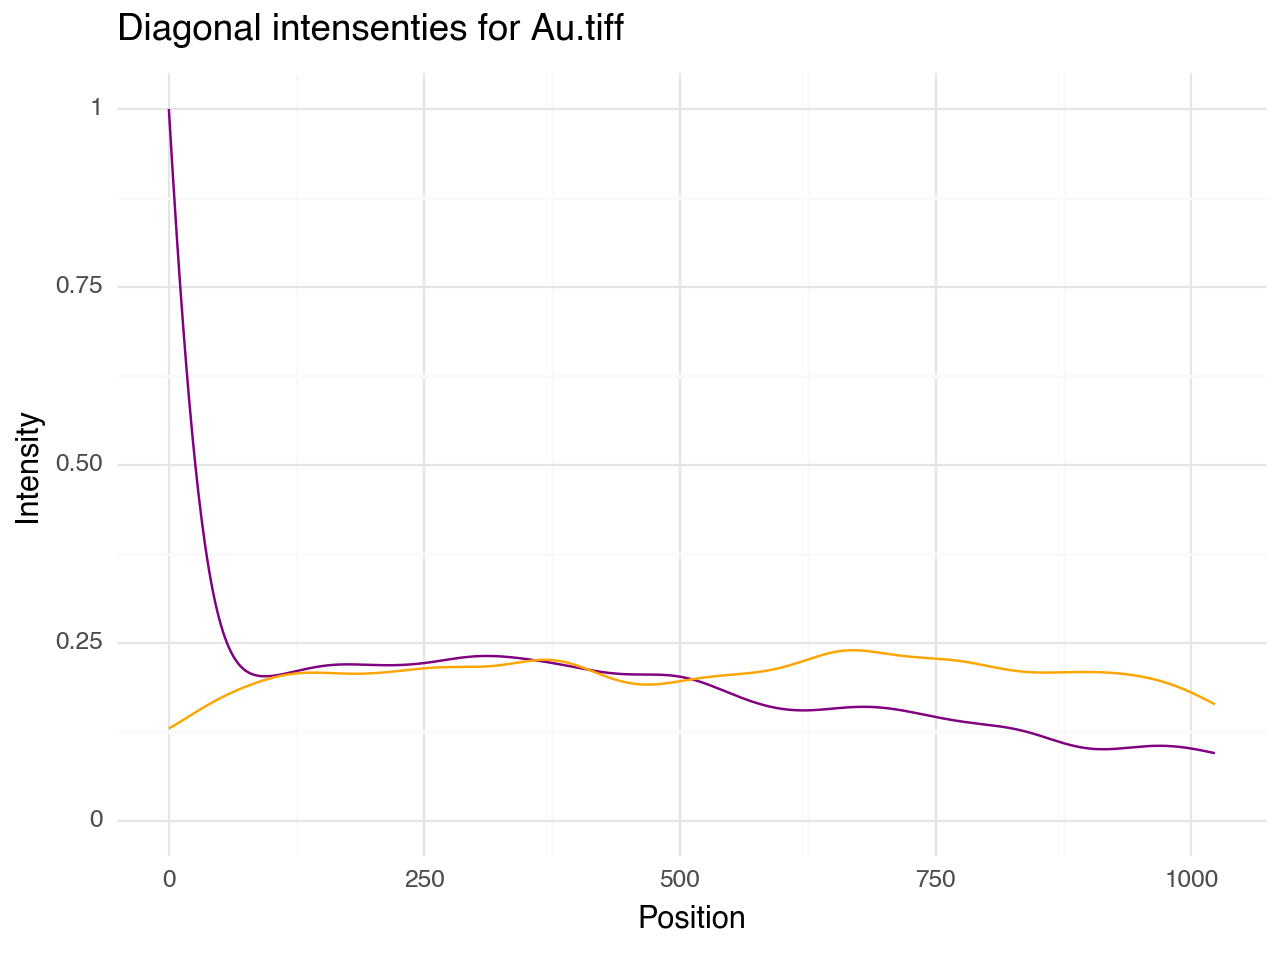


CXCR2.tiff


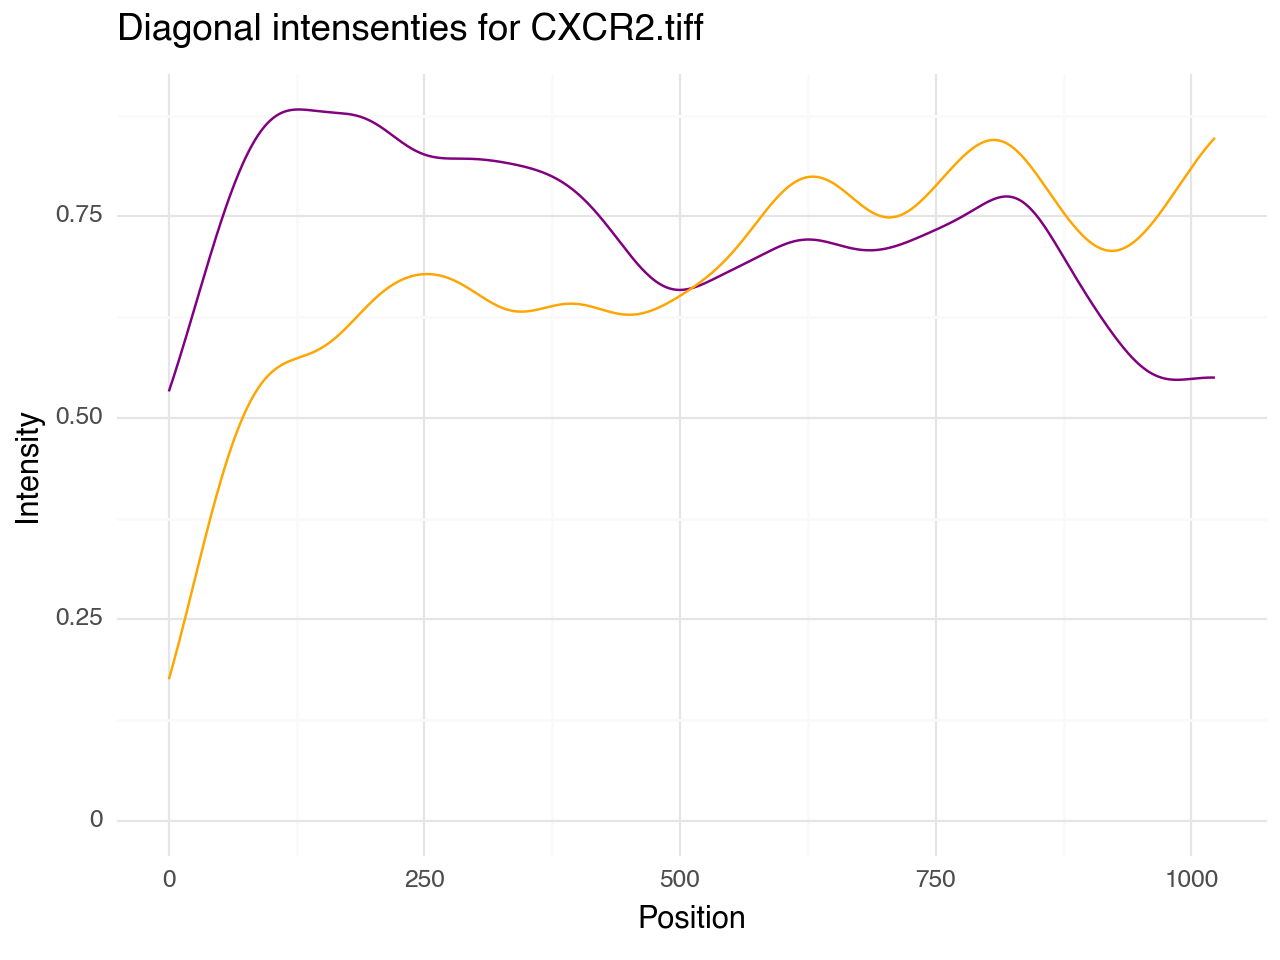


MPO.tiff


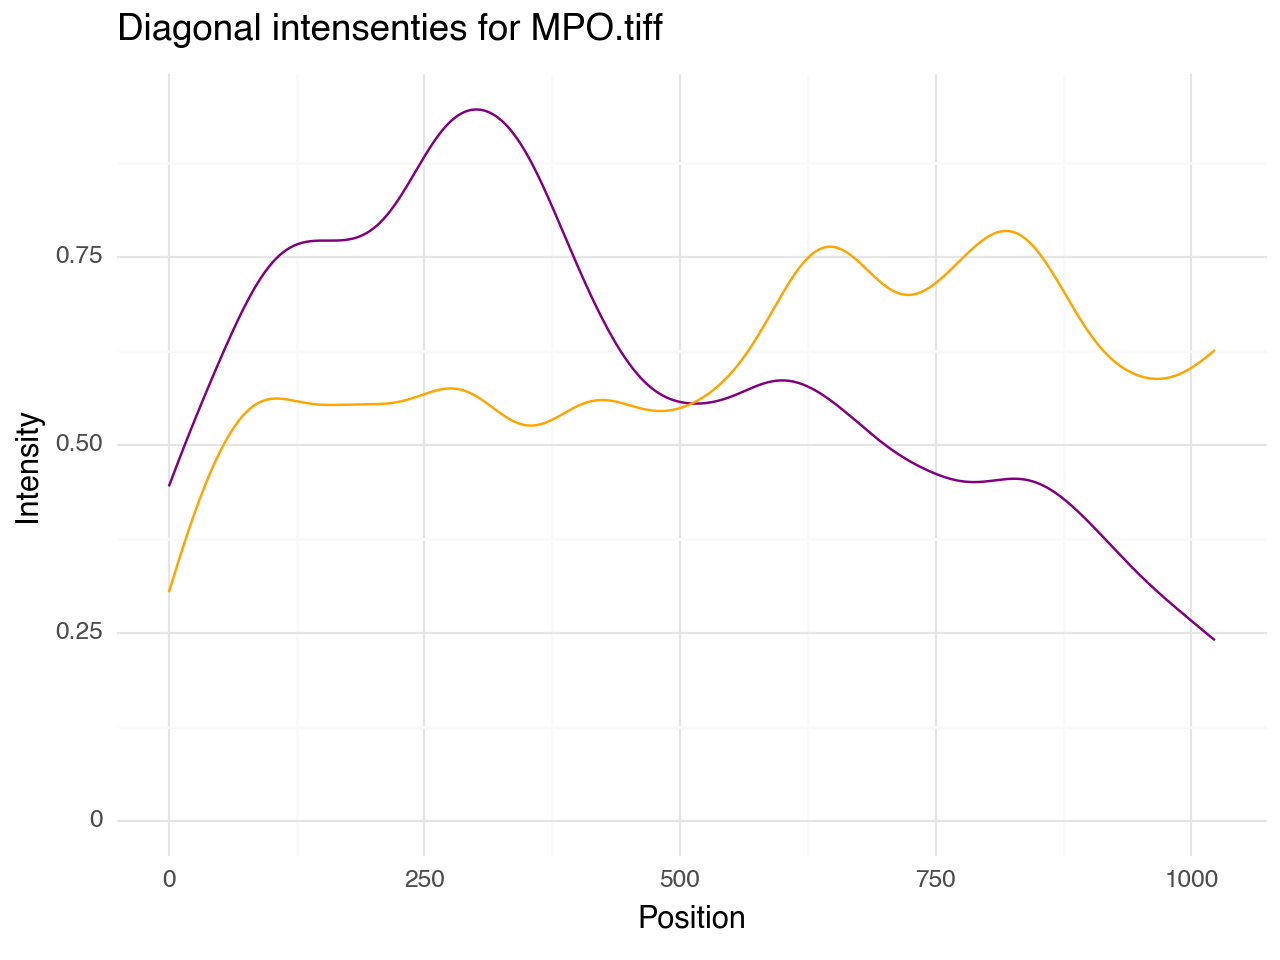


CD8.tiff


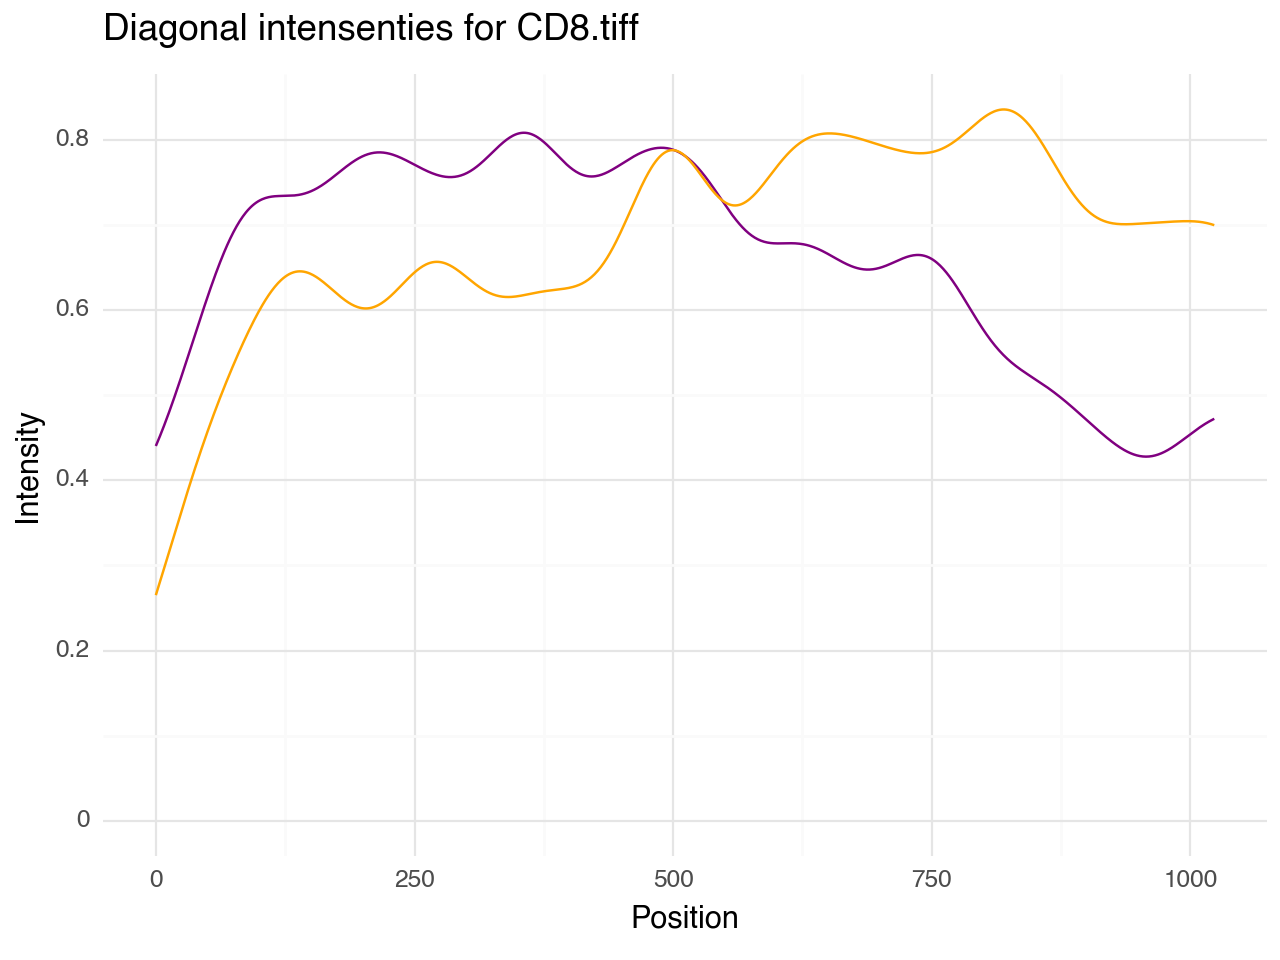


PD1.tiff


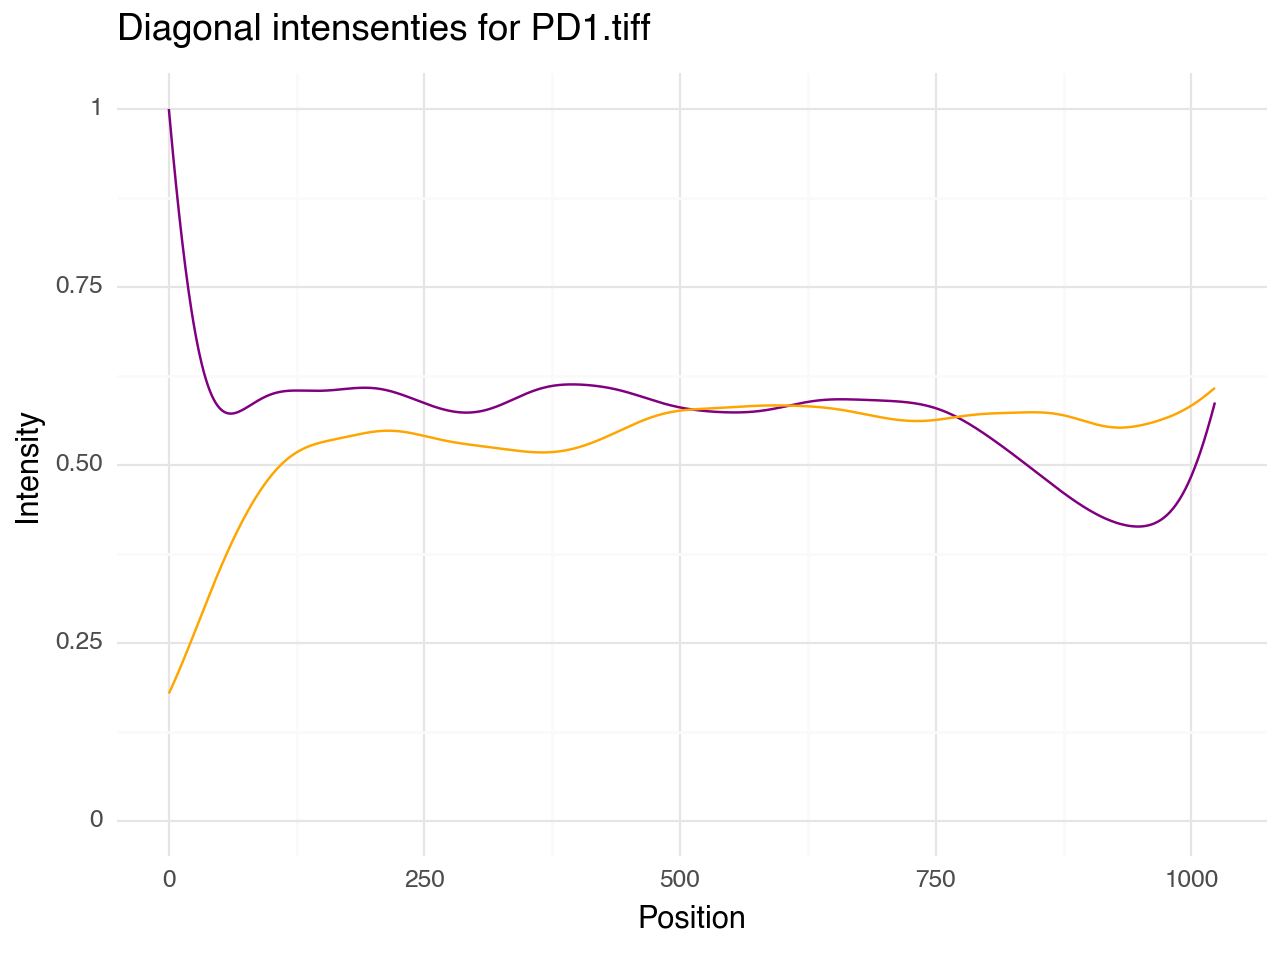


ARG1.tiff


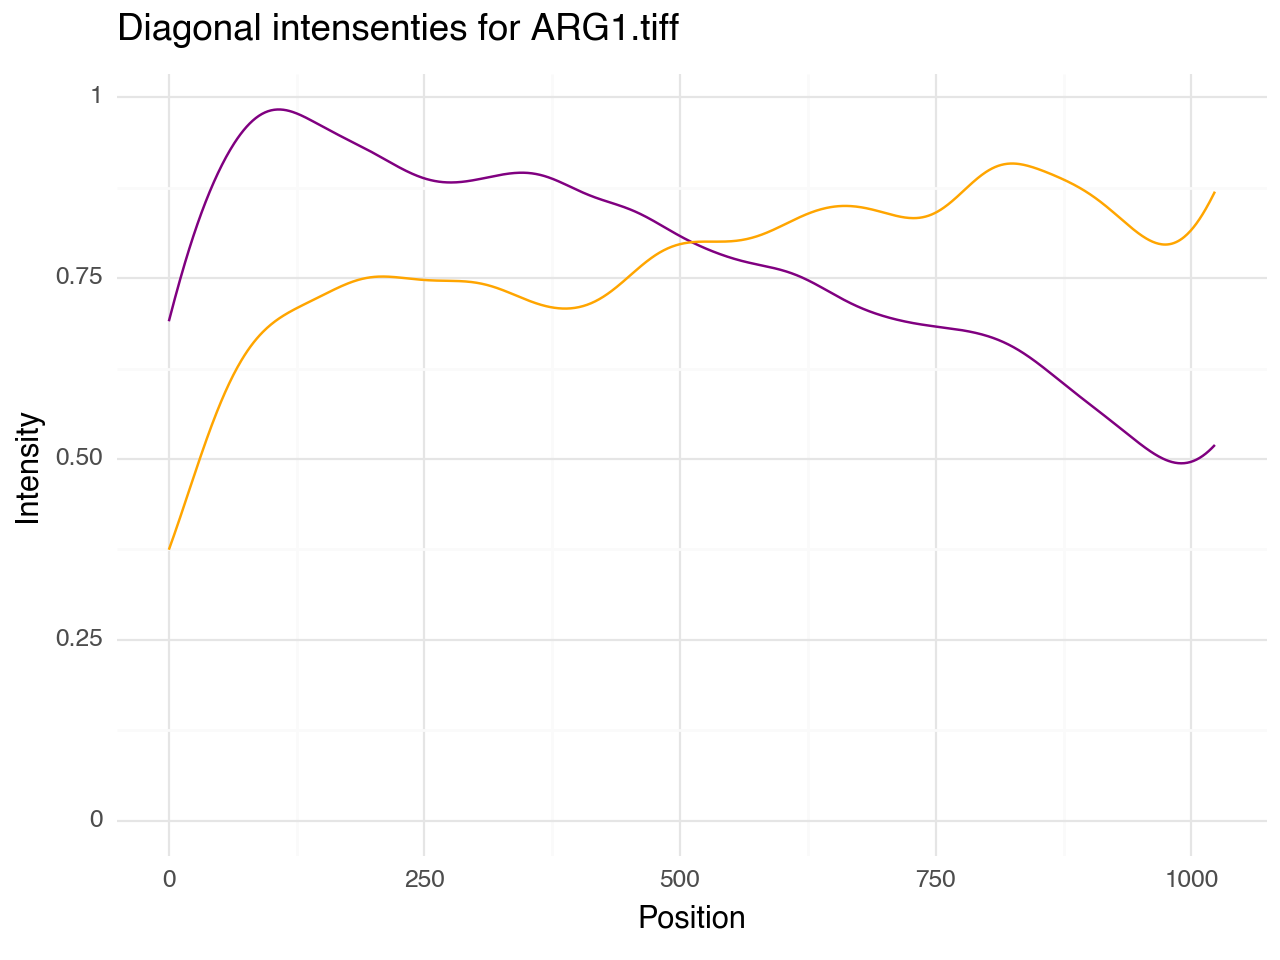


CD206.tiff


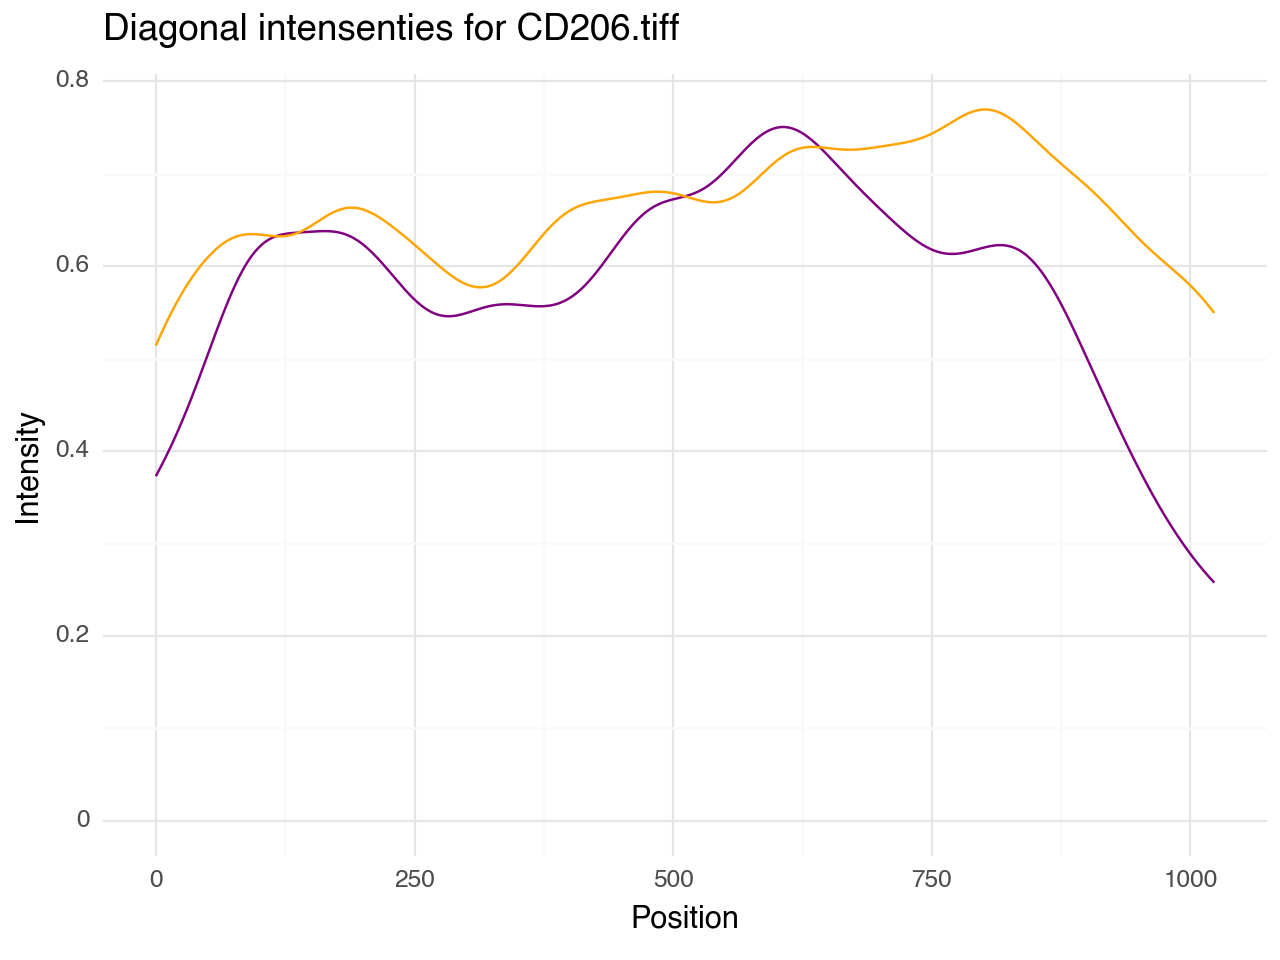


MMP9.tiff


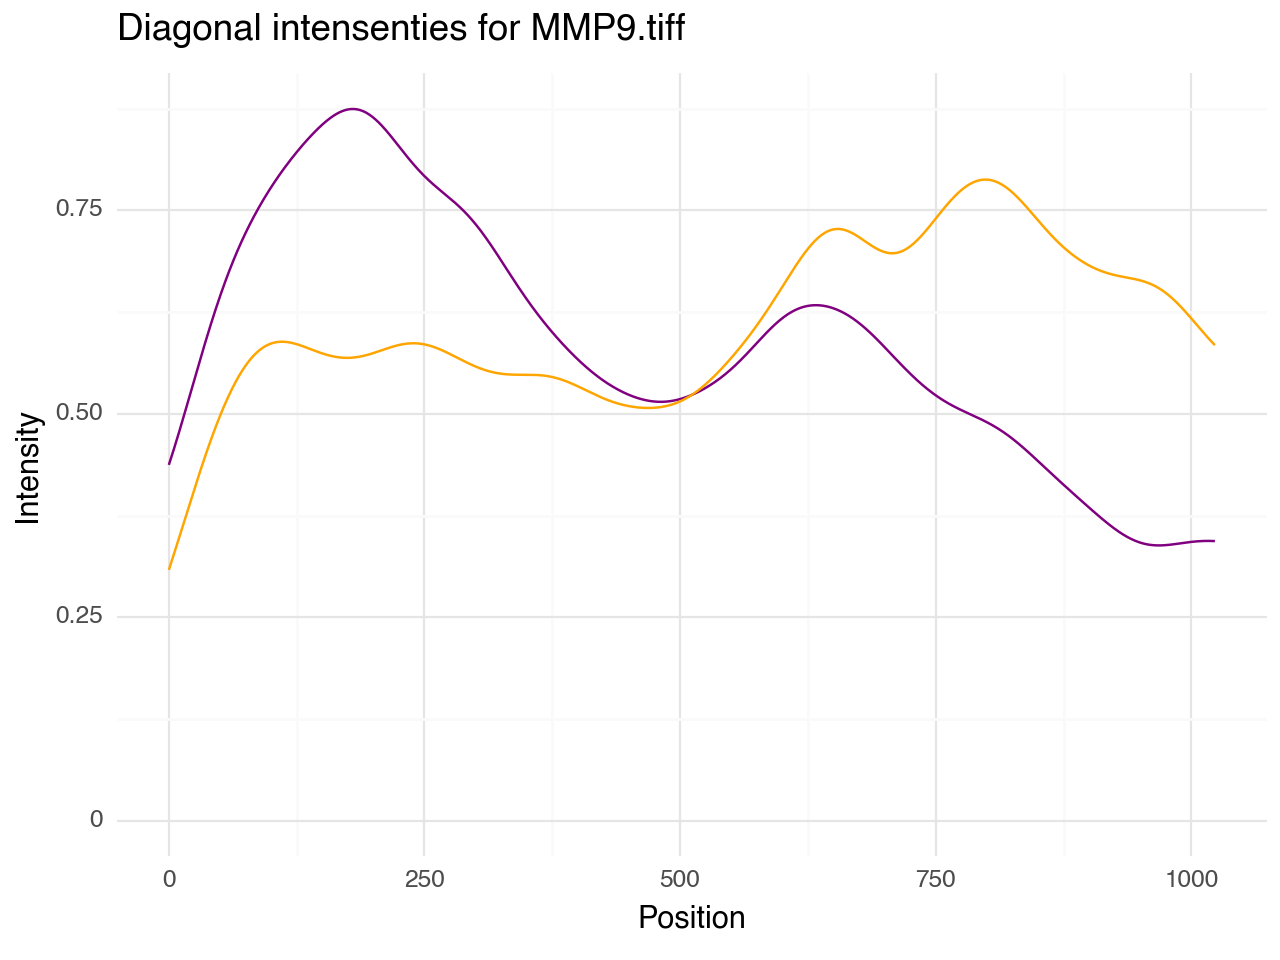


nuclei.tiff


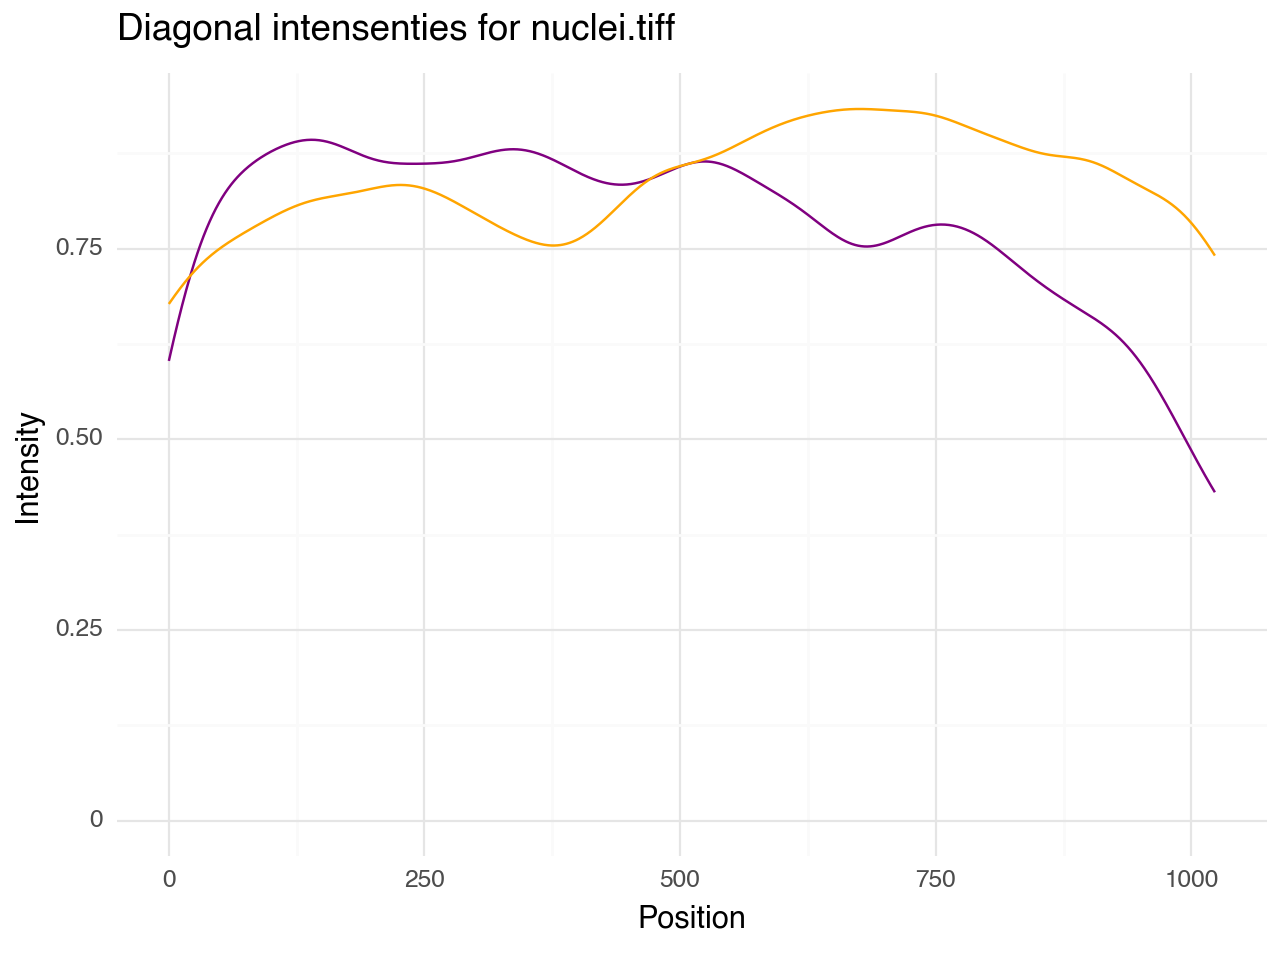


Noodle.tiff


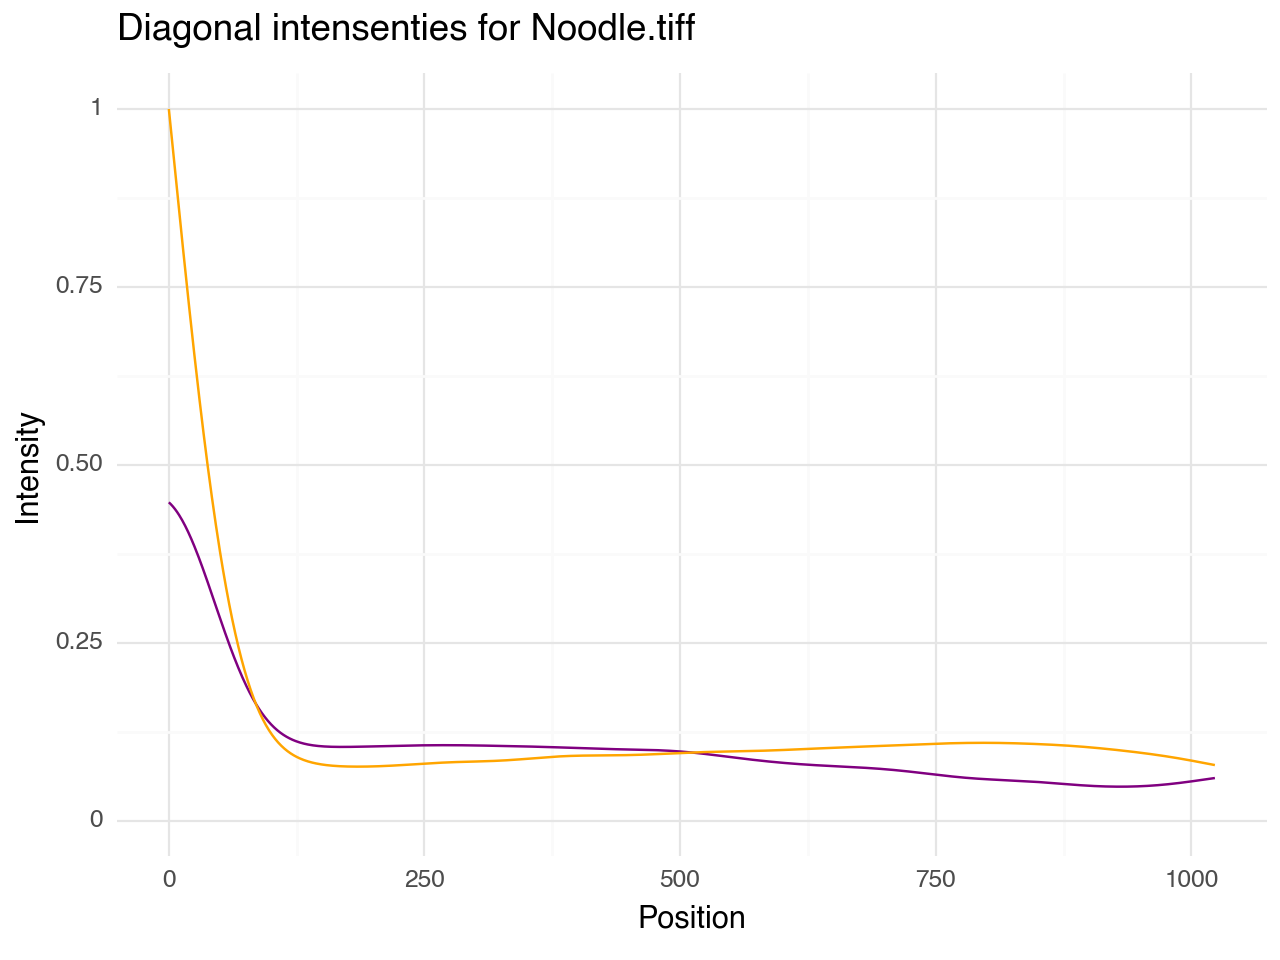


ASCT2.tiff


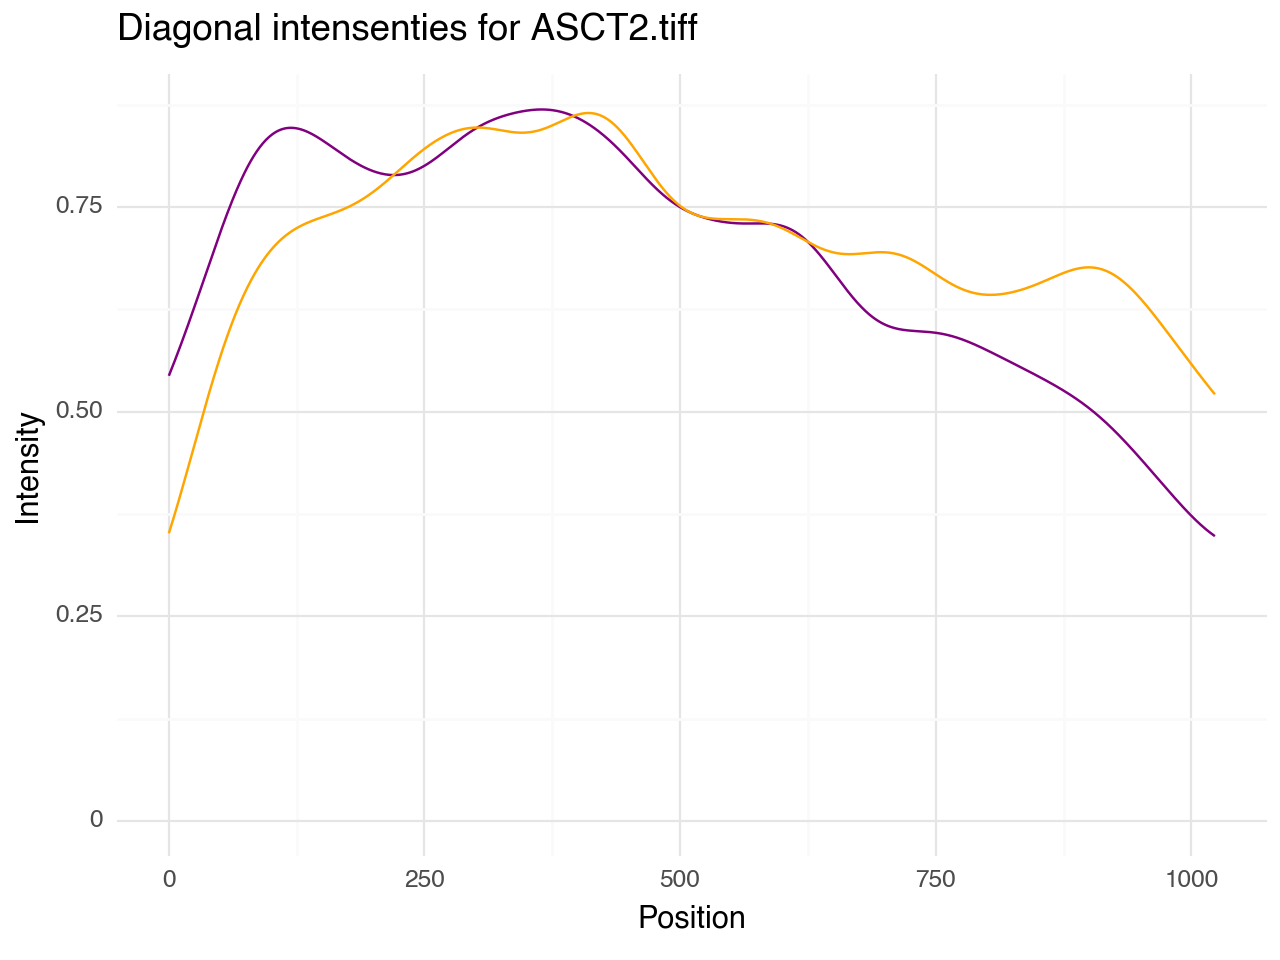


CD68.tiff


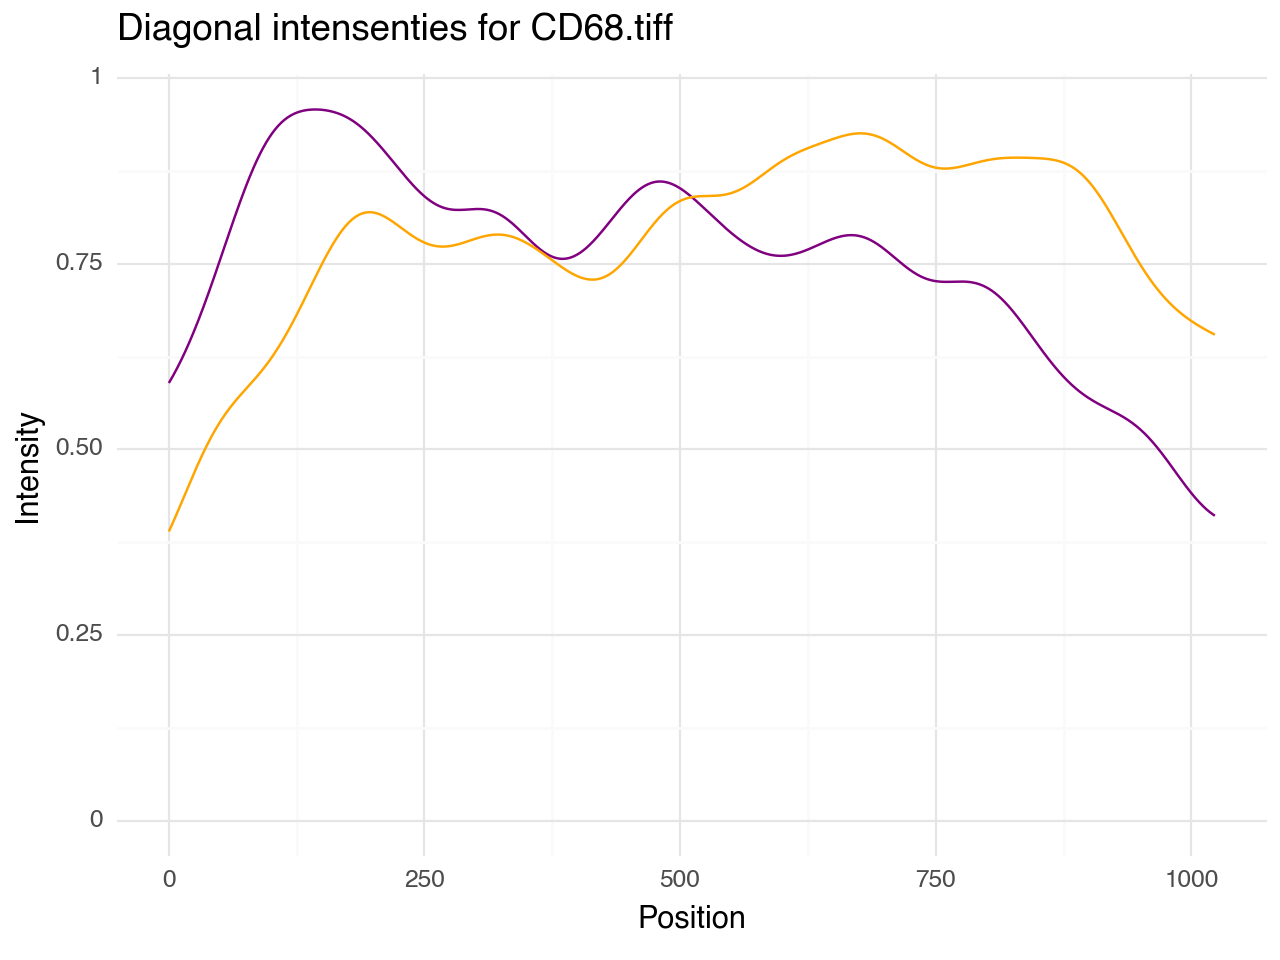


chan_152.tiff


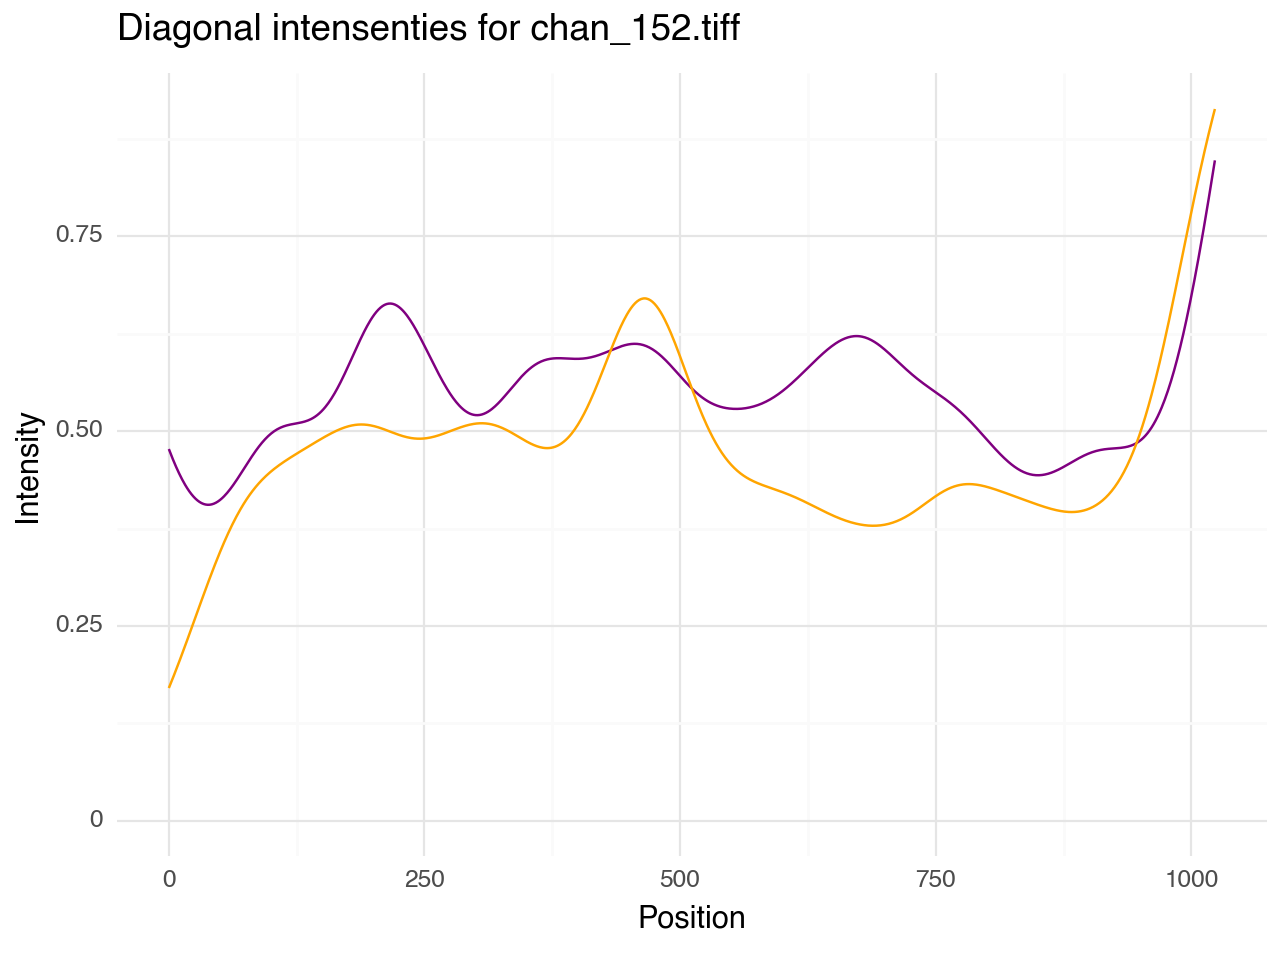


CitH3.tiff


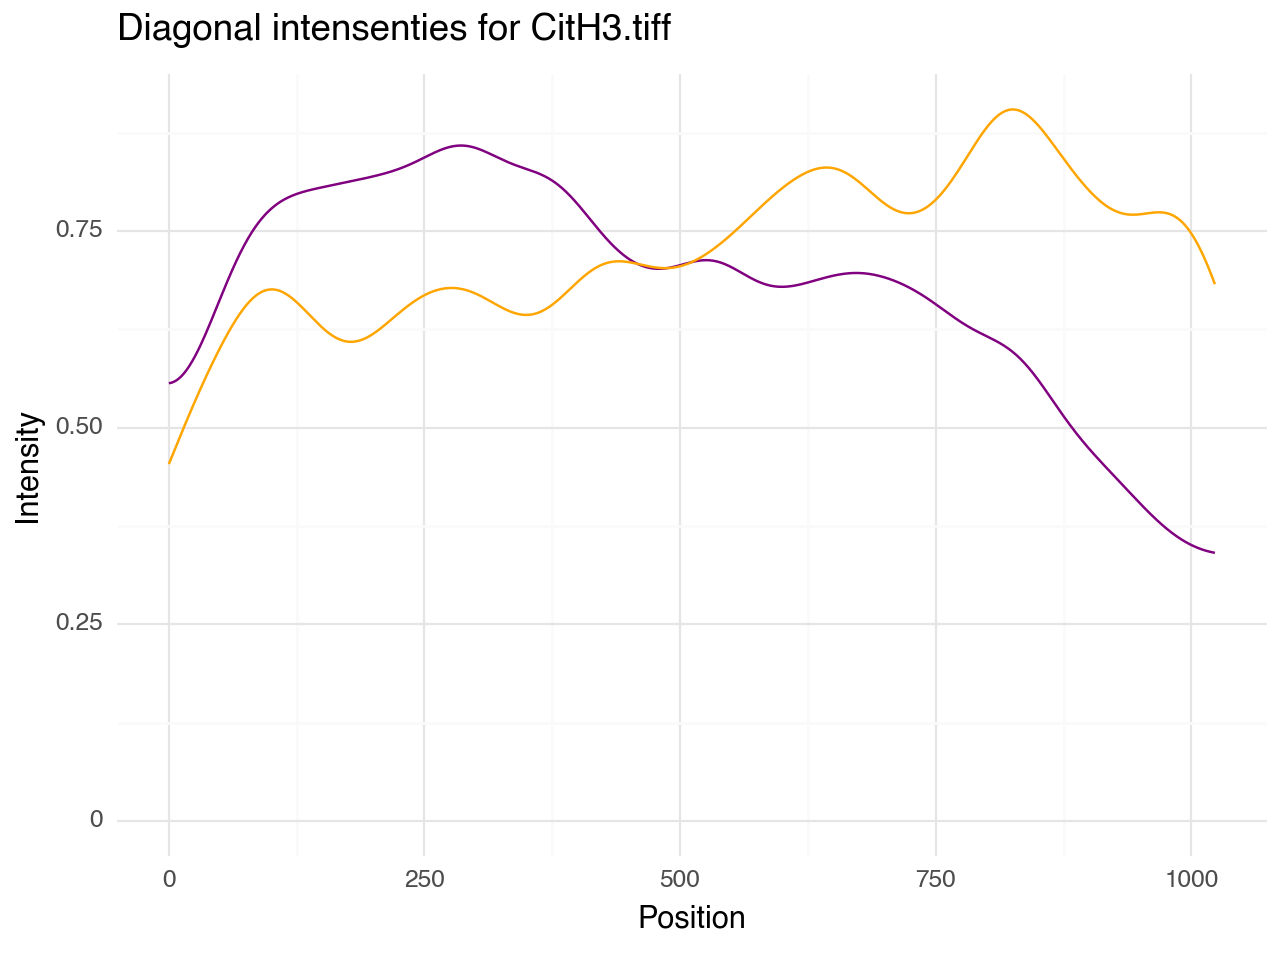


SMA.tiff


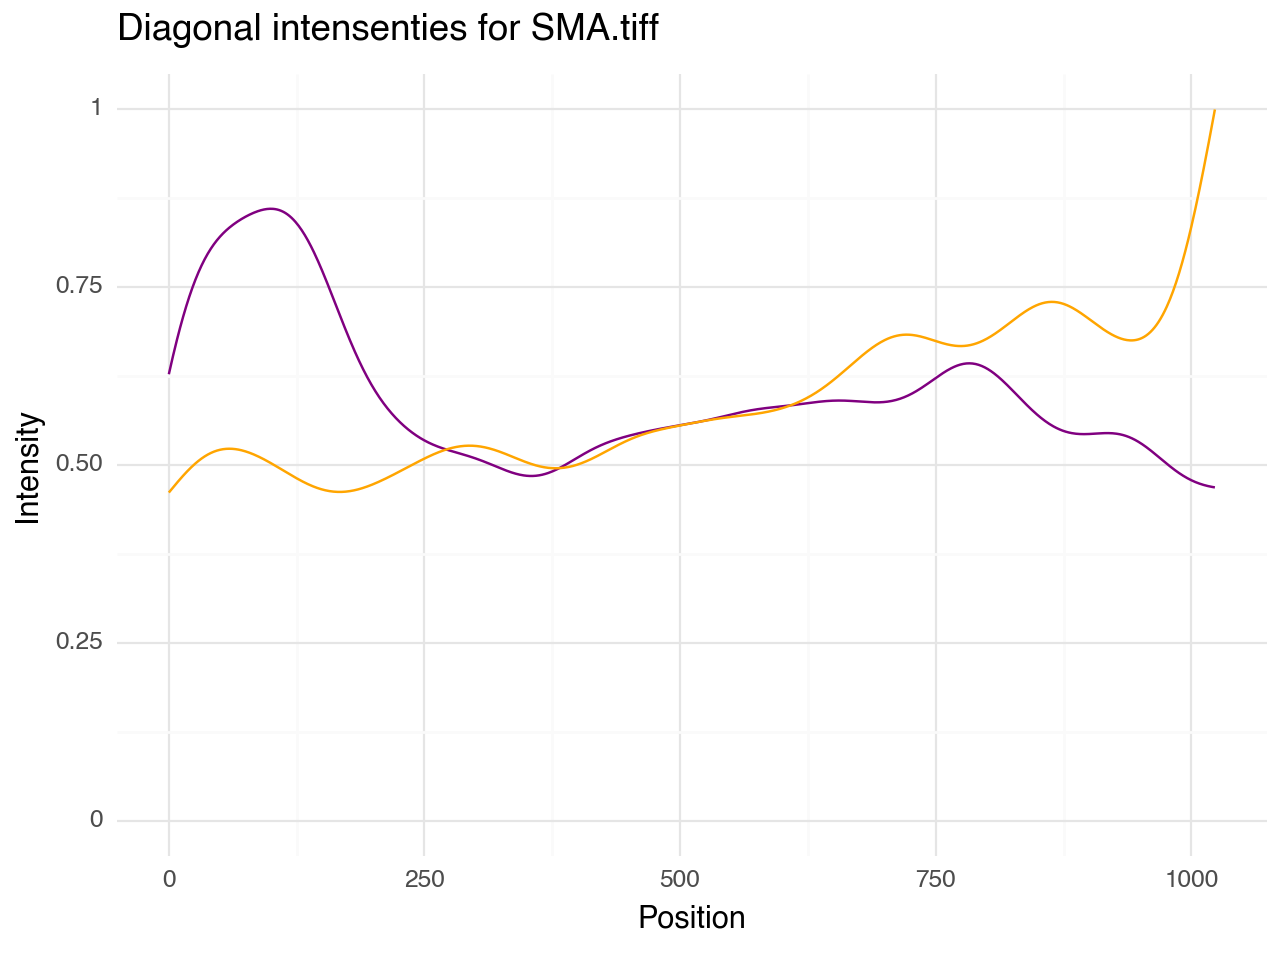


CD36.tiff


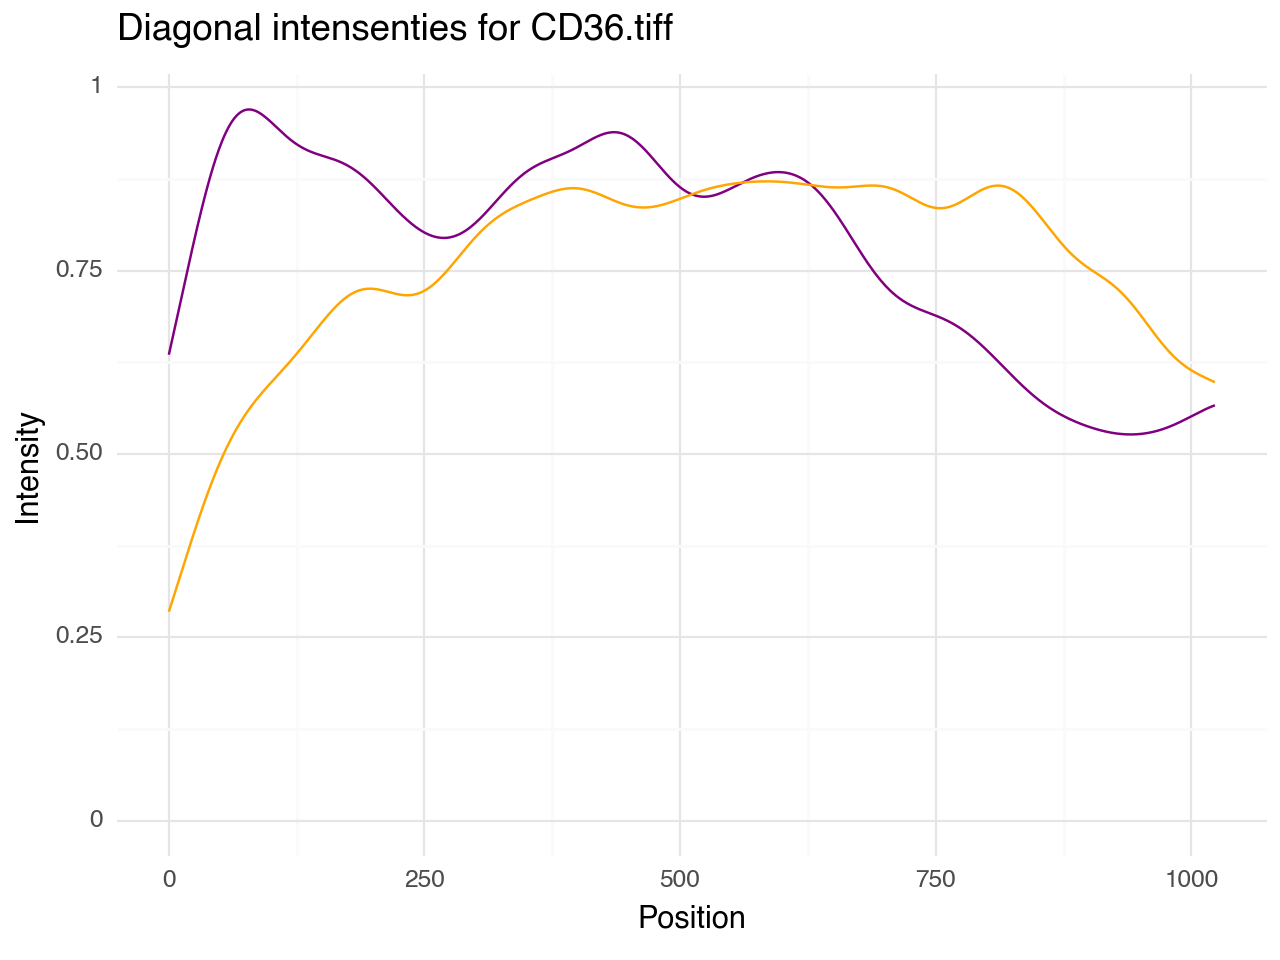


CD54.tiff


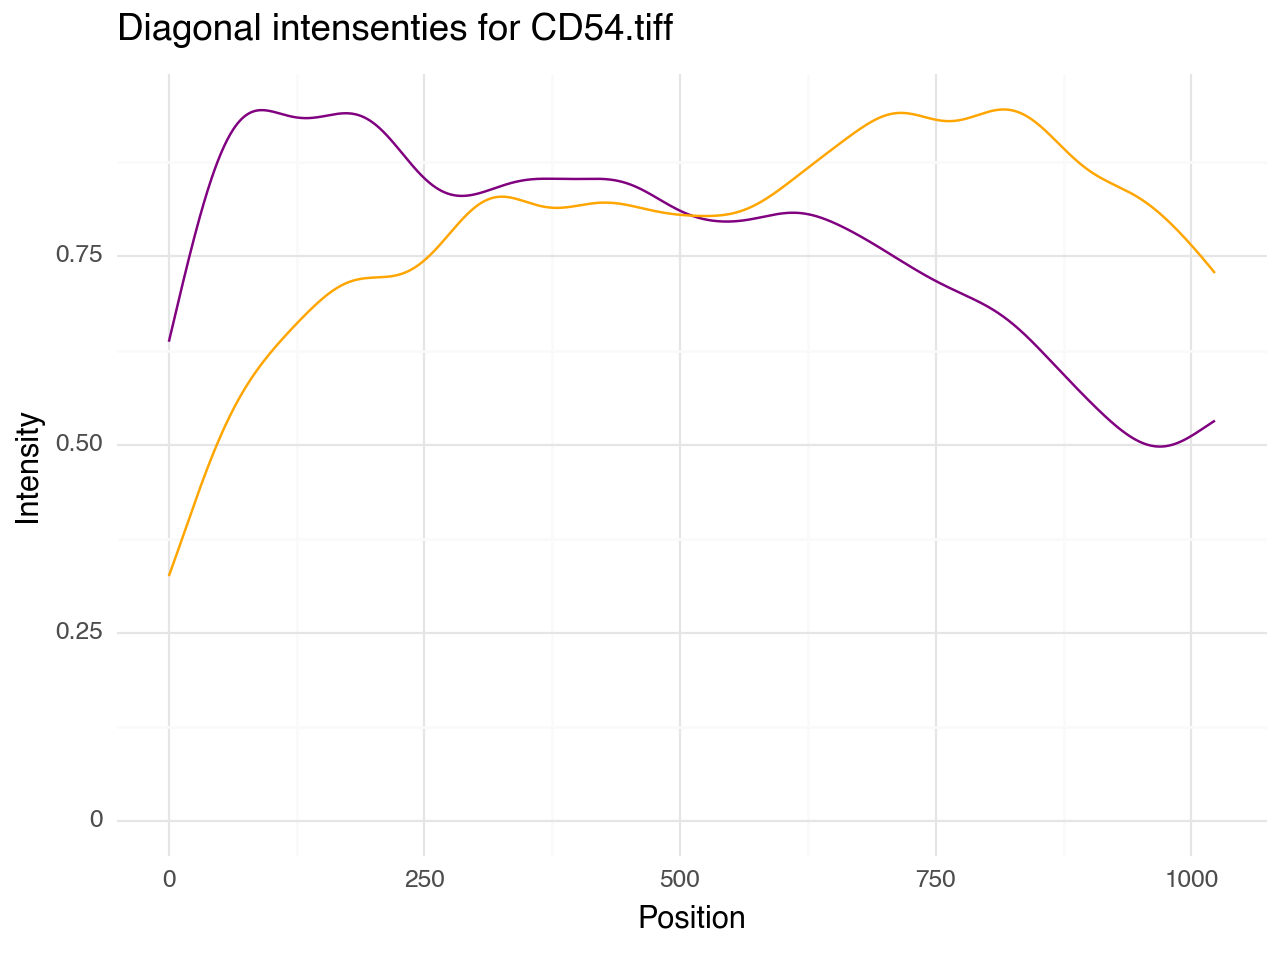


GLS.tiff


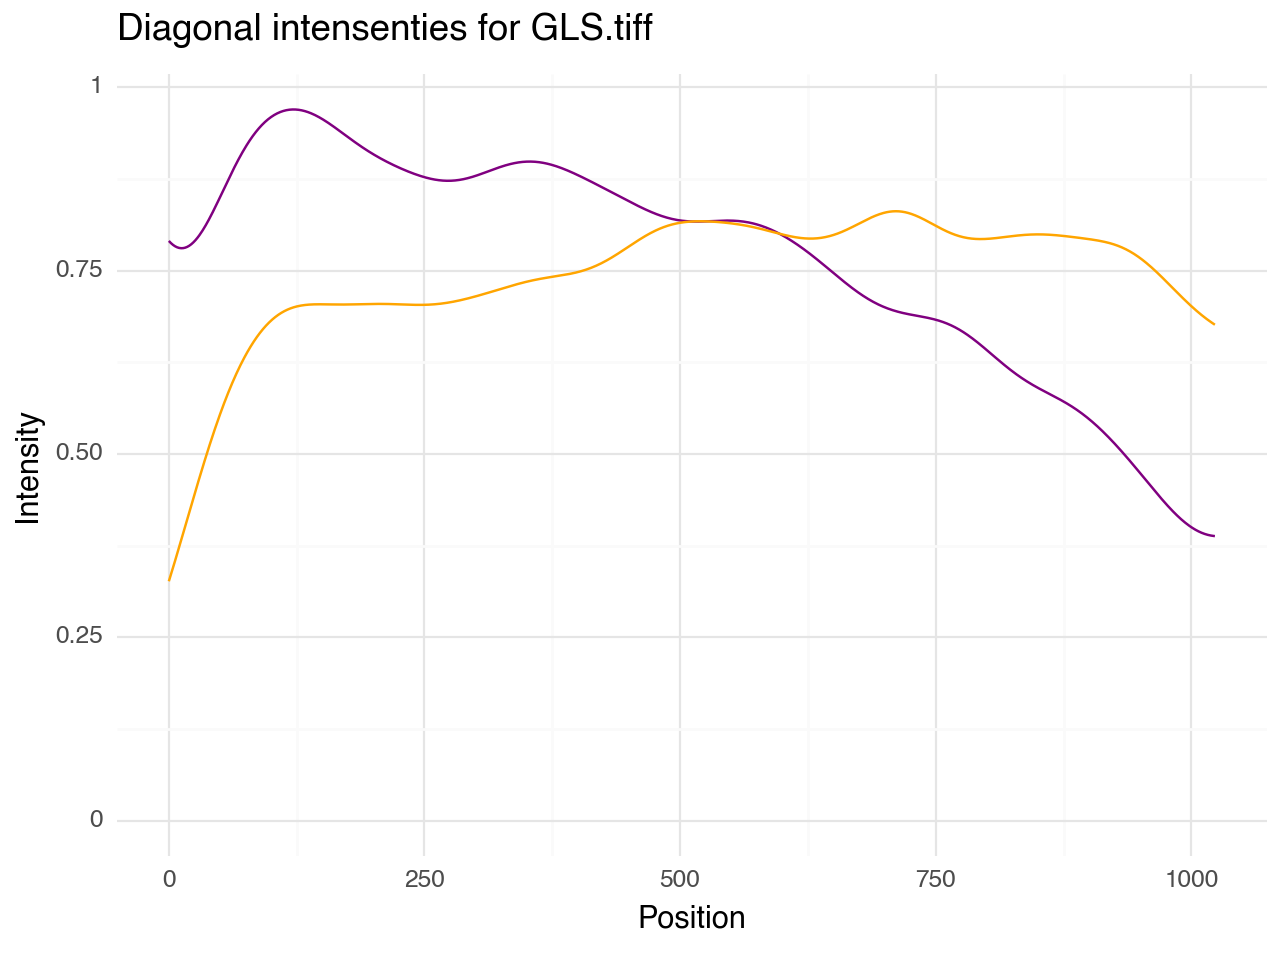


chan_140.tiff


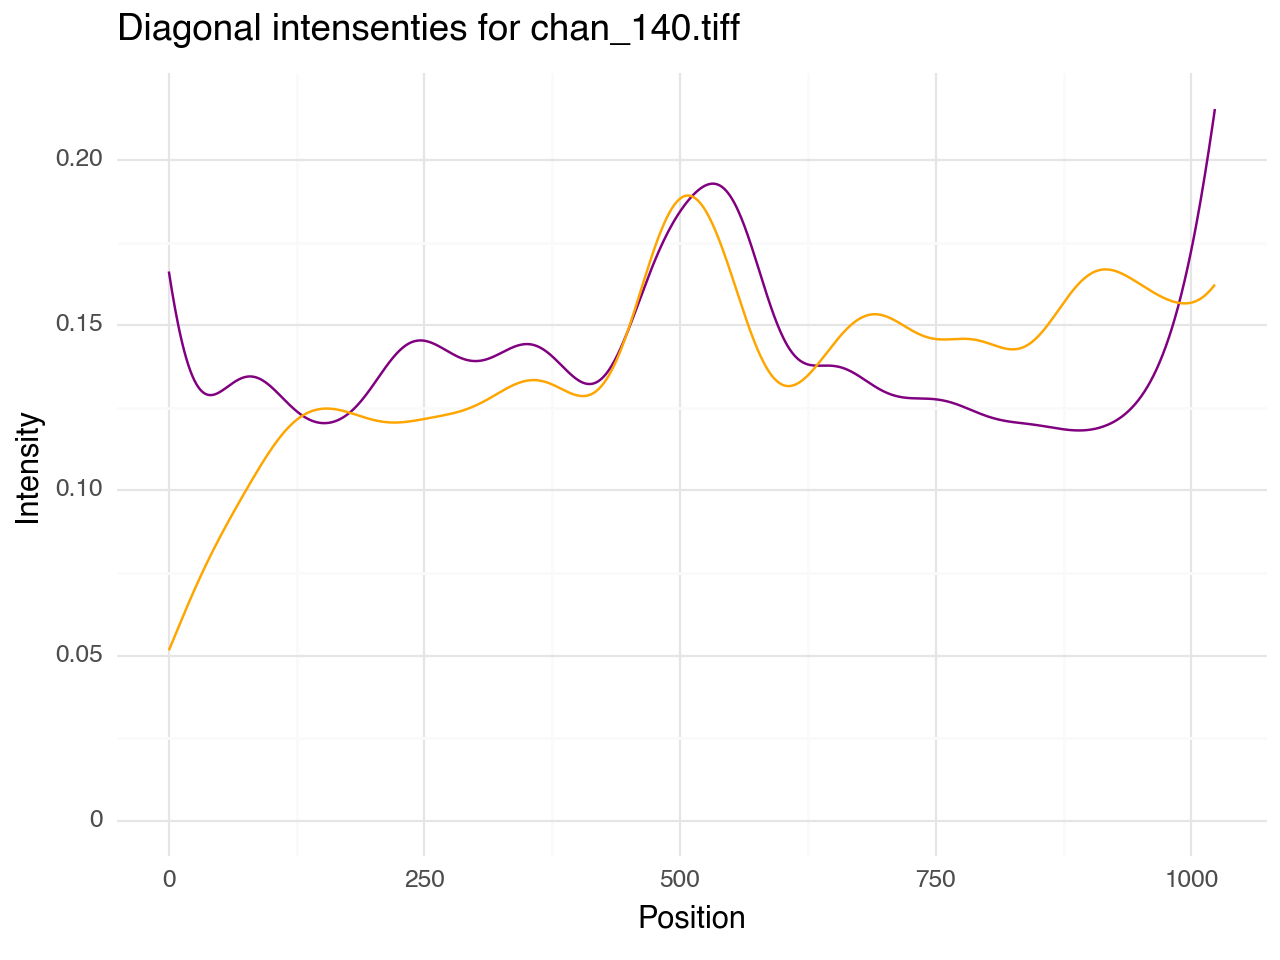


PKM2.tiff


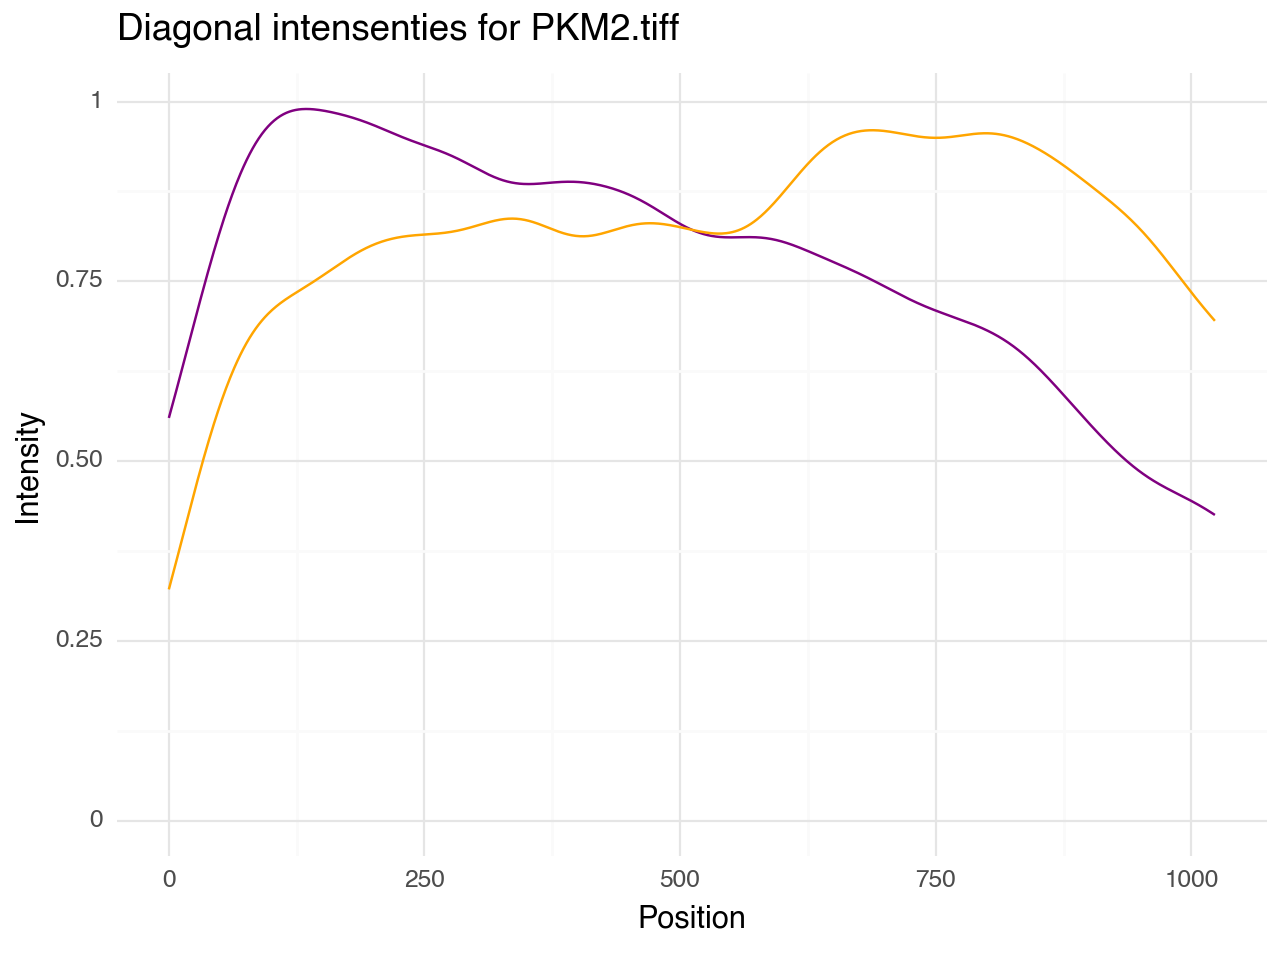


G6PD.tiff


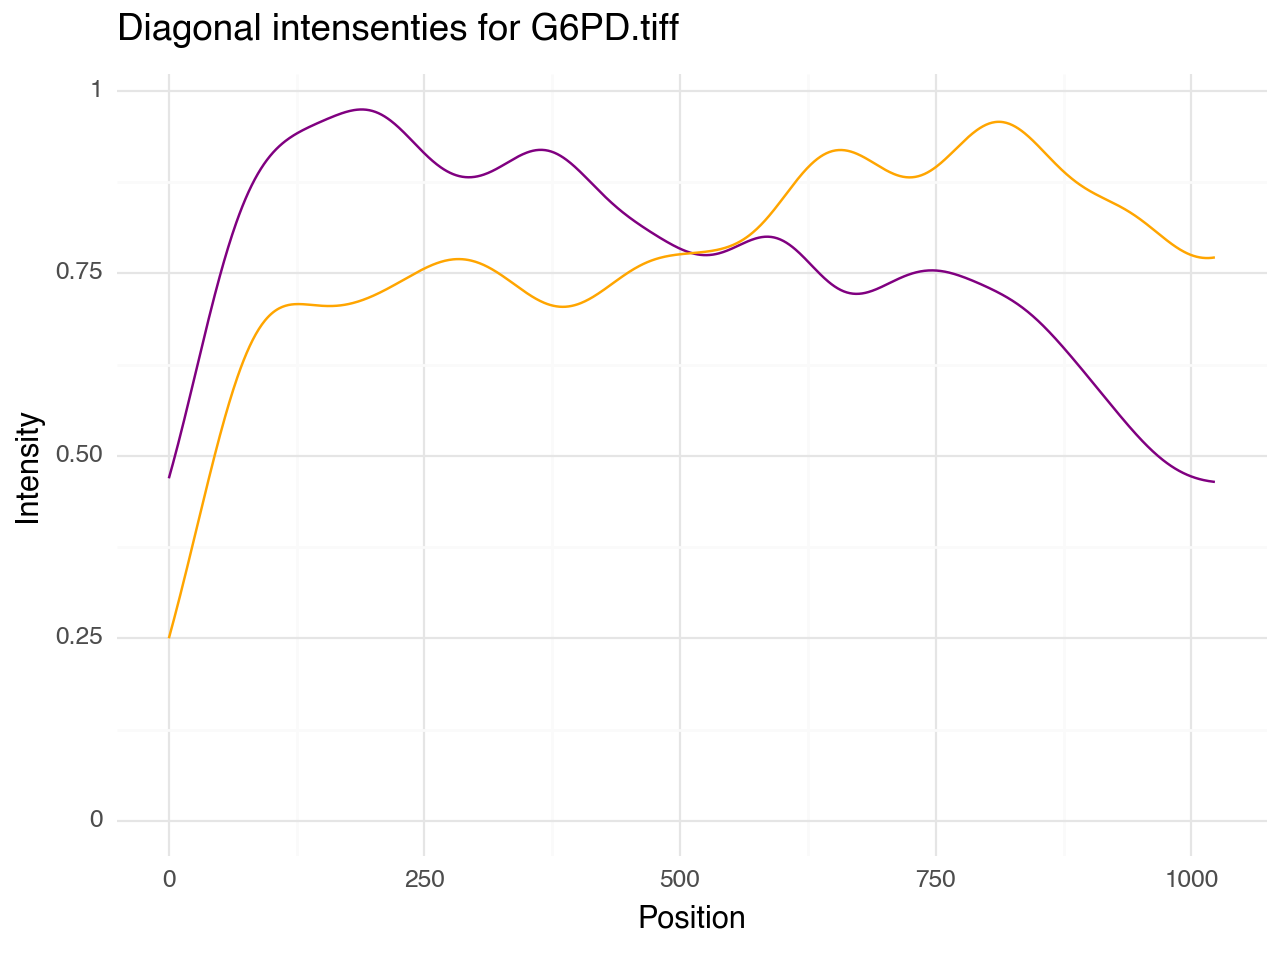


CD95.tiff


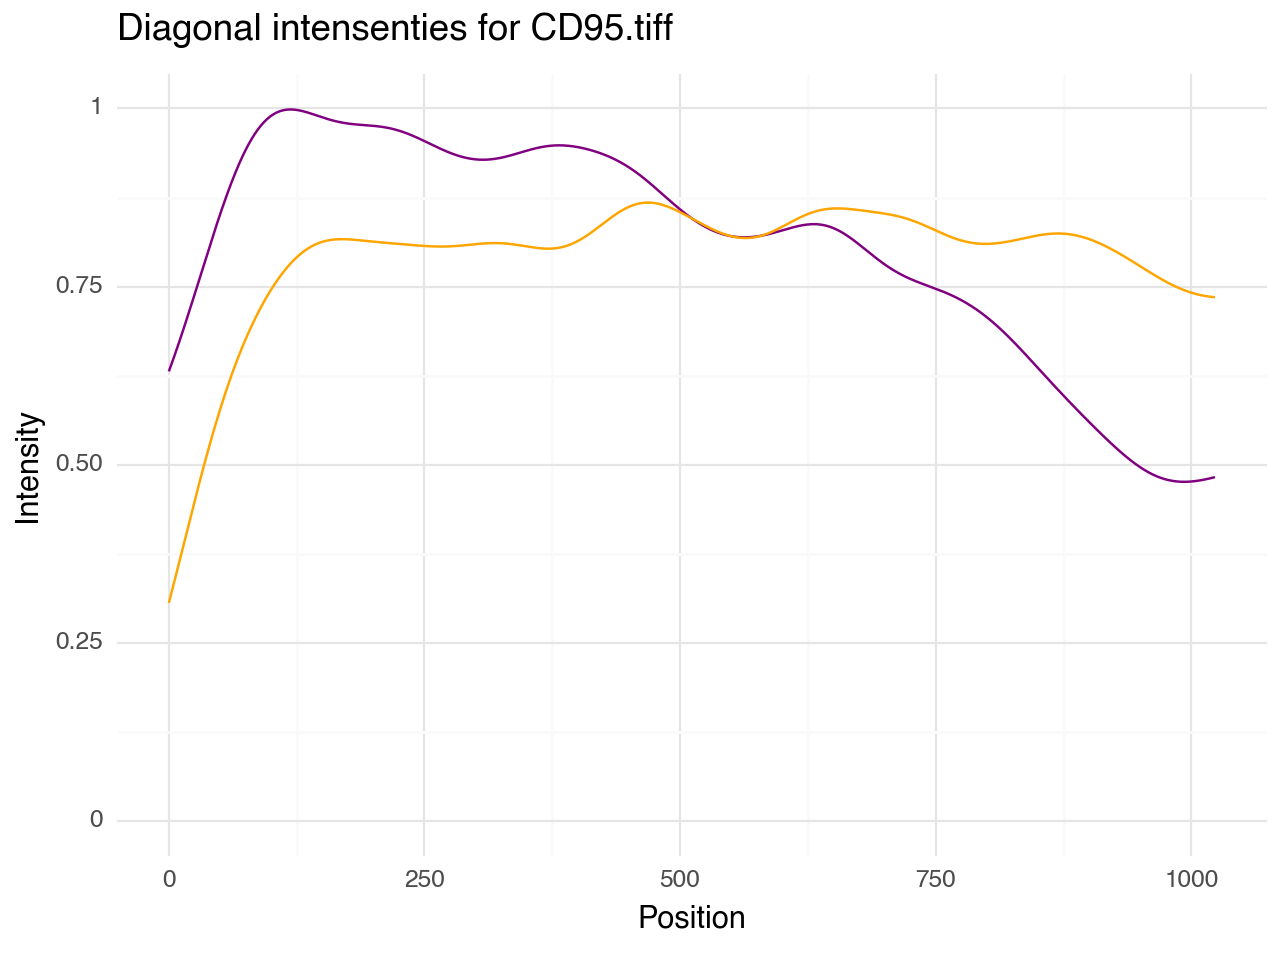


CS.tiff


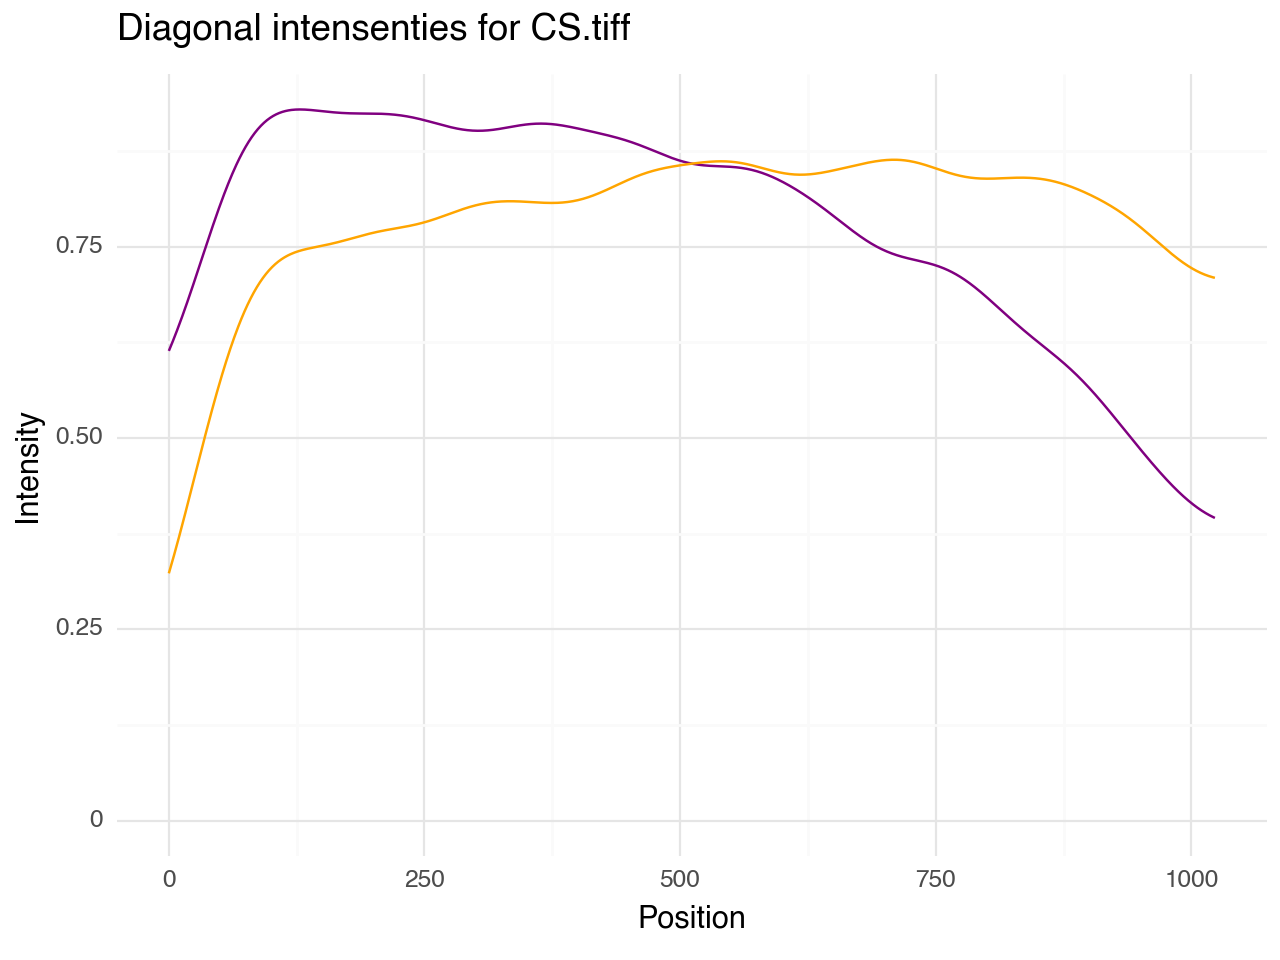


CytC.tiff


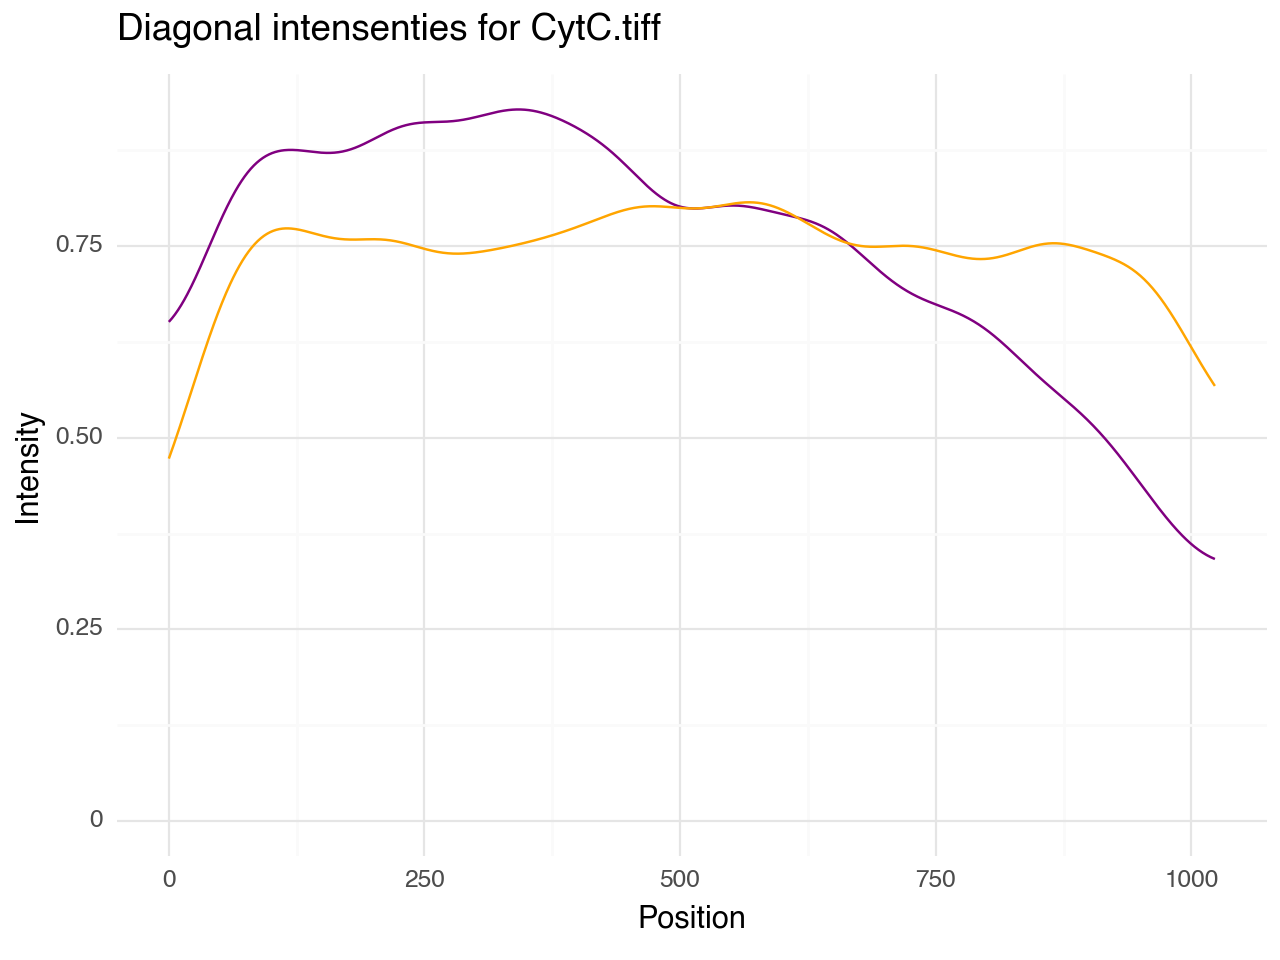


PanCK.tiff


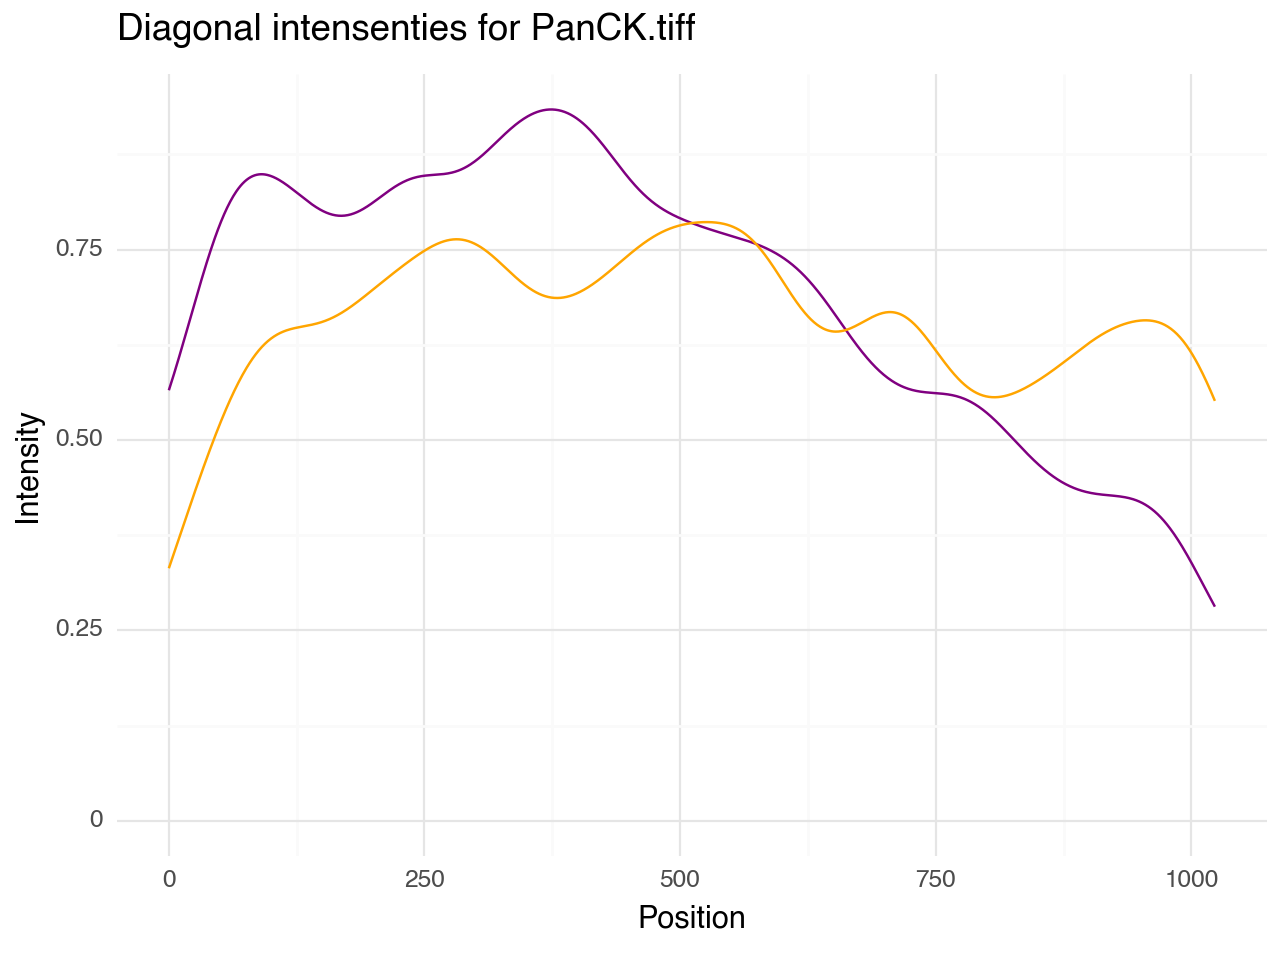


FoxP3.tiff


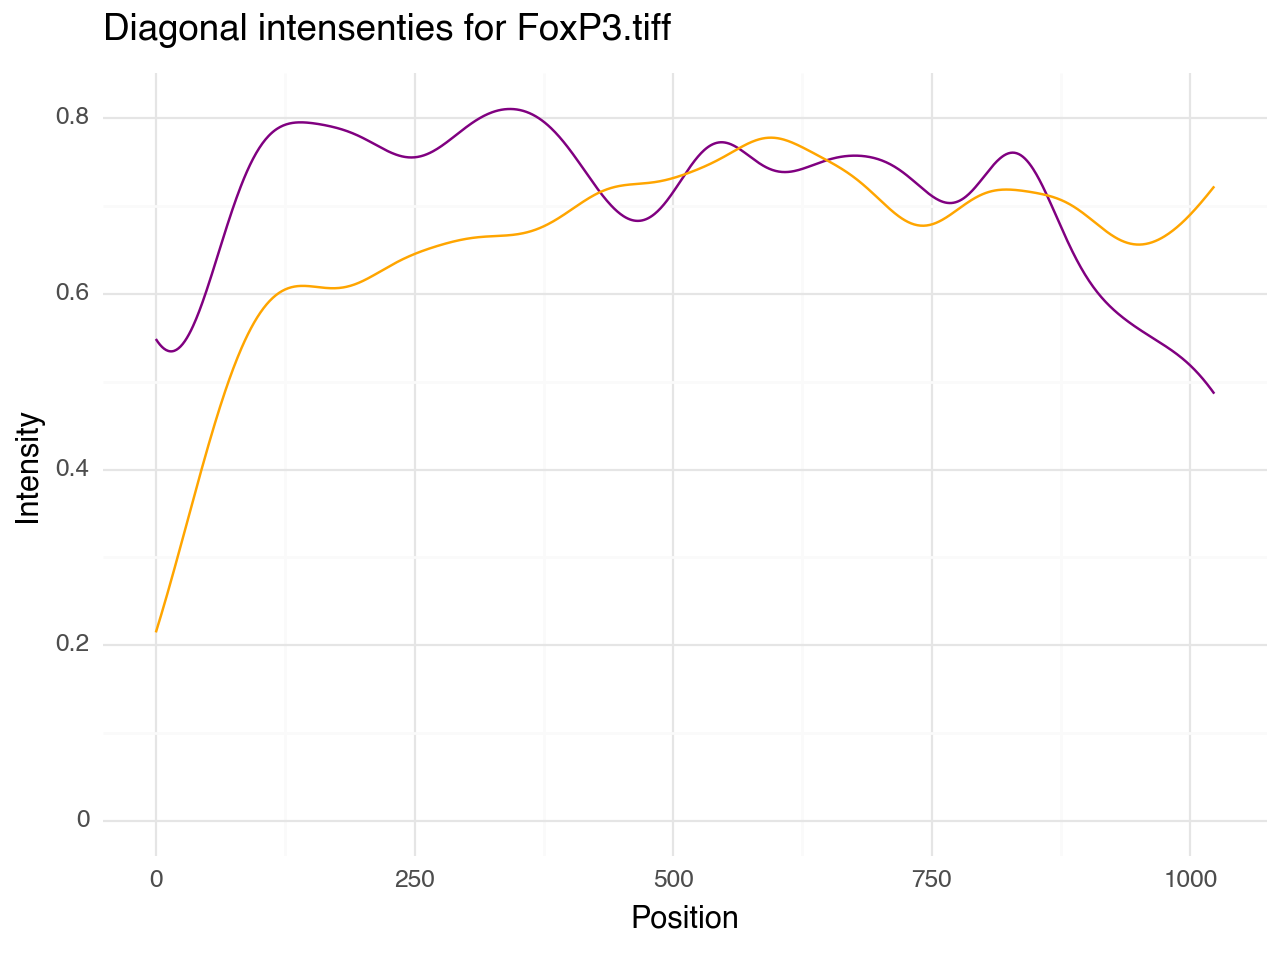


CD3.tiff


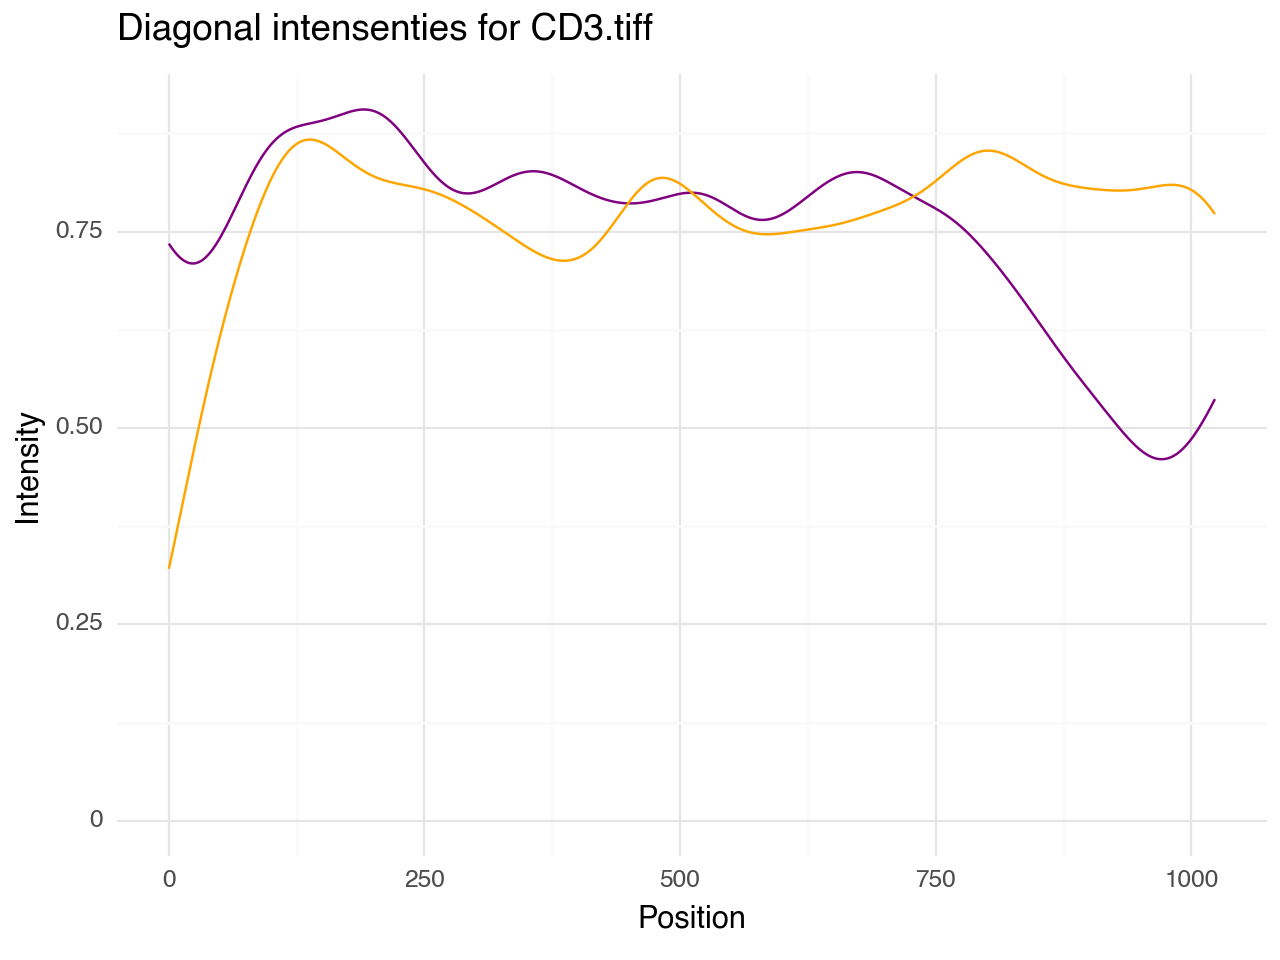

In [22]:
for img_path in chans:
    print(img_path, flush = True)
    all_imgs = [imread(f"{base_dir}/{fov}/{img_path}") 
                for fov in fovs]
    all_imgs = [img for img in all_imgs if img.shape == (1024,1024)]
    img = np.mean(np.stack(all_imgs), axis = 0)
    img /= np.max(img)
    img_blur = gaussian(img, sigma = sigma)
    img_blur /= np.max(img_blur)

    # Intensities along the diagonals
    isize = img_blur.shape[1]
    diag1 = pd.DataFrame([(i,img_blur[i,i]) for i in range(isize)], 
                         columns = ["Position", "Intensity"])
    diag2 = pd.DataFrame([(i,img_blur[i,isize-(i+1)]) for i in range(isize)], 
                         columns = ["Position", "Intensity"])

    if disp_blurred:
        img_blur = np.round(255 * img_blur).astype(np.uint8)
        display(Image.fromarray(img_blur))
        if save_results:
            imsave(f"{outdir}/{img_path}.png", img_blur)

    gp = ggplot(diag1, aes(x = "Position", y = "Intensity")) + geom_line(color = "purple") +\
        geom_line(data = diag2, color = "orange") + theme_minimal() +\
        ylim(0,max(np.max(diag1.Intensity), np.max(diag2.Intensity))) +\
        ggtitle(f"Diagonal intensenties for {img_path}")
    print(gp)
    if save_results:
        ggsave(gp, f"{outdir}/diagonal_intensities_{img_path}.png")

In [42]:
chan="PanCK.tiff"
edgelength= 200
gradthreshold=0.25

In [43]:
gradimgs = set()
for fov in fovs:
    img = imread(f"{base_dir}/{fov}/{chan}")
    img /= np.max(img)
    img_blur = gaussian(img, sigma = sigma)
    img_blur /= np.max(img_blur)

    isize = img_blur.shape[1]
    
    # For end of the first diagonal
    if np.mean([img_blur[i,i] for i in range(isize-edgelength,isize)]) < gradthreshold:
        gradimgs.add(fov)

print(f"Images with strong gradient for channel {chan}: {gradimgs}")

Images with strong gradient for channel PanCK.tiff: {'B8b/rescaled', 'C7a/rescaled', 'C8h/rescaled', 'A6g/rescaled', 'C6k/rescaled', 'B9r/rescaled', 'C4a/rescaled', 'C7d/rescaled', 'B8q/rescaled', 'B4f/rescaled', 'B3o/rescaled', 'B6n/rescaled', 'A3a/rescaled', 'C2l/rescaled', 'B9f/rescaled', 'C8d/rescaled', 'D4b/rescaled', 'A4g/rescaled', 'A3c/rescaled', 'B9l/rescaled', 'A1l/rescaled', 'D6k/rescaled', 'D5k/rescaled', 'C8e/rescaled', 'C7m/rescaled', 'A2c/rescaled', 'D2c/rescaled', 'B3b/rescaled', 'B5h/rescaled', 'C9d/rescaled', 'B2c/rescaled', 'A3h/rescaled', 'C8i/rescaled', 'A8h/rescaled', 'C3g/rescaled', 'A2m/rescaled', 'C4k/rescaled', 'A1h/rescaled', 'C1a/rescaled', 'A6c/rescaled', 'C2b/rescaled', 'A2p/rescaled', 'D9g/rescaled', 'B4i/rescaled', 'C3h/rescaled', 'A7p/rescaled', 'A4i/rescaled', 'A1i/rescaled', 'B2d/rescaled', 'A1g/rescaled', 'D8l/rescaled', 'D8h/rescaled', 'B4a/rescaled', 'A9b/rescaled', 'A3i/rescaled', 'C6g/rescaled', 'A8l/rescaled', 'B7p/rescaled', 'B5e/rescaled', 'E4